https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications

#### <font color='blue'> <h1 align="center"> 1-Imports </font>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### <font color='blue'> <h1 align="center"> 2-Business Understanding </font>




Data Preparation mini project .


Myocardial Infarction (MI), commonly known as a heart attack, is a medical condition that occurs when blood flow to a part of the heart is blocked for a long enough time that part of the heart muscle is damaged or dies.

MI presents a significant challenge in contemporary healthcare, characterized by its high first-year mortality rate. Globally, the prevalence of MI remains substantial, with its impact particularly pronounced among the urban populations of advanced nations due to stress, and dietary inconsistencies.

The progression of MI varies among patients, manifesting either as uncomplicated or with complications that do not alter long-term outcomes.

Predicting these complications poses a challenge, even for seasoned professionals, making the proactive identification and prevention of such complications a crucial aspect of MI management.

In this project, I have trained various ensemble classifiers on the data to predict Chronic Heart Failure based on multiple clinical parameters. The project consists of an end-to-end pipeline structure, starting from exploratory data analysis, data ingestion, data transformation, model training, and finally deployment.


(from the Dataset's website):

Problems to solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at

1.	the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2.	the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3.	the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4.	the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

#### <font color='blue'> <h1 align="center"> 3-Create DataFrame </font>




In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
myocardial_infarction_complications = fetch_ucirepo(id=579)

# data (as pandas dataframes)
X = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

# metadata
print(myocardial_infarction_complications.metadata)

# variable information
print(myocardial_infarction_complications.variables)


ModuleNotFoundError: No module named 'ucimlrepo'

#### <font color='blue'> <h1 align="center"> 4-Data Understanding </font>




In [ ]:
X.shape

NameError: name 'X' is not defined

In [ ]:
y.shape

(1700, 12)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FIBR_PREDS  1700 non-null   int64
 1   PREDS_TAH   1700 non-null   int64
 2   JELUD_TAH   1700 non-null   int64
 3   FIBR_JELUD  1700 non-null   int64
 4   A_V_BLOK    1700 non-null   int64
 5   OTEK_LANC   1700 non-null   int64
 6   RAZRIV      1700 non-null   int64
 7   DRESSLER    1700 non-null   int64
 8   ZSN         1700 non-null   int64
 9   REC_IM      1700 non-null   int64
 10  P_IM_STEN   1700 non-null   int64
 11  LET_IS      1700 non-null   int64
dtypes: int64(12)
memory usage: 159.5 KB


In [ ]:
X.size

188700

In [ ]:
X.head()

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
0         0.0      7.0  ...         0.0         0.0         0.0      1.0   
1         0.0      0.0  ...         1.0         0.0         0.0      1.0   
2         0.0      2.0  ...         3.0         2.0         2.0      1.0   
3         0.0      3.0  ...         0.0         0.0         0.0      0.0   
4         0.0      7.0  ...         0.0         0.0         0.0      0.0   

   B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
0         0.0         0.0        1.0      1.0       0.0        0.0  
1         0.0         1.0        1.0      1.0       0.0        1.0  
2         1.0         0.0        1.0      1.0       0.0        0.0  
3         0.0         1.0        1.0      1.0       0.0        0.0  
4         0.0         1.0        0.0      1.0       0.0        1.0  

[5 rows x 111 columns]

In [ ]:
X.tail()

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
1695  77.0    0       0.0        4.0        2.0       1.0       NaN  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       NaN  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       NaN  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       NaN  2.0   
1699  63.0    1       2.0        NaN        NaN       NaN       NaN  2.0   

      SIM_GIPERT  DLIT_AG  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
1695         0.0      7.0  ...         0.0         NaN         NaN      0.0   
1696         0.0      7.0  ...         0.0         NaN         NaN      1.0   
1697         0.0      0.0  ...         0.0         0.0         0.0      0.0   
1698         0.0      7.0  ...         1.0         NaN         NaN      1.0   
1699         0.0      NaN  ...         0.0         NaN         NaN      0.0   

      B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
1695         0.0         0.0        0.0      0.0       0.0        0.0  
1696         0.0         0.0        0.0      0.0       0.0        0.0  
1697         1.0         0.0        1.0      1.0       0.0        0.0  
1698         0.0         1.0        1.0      1.0       0.0        0.0  
1699         0.0         0.0        0.0      0.0       0.0        0.0  

[5 rows x 111 columns]

In [ ]:
X.describe()

AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1.160703   0.37500     1.393258     0.033688     3.340220  ...   
std       0.801400   0.48752     1.088803     0.180478     3.098646  ...   
min       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
25%       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
50%       1.000000   0.00000     2.000000     0.000000     3.000000  ...   
75%       2.000000   1.00000     2.000000     0.000000     7.000000  ...   
max       2.000000   1.00000     3.000000     1.000000     7.000000  ...   

        NOT_NA_1_n   NOT_NA_2_n   NOT_NA_3_n      LID_S_n   B_BLOK_S_n  \
count  1690.000000  1590.000000  1569.000000  1690.000000  1689.000000   
mean      0.331953     0.113208     0.084767     0.283432     0.127294   
std       0.628311     0.399514     0.355107     0.450798     0.333401   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     1.000000     0.000000   
max       4.000000     3.000000     2.000000     1.000000     1.000000   

        ANT_CA_S_n    GEPAR_S_n      ASP_S_n     TIKL_S_n    TRENT_S_n  
count  1687.000000  1683.000000  1683.000000  1684.000000  1684.000000  
mean      0.666864     0.714795     0.743910     0.017815     0.202494  
std       0.471474     0.451646     0.436602     0.132317     0.401978  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     0.000000     0.000000  
75%       1.000000     1.000000     1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 111 columns]

#### <font color='blue'> <h1 align="center"> 5--Data Exploration </font>




In [ ]:
y.describe()

FIBR_PREDS    PREDS_TAH    JELUD_TAH   FIBR_JELUD     A_V_BLOK  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.100000     0.011765     0.024706     0.041765     0.033529   
std       0.300088     0.107857     0.155273     0.200110     0.180067   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         OTEK_LANC       RAZRIV     DRESSLER          ZSN       REC_IM  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.093529     0.031765     0.044118     0.231765     0.093529   
std       0.291259     0.175425     0.205417     0.422084     0.291259   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  
mean      0.087059     0.477059  
std       0.282004     1.381818  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     7.000000

#### <font color='blue'> <h1 align="center"> 6-Data Preparation </font>




#### <font color='red'> <h3 align="center"> 6-1- Data Cleaning </font>




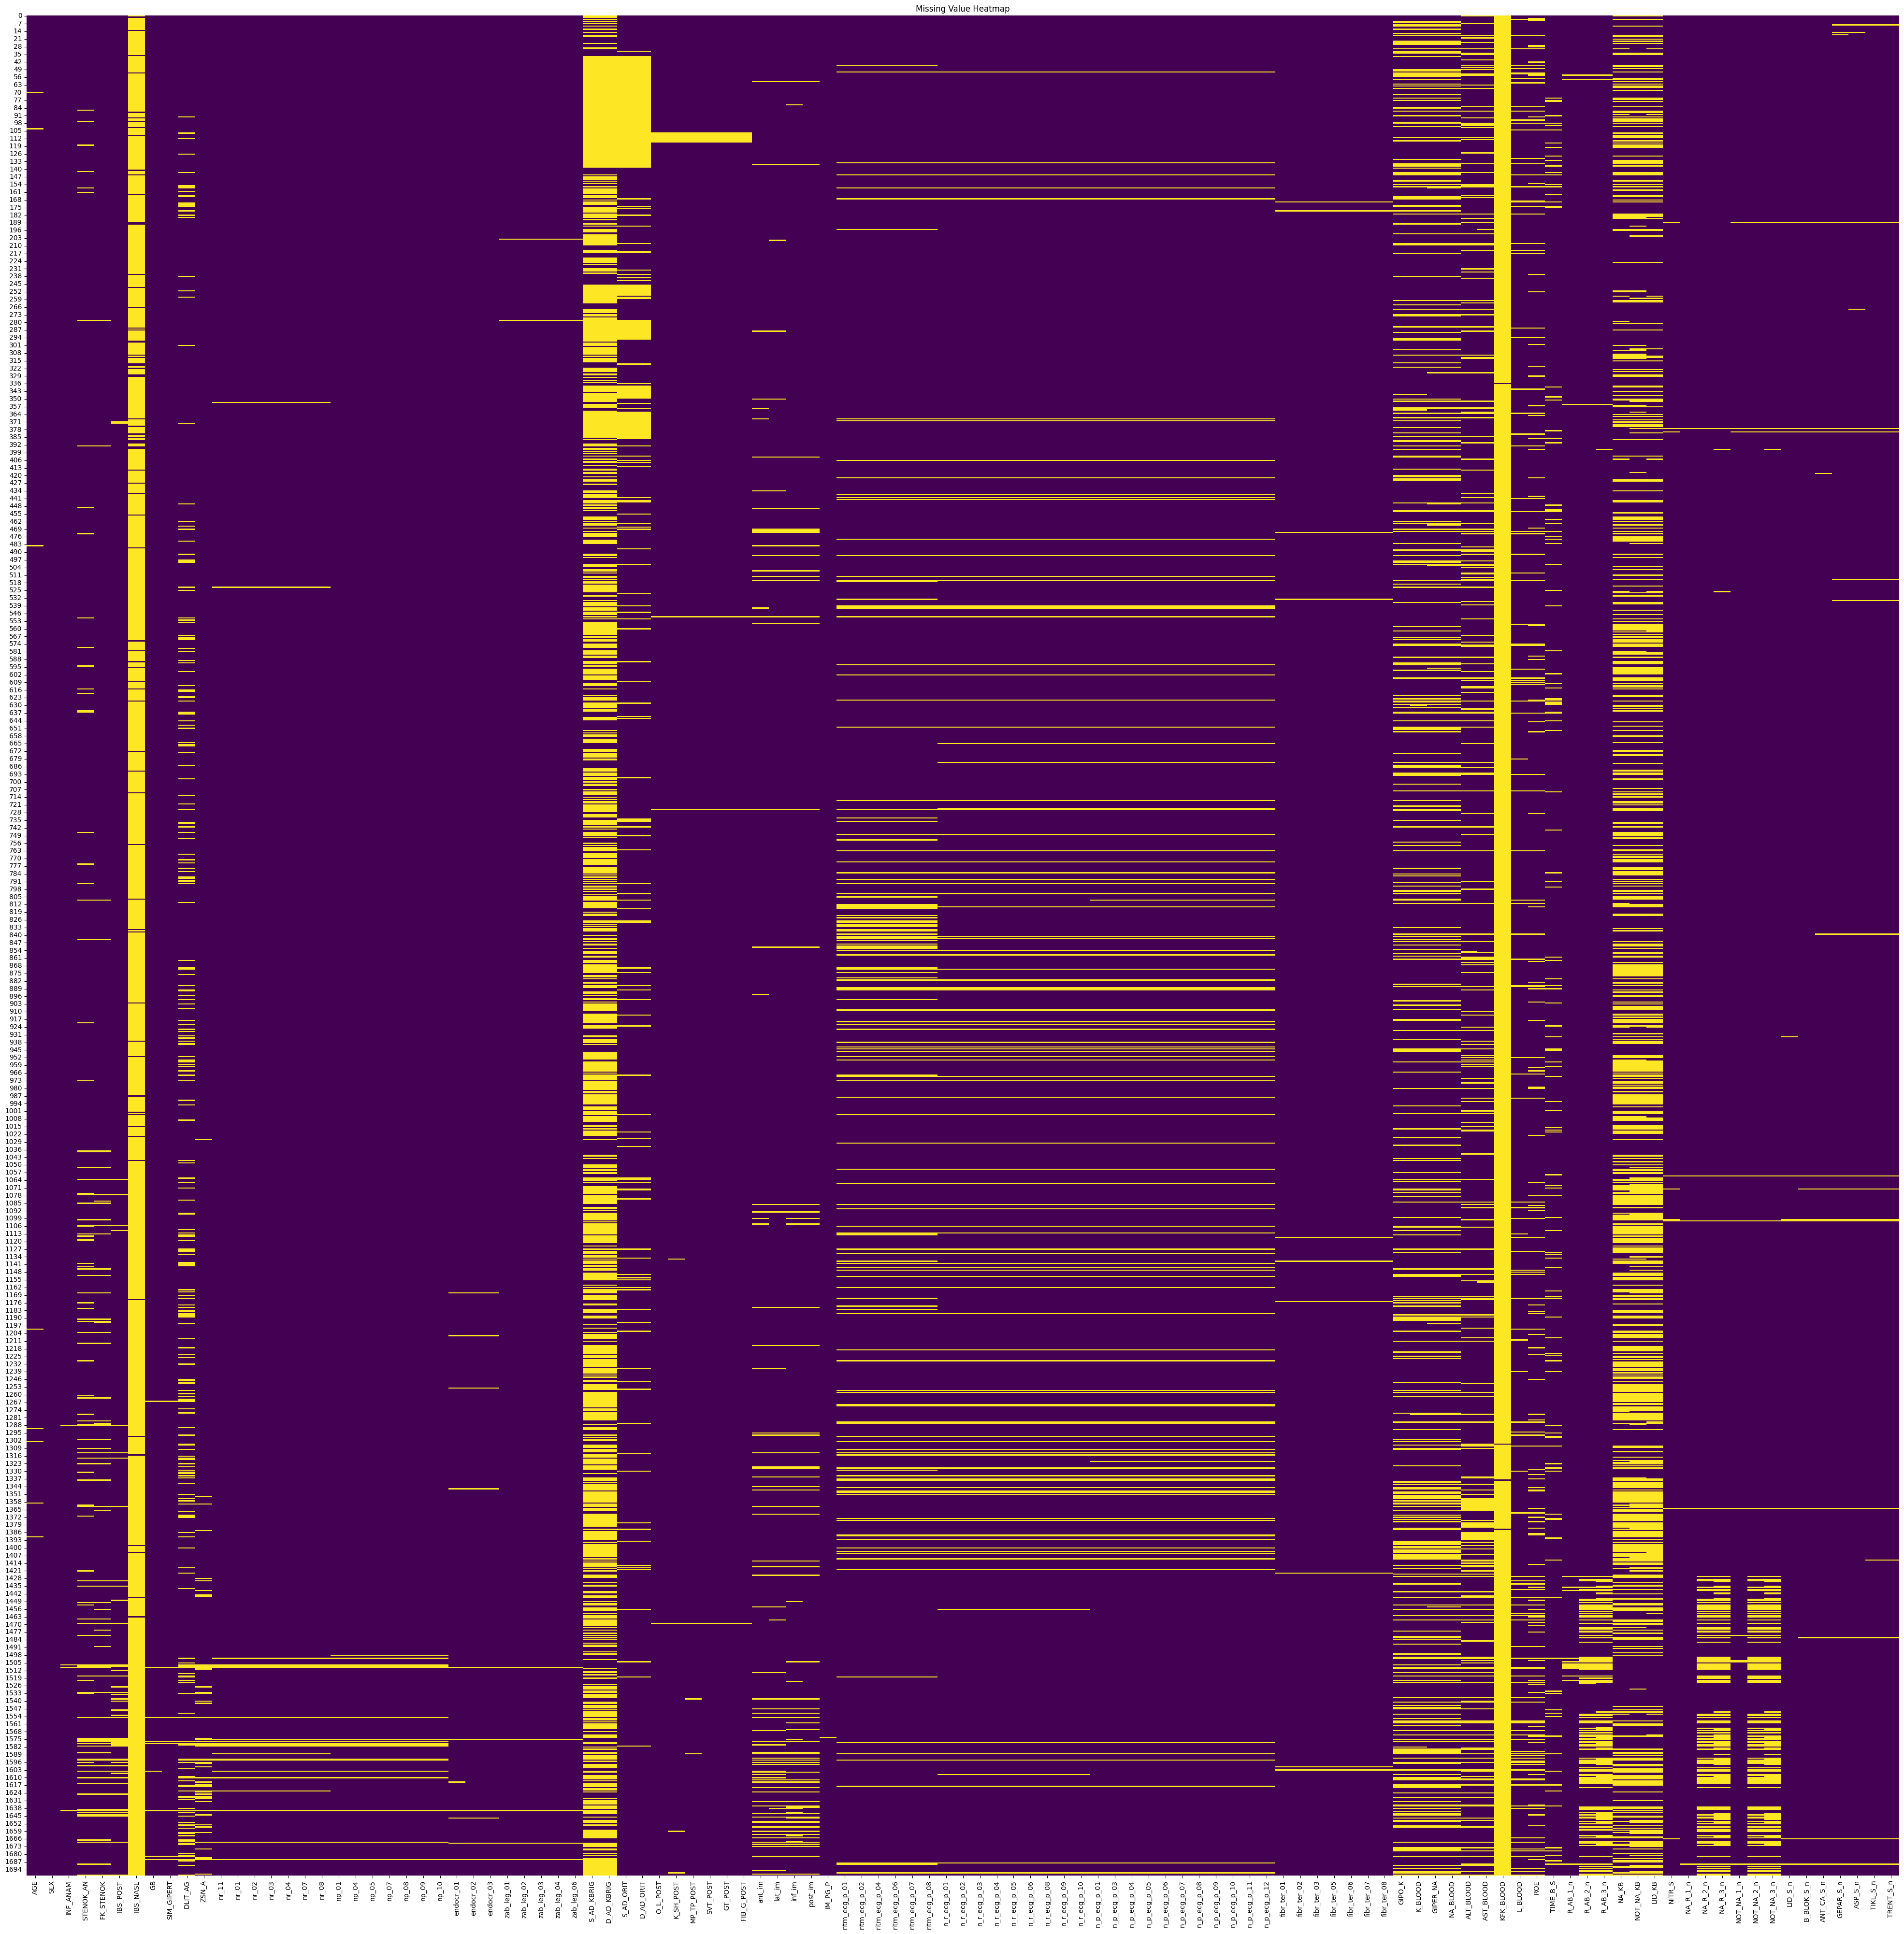

In [ ]:
# Plot missing value heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(X.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:
# deleting the columns with more than 95% missing values
del_cols = X.columns[X.isnull().sum() > 0.95 * len(X)]
del_cols
X_Clean = X.drop(columns=del_cols)

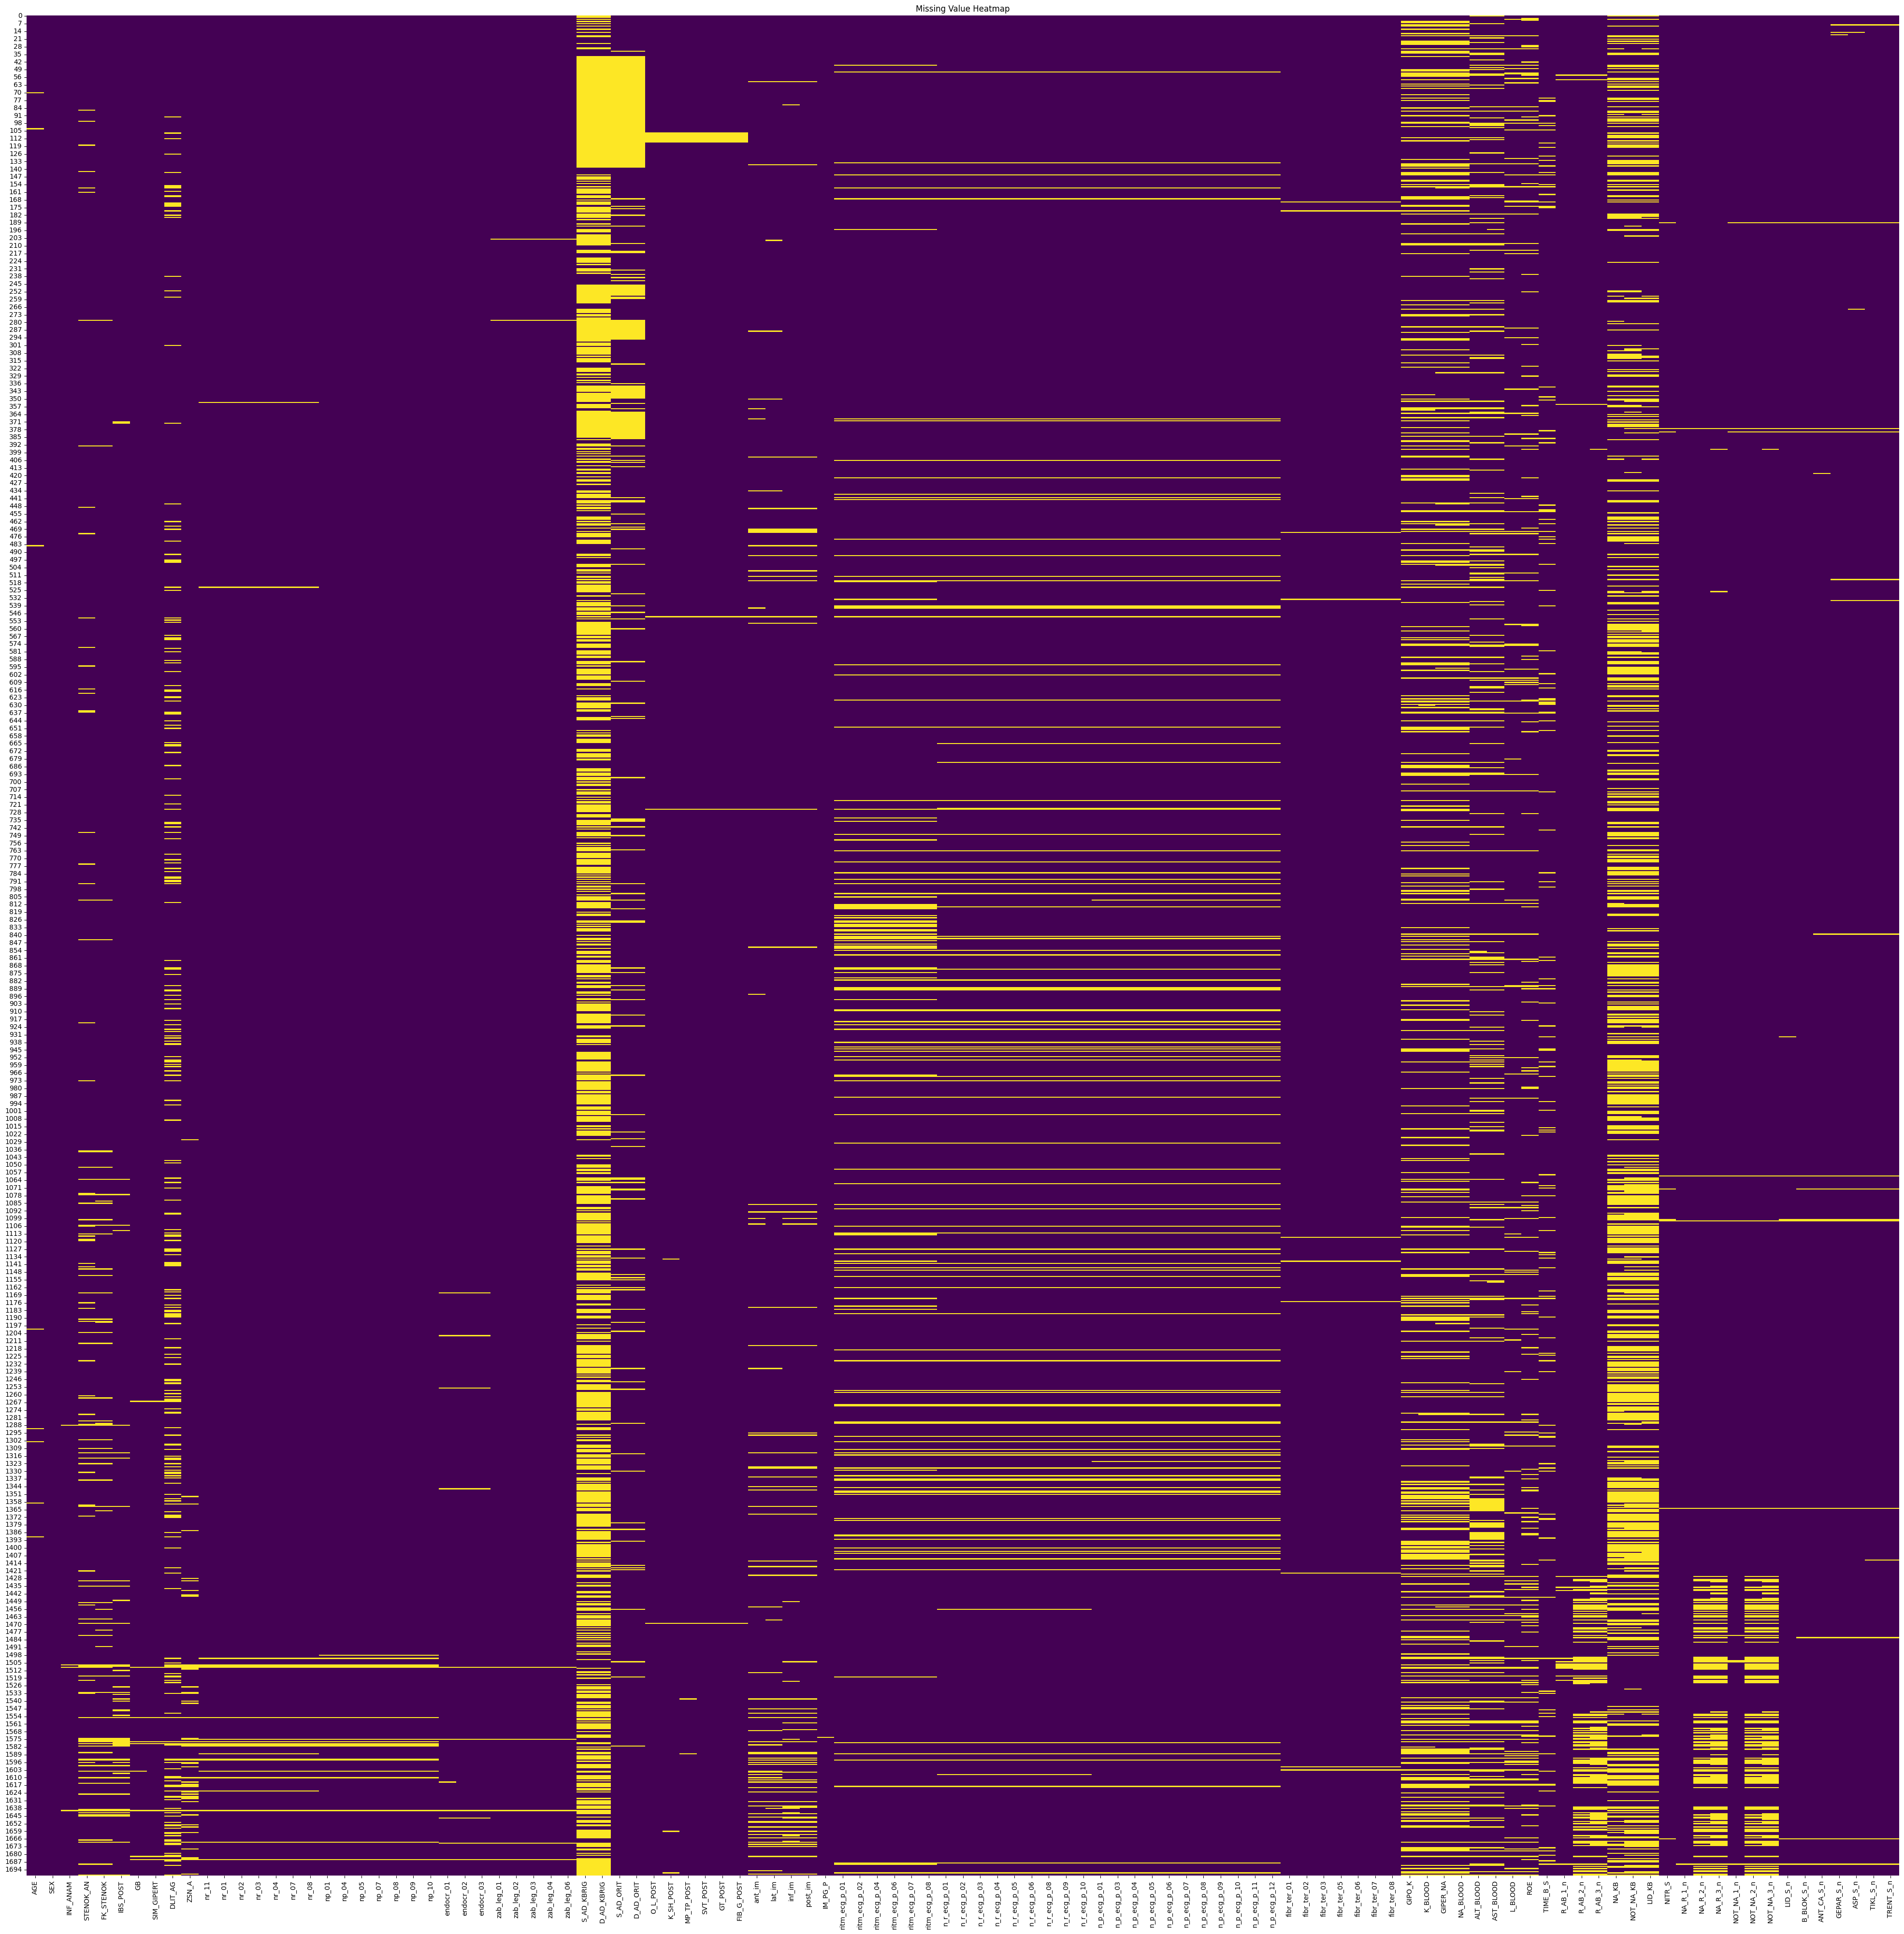

In [ ]:
# Plot missing value heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(X_Clean.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:
# Check for duplicate rows
X_duplicate_rows = X[X.duplicated()]

# Display the duplicate rows (if any)
print("Duplicate rows:\n", X_duplicate_rows)

# Count the number of duplicate rows
num_duplicates_X = X.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates_X}")

Duplicate rows:
 Empty DataFrame
Columns: [AGE, SEX, INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST, IBS_NASL, GB, SIM_GIPERT, DLIT_AG, ZSN_A, nr_11, nr_01, nr_02, nr_03, nr_04, nr_07, nr_08, np_01, np_04, np_05, np_07, np_08, np_09, np_10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, ant_im, lat_im, inf_im, post_im, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, K_BLOOD, GIPER_NA, NA_BLOOD, ALT_BLOOD, AST_BLOOD, 

In [ ]:
# Transpose the DataFrame so columns become rows, then use the duplicated() function
duplicate_columns = X.T[X.T.duplicated()].T

# Display the duplicate columns (if any)
print("Duplicate columns:\n", duplicate_columns)

# Count the number of duplicate columns
num_duplicate_columns = X.T.duplicated().sum()
print(f"Number of duplicate columns: {num_duplicate_columns}")

Duplicate columns:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1700 rows x 0 columns]
Number of duplicate columns: 0


In [ ]:
# Function to calculate the number of outliers in each column
def count_outliers(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outlier_counts[column] = outlier_count

    return outlier_counts

# Calculate outliers for X_clean
outliers = count_outliers(X_Clean)

# Convert to DataFrame for easier analysis
outliers_df = pd.DataFrame(outliers.items(), columns=['Feature', 'Outlier Count'])

# Sort by the number of outliers
#outliers_df_sorted = outliers_df.sort_values(by='Outlier Count', ascending=False)

# Display the features with the most outliers
print(outliers_df)

NameError: name 'X_Clean' is not defined

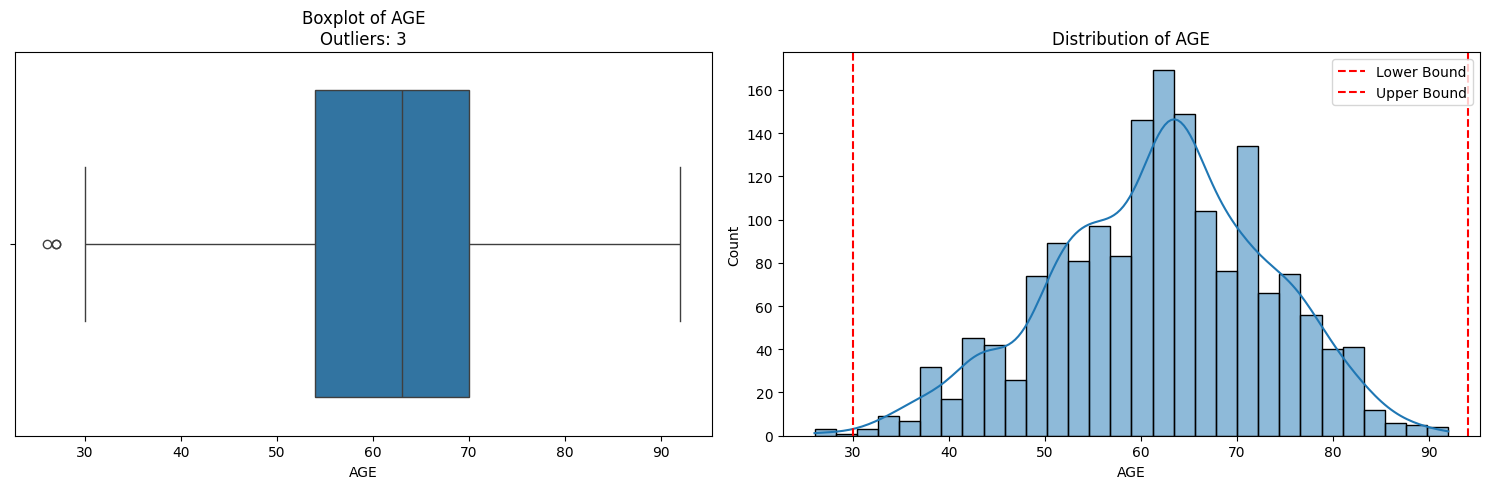

In [ ]:
def visualize_outliers(df, column='AGE'):
    # Calculate IQR and outlier bounds for the Age column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plot the boxplot and histogram side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f"Boxplot of {column}\nOutliers: {len(outliers)}")
    axes[0].set_xlabel(column)

    # Histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    axes[1].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    axes[1].legend()
    axes[1].set_title(f"Distribution of {column}")
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Call the function for the 'Age' column
visualize_outliers(X_Clean, column='AGE')


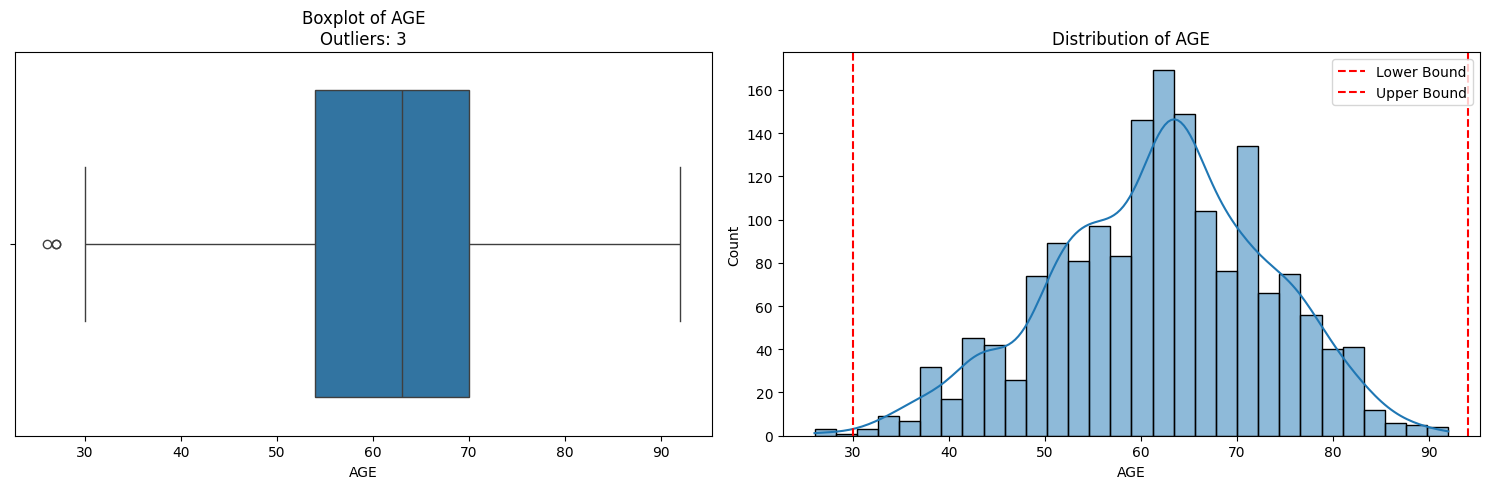

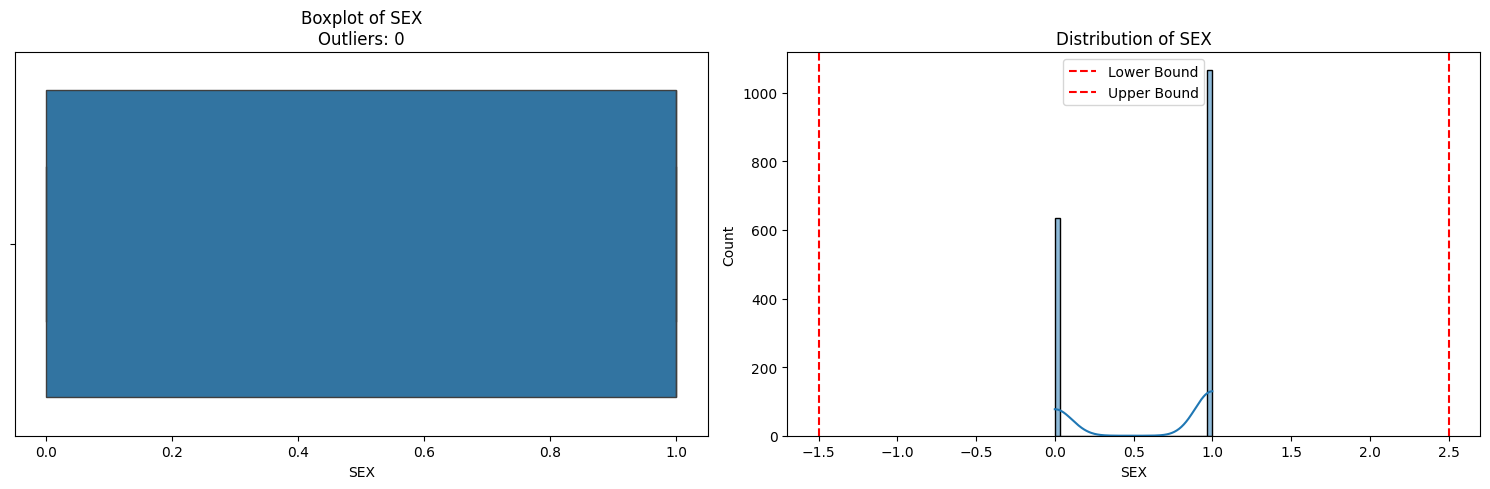

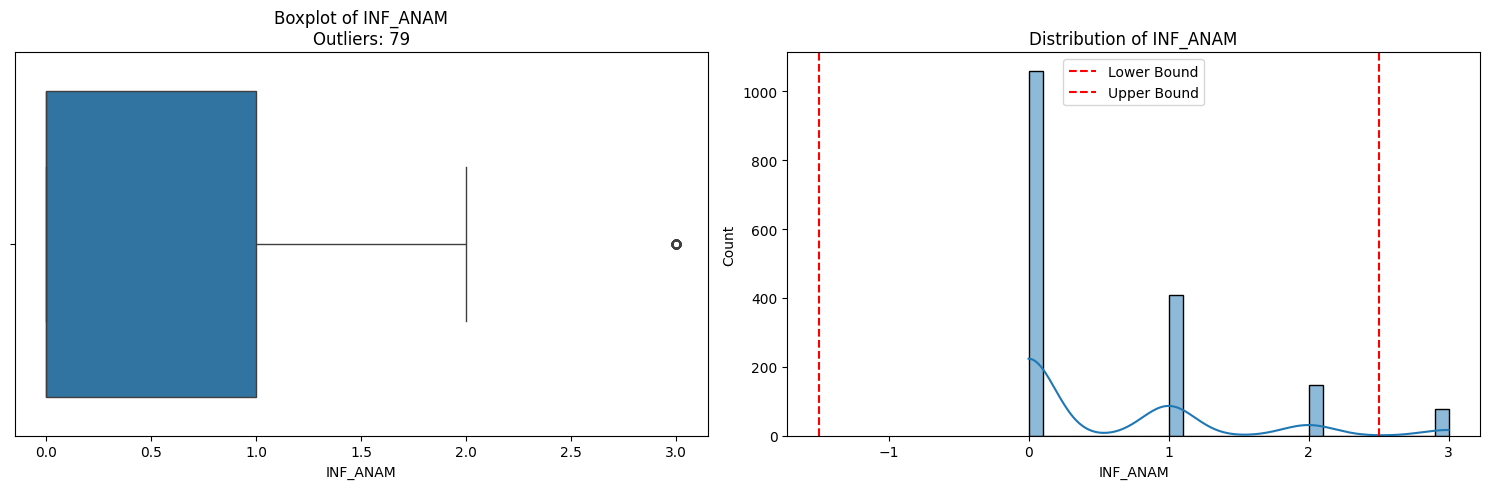

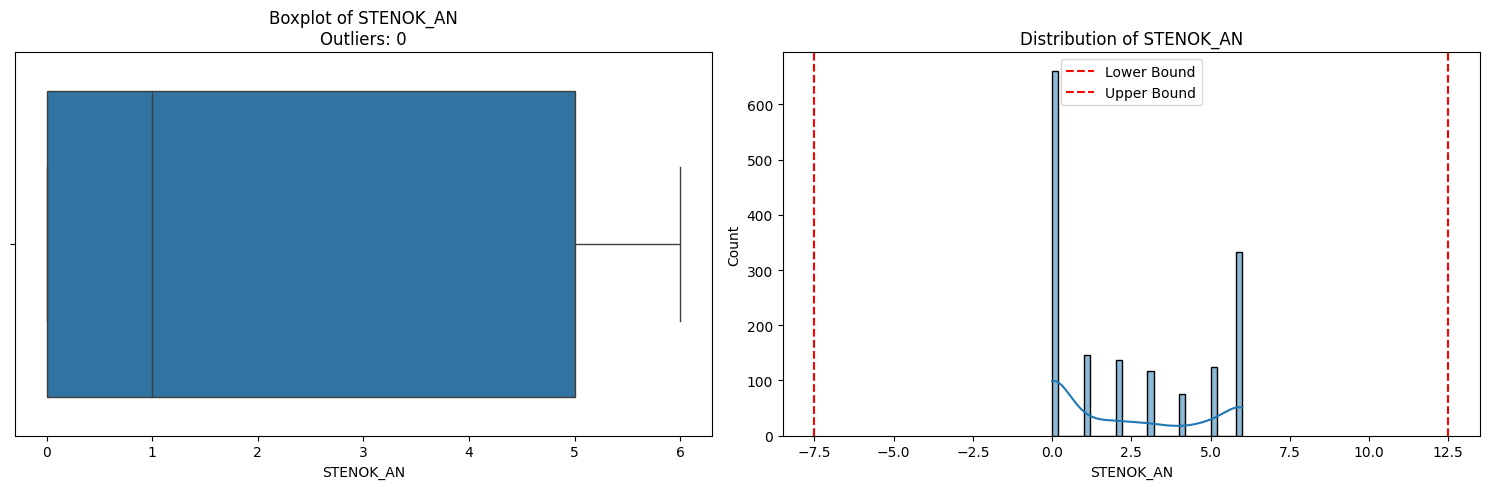

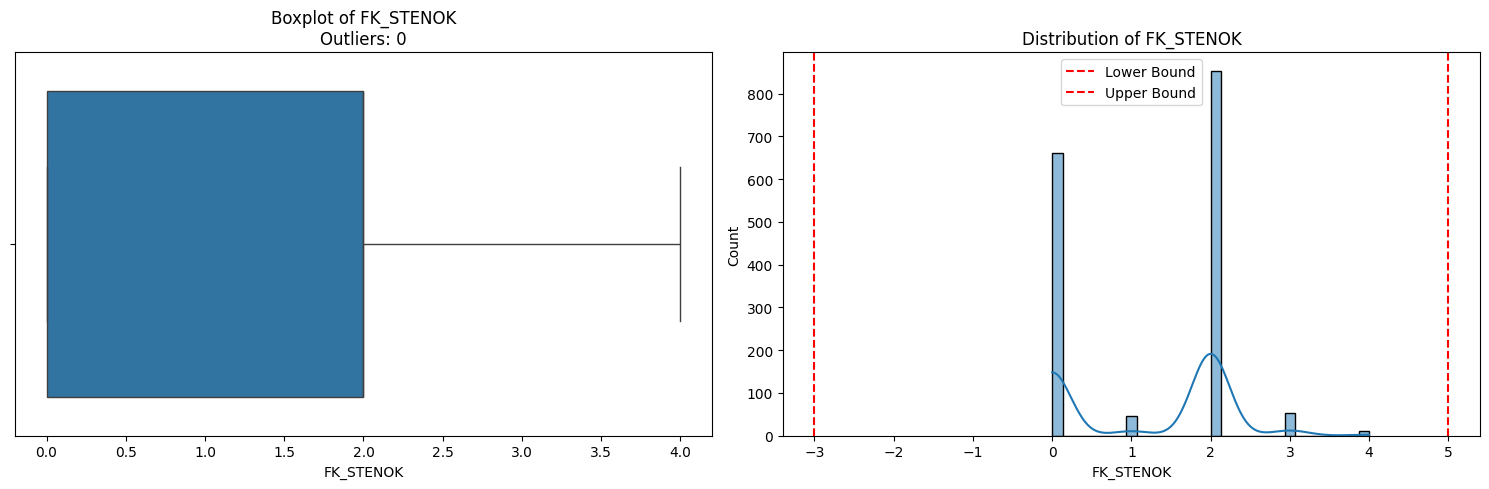

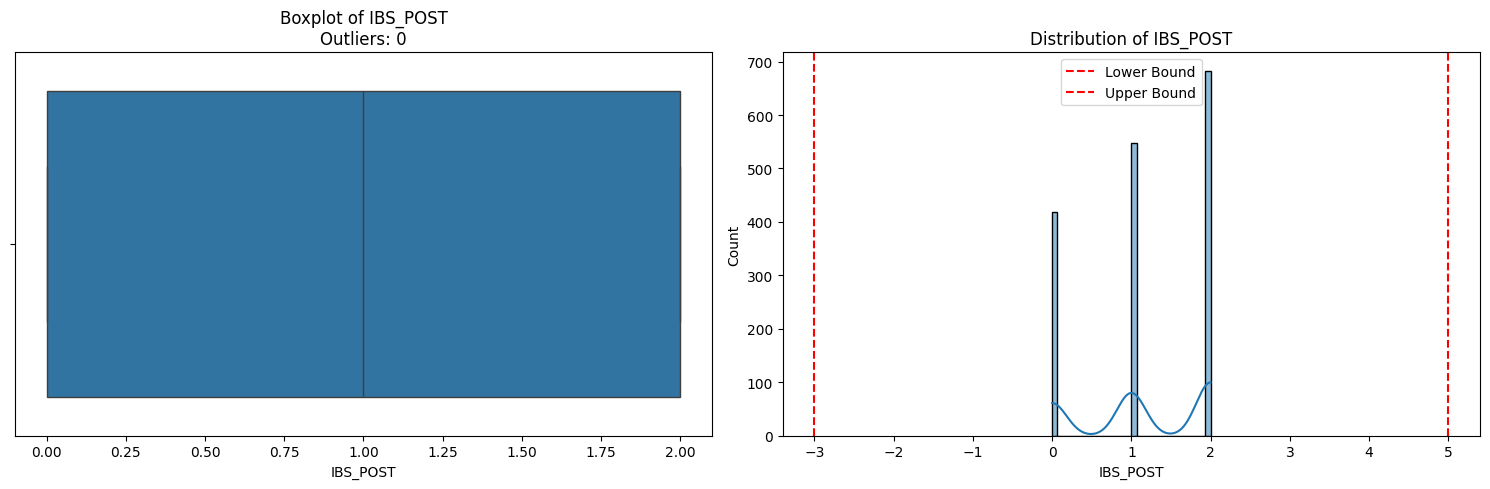

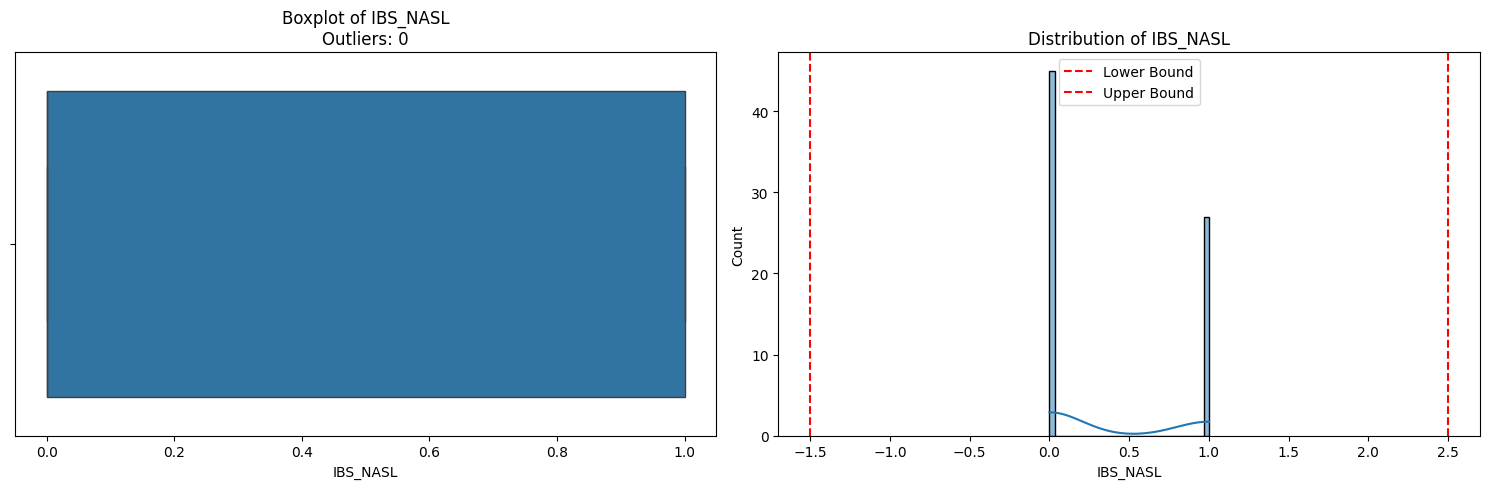

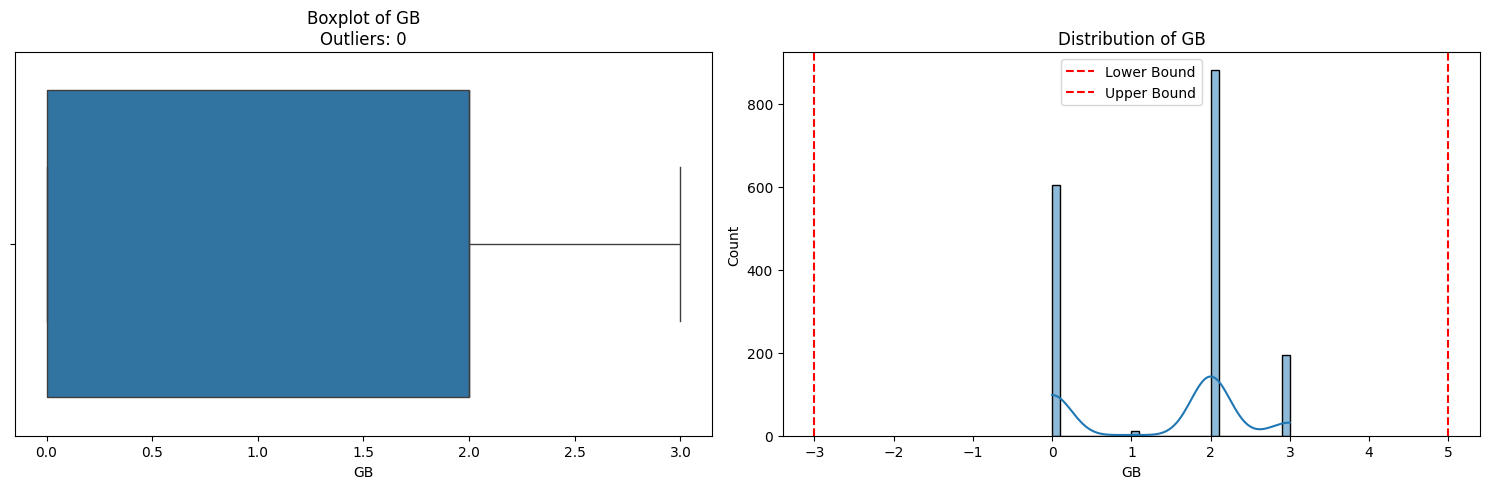

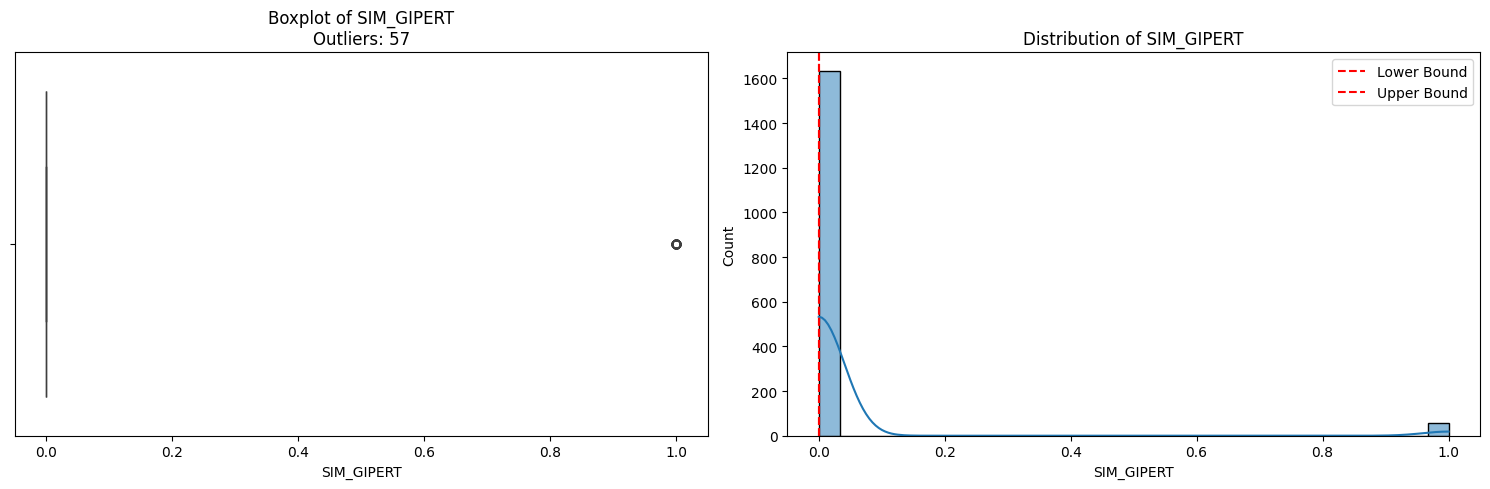

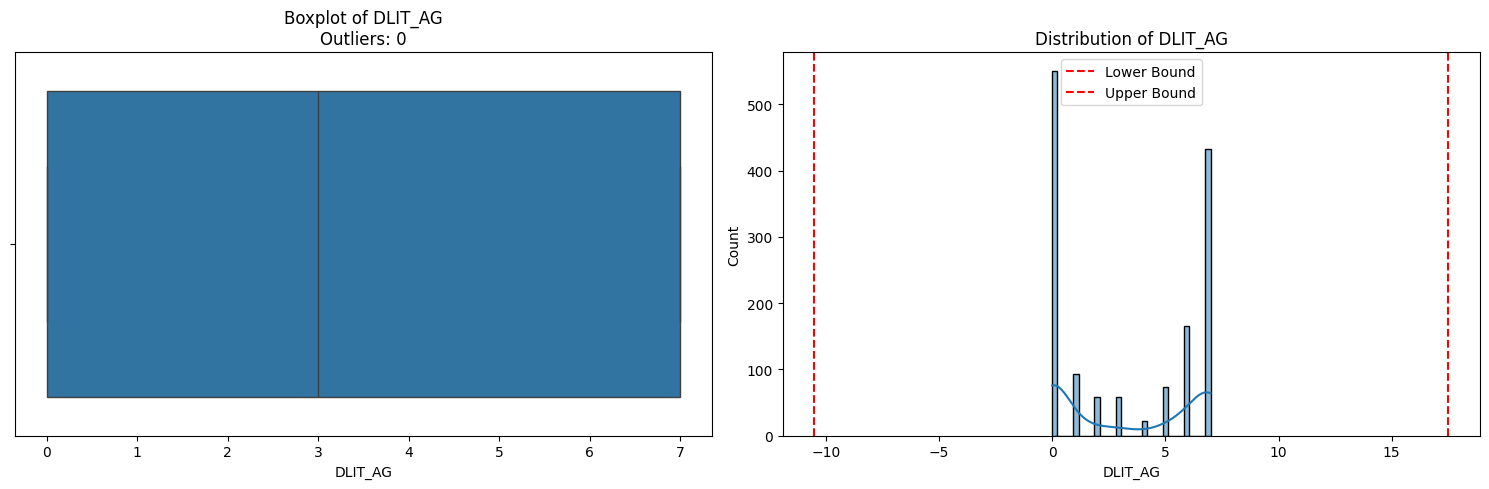

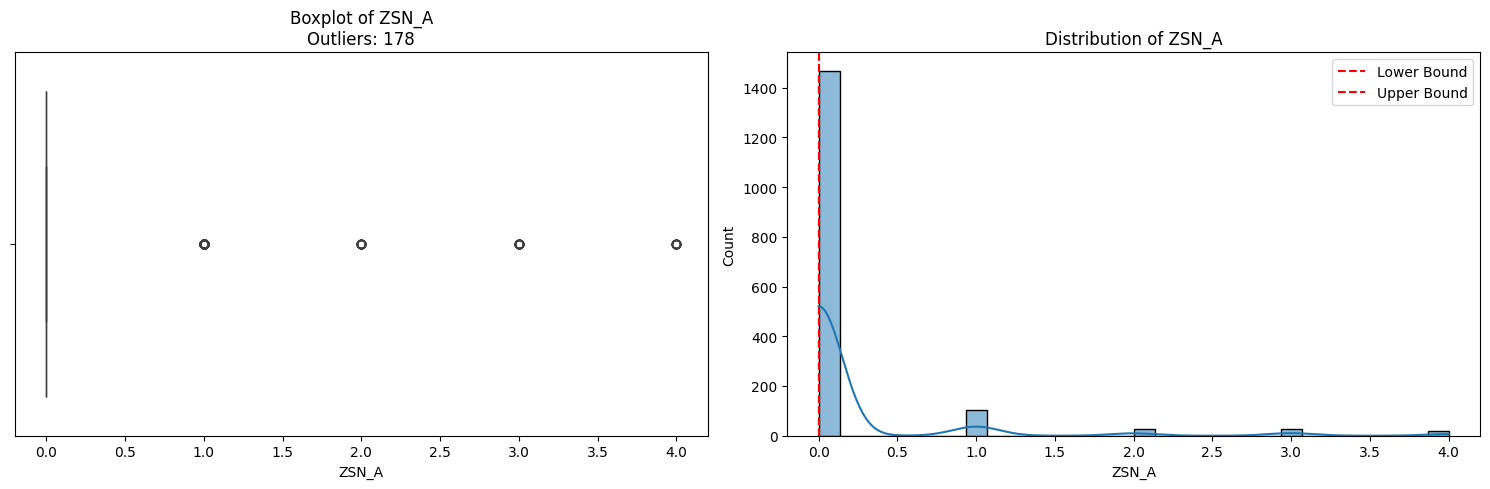

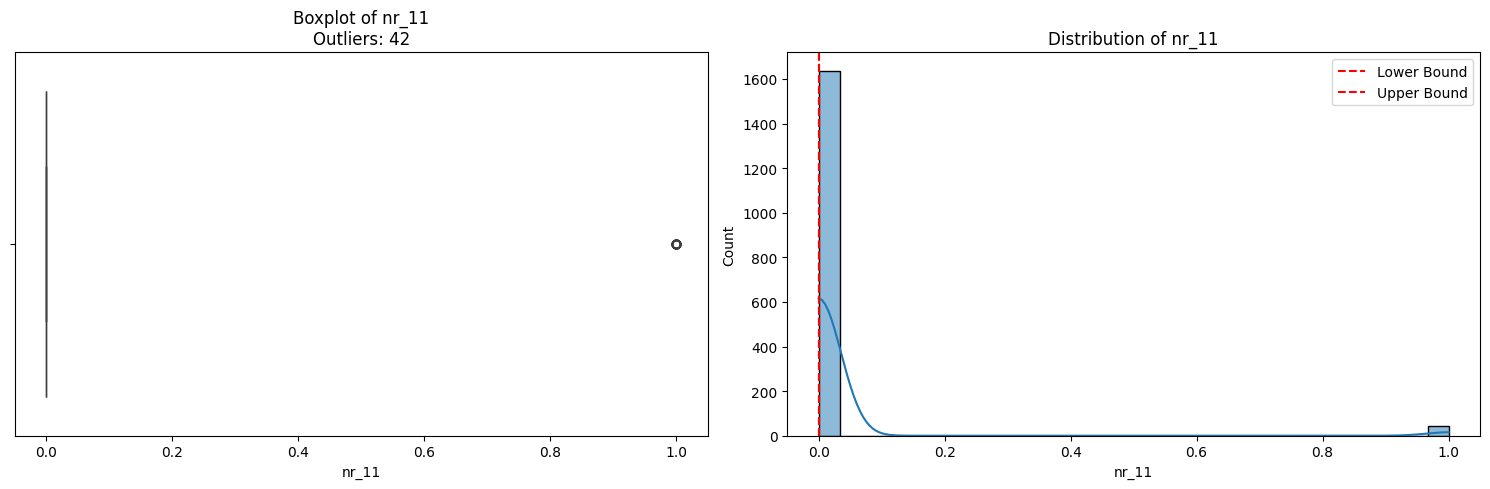

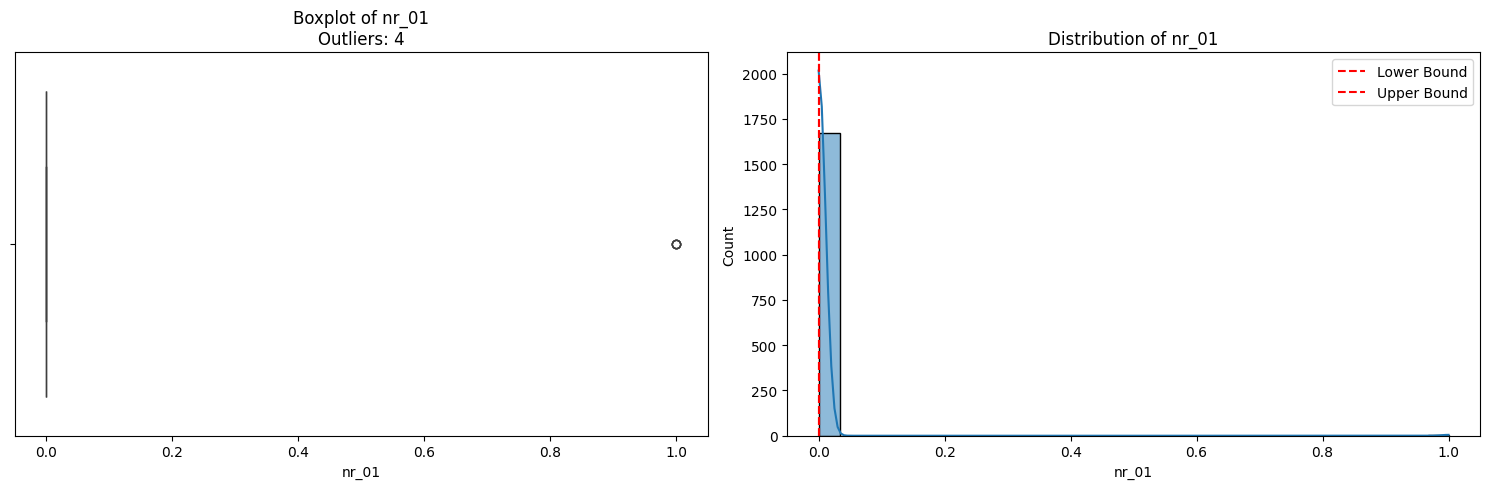

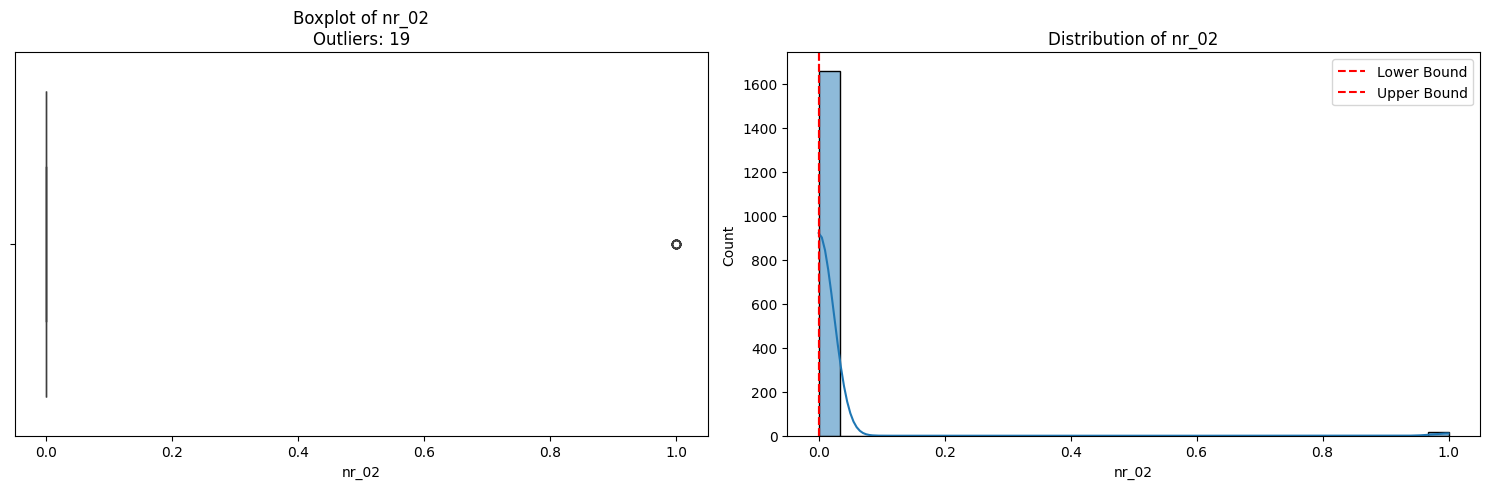

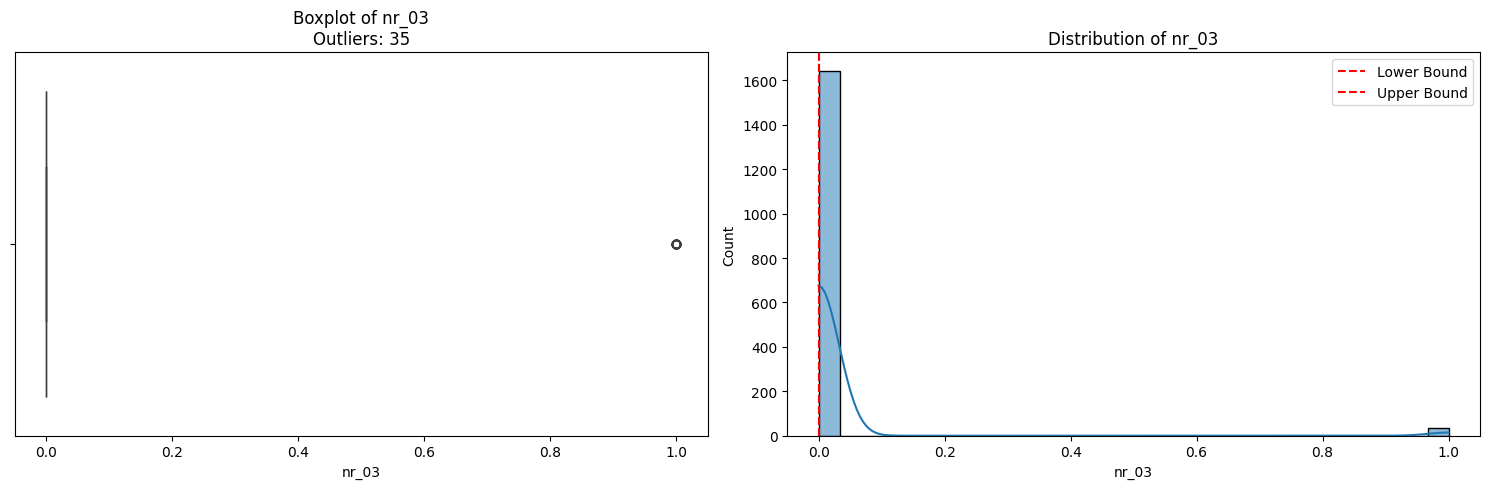

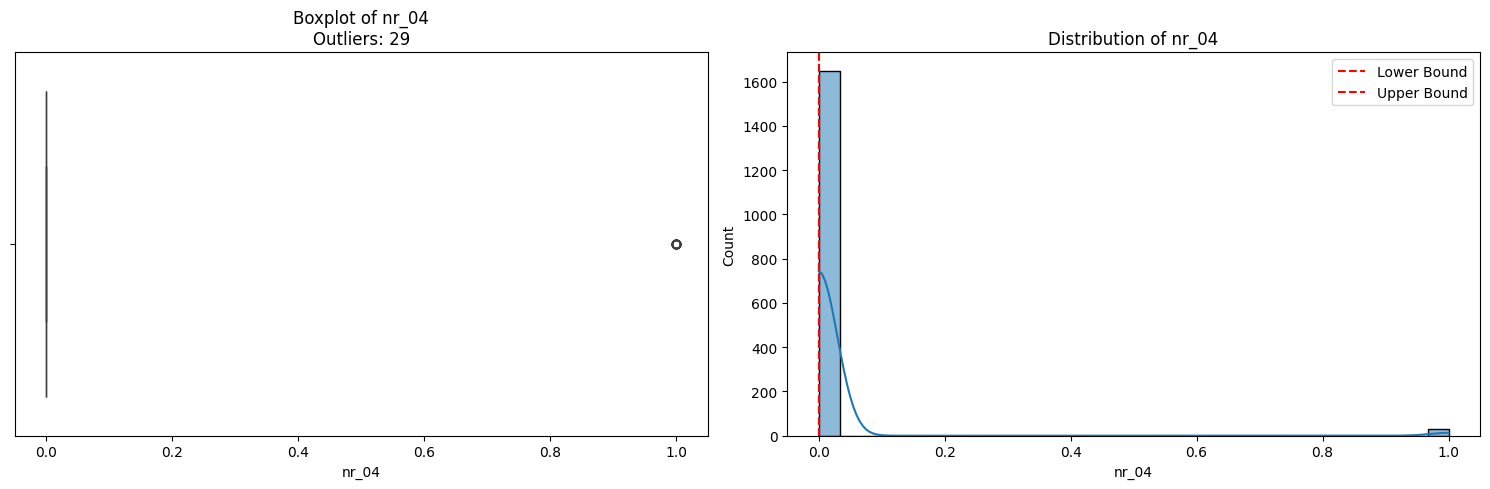

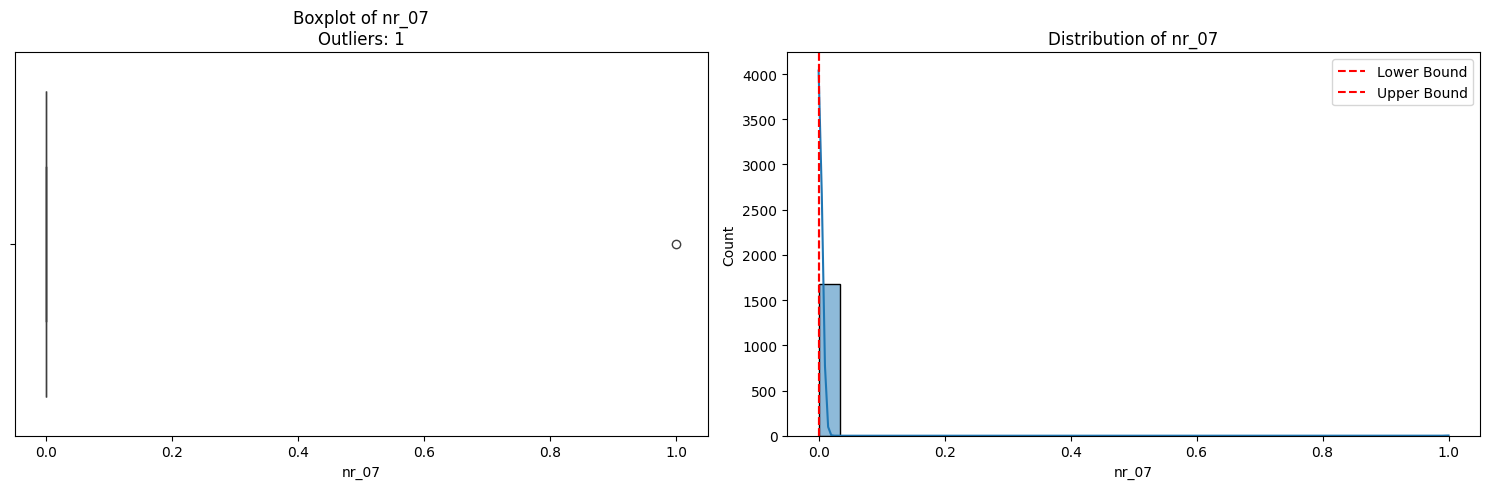

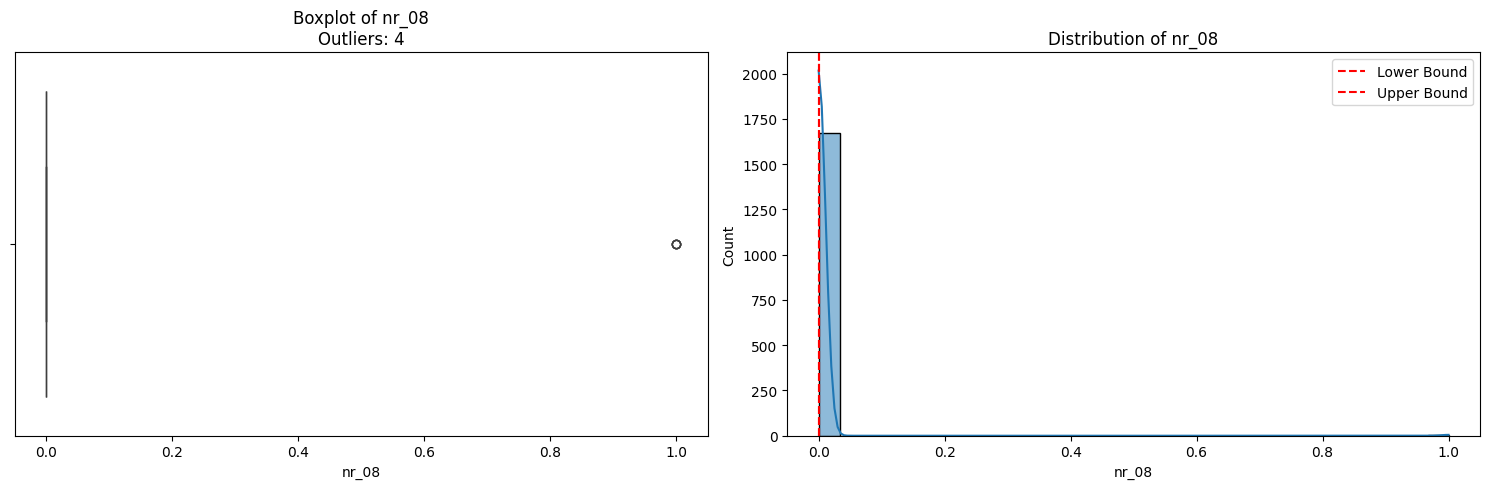

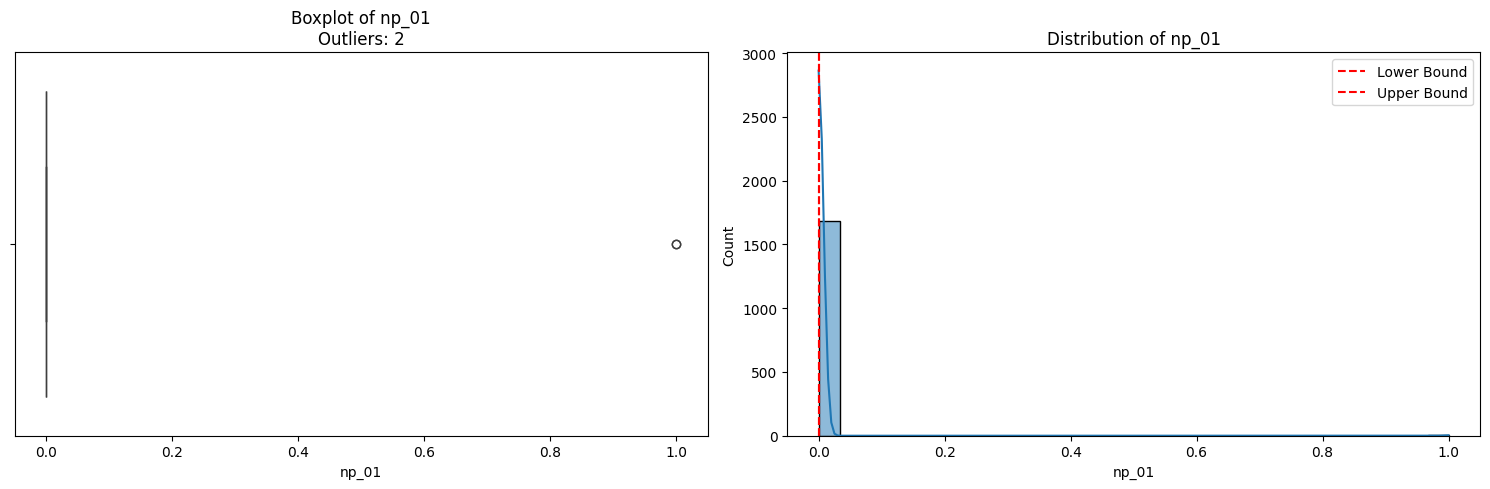

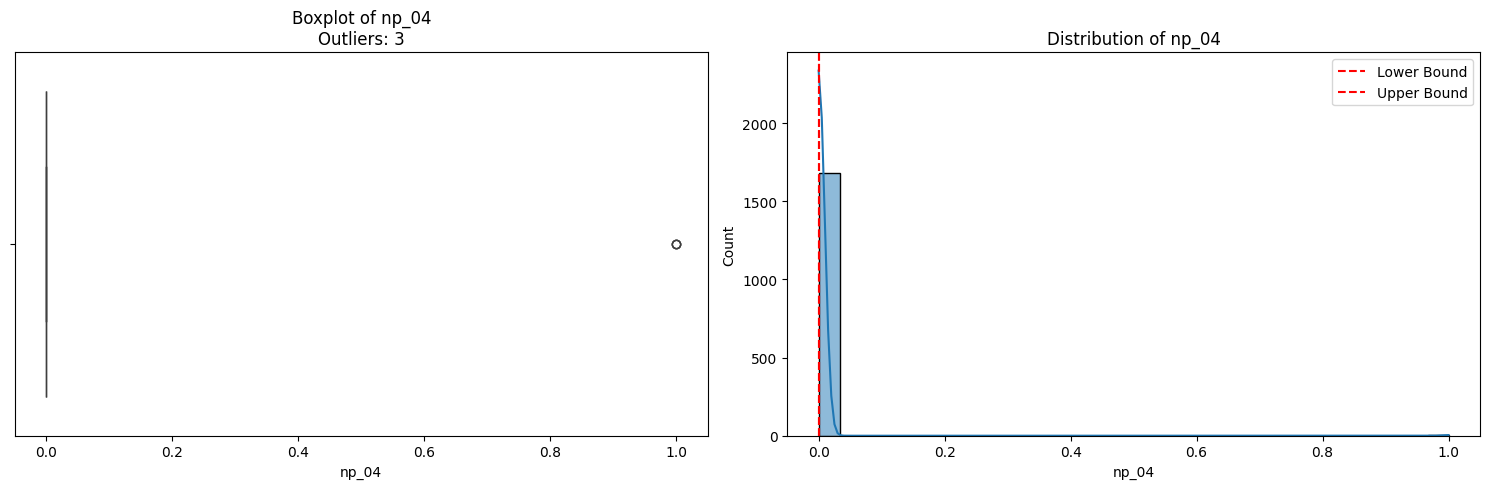

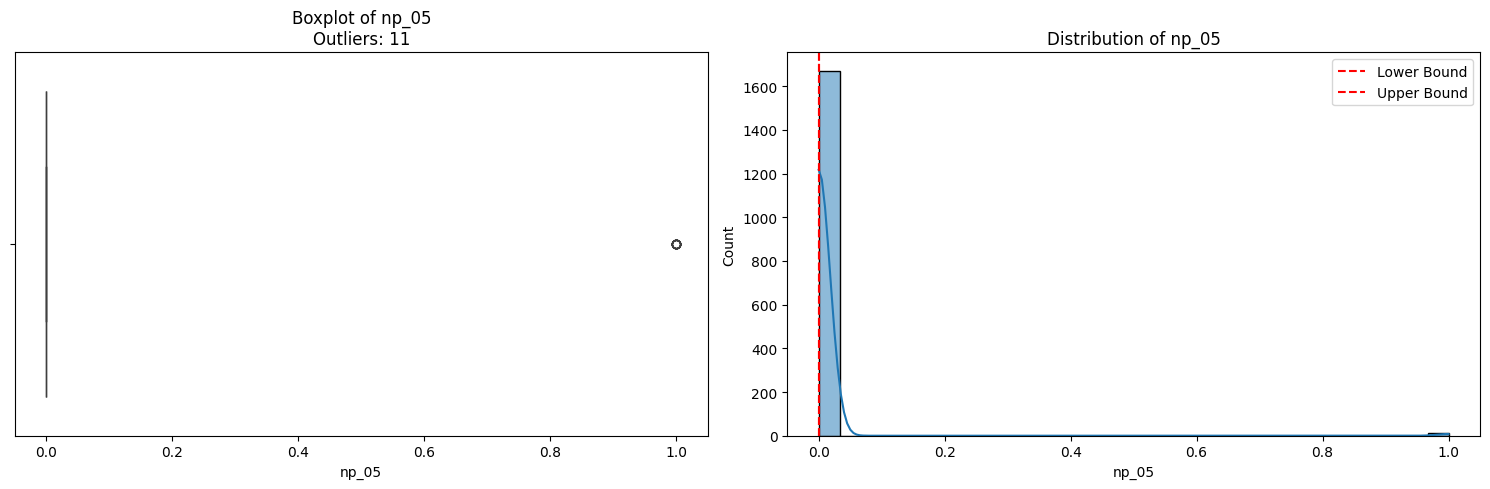

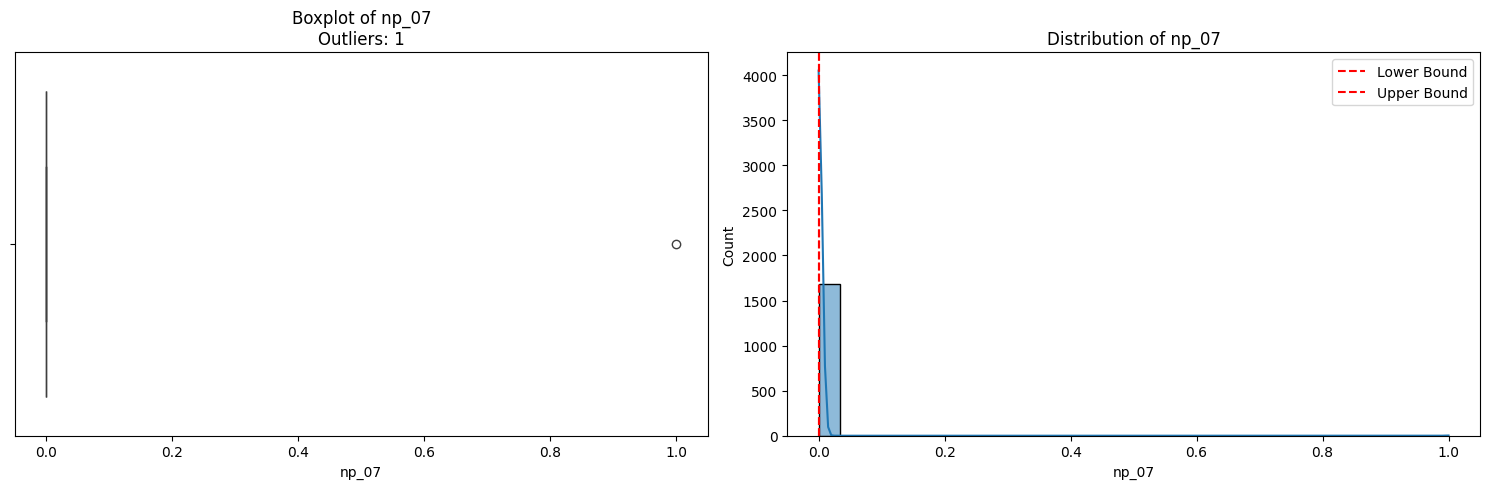

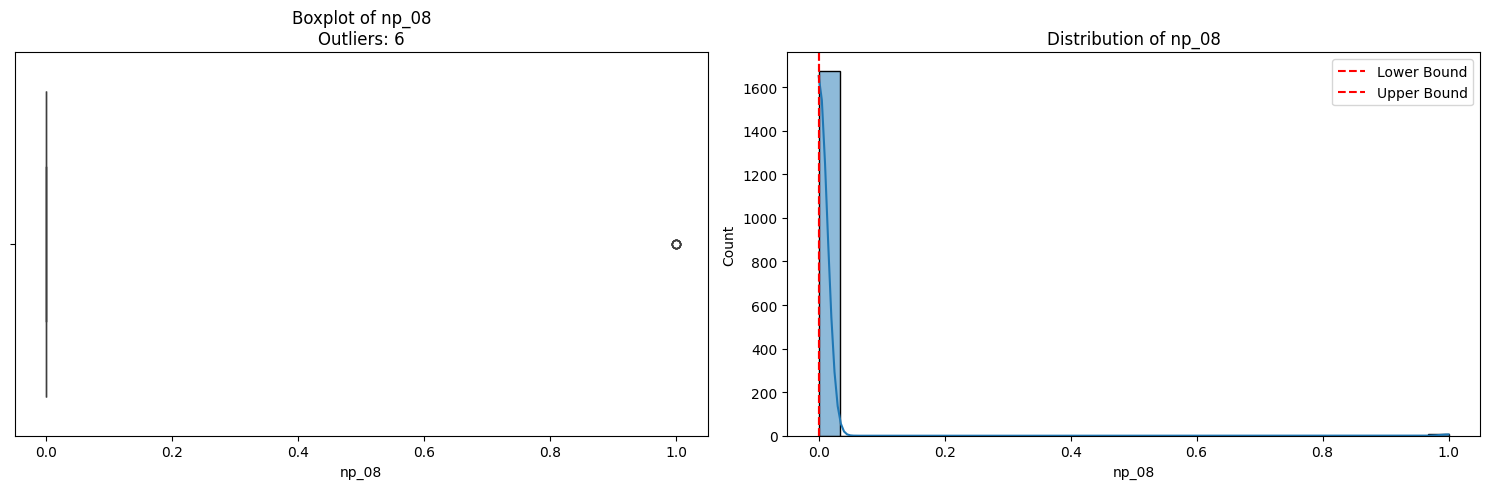

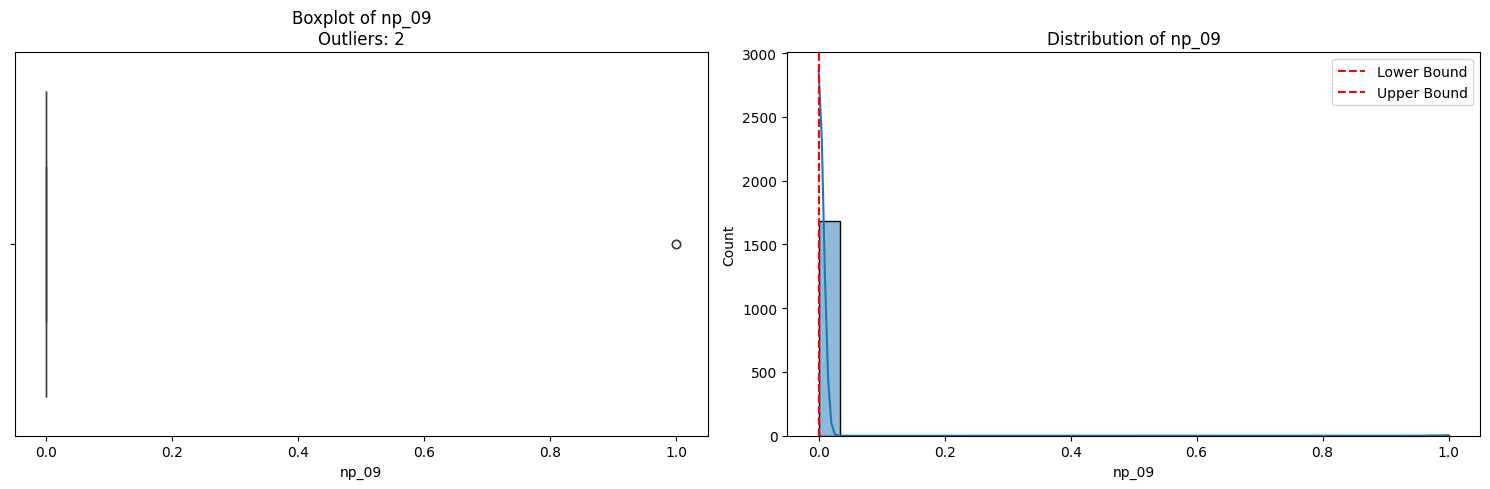

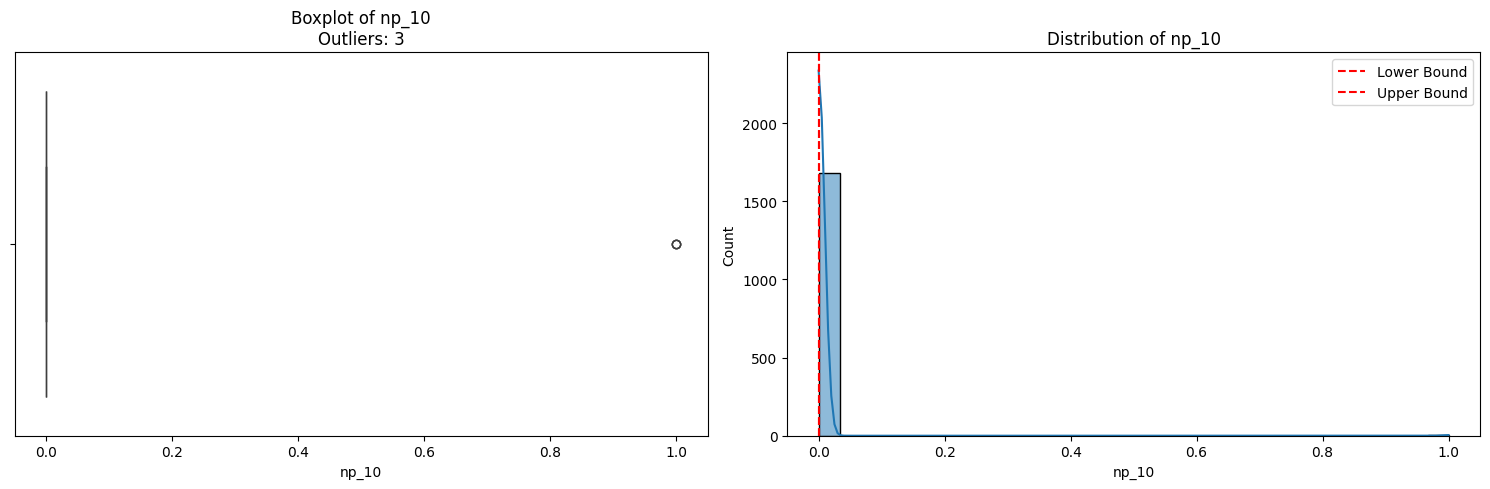

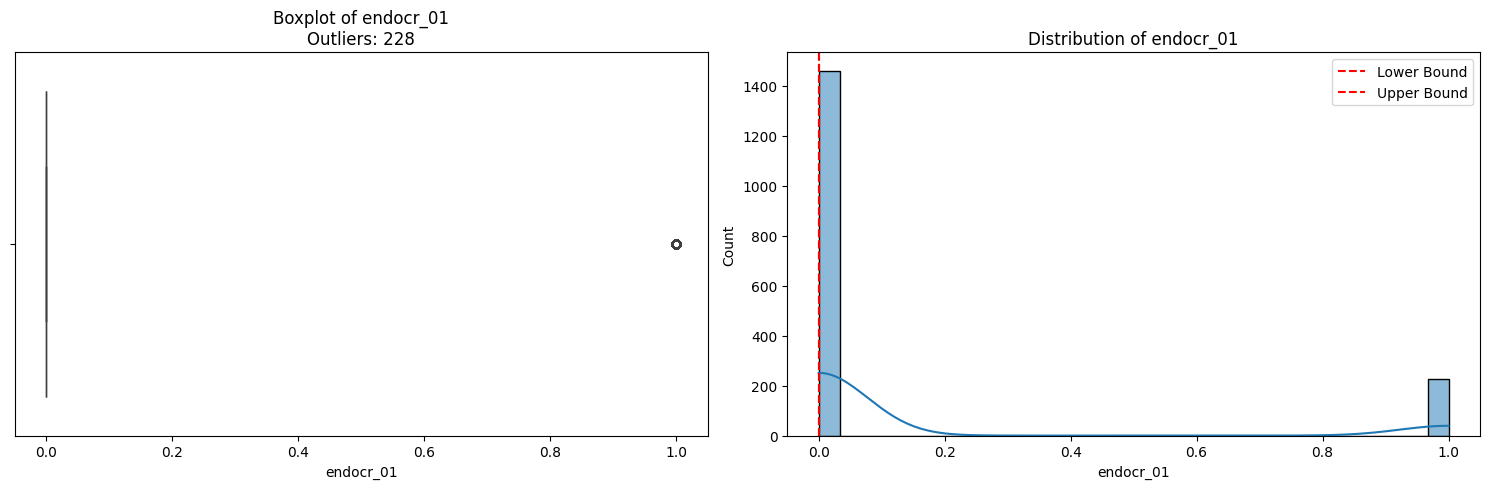

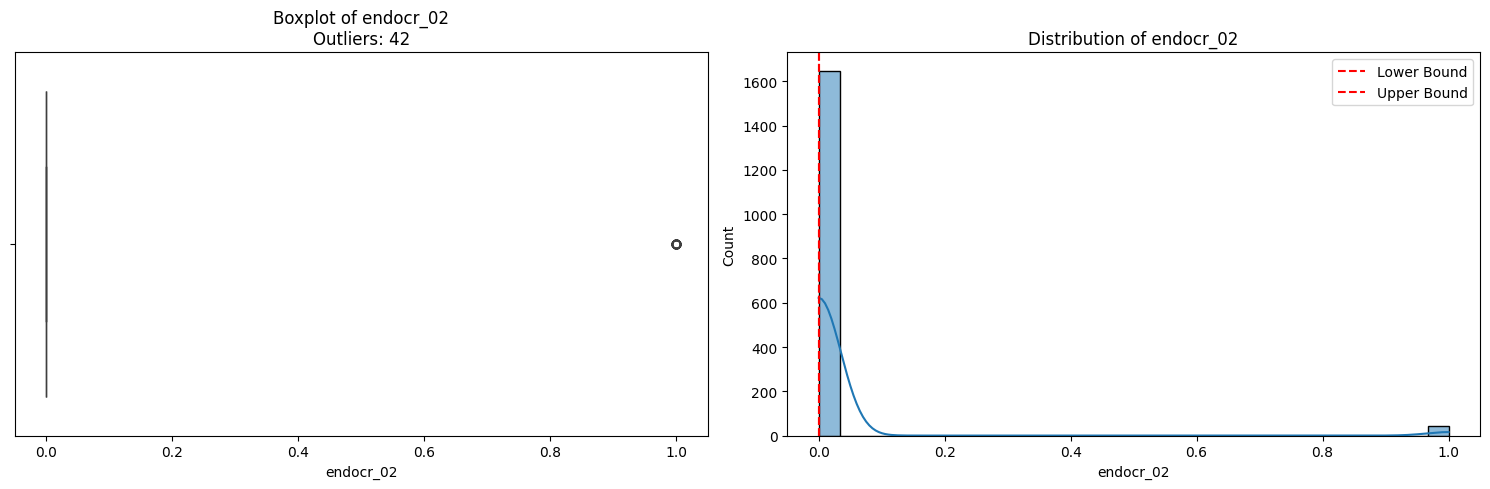

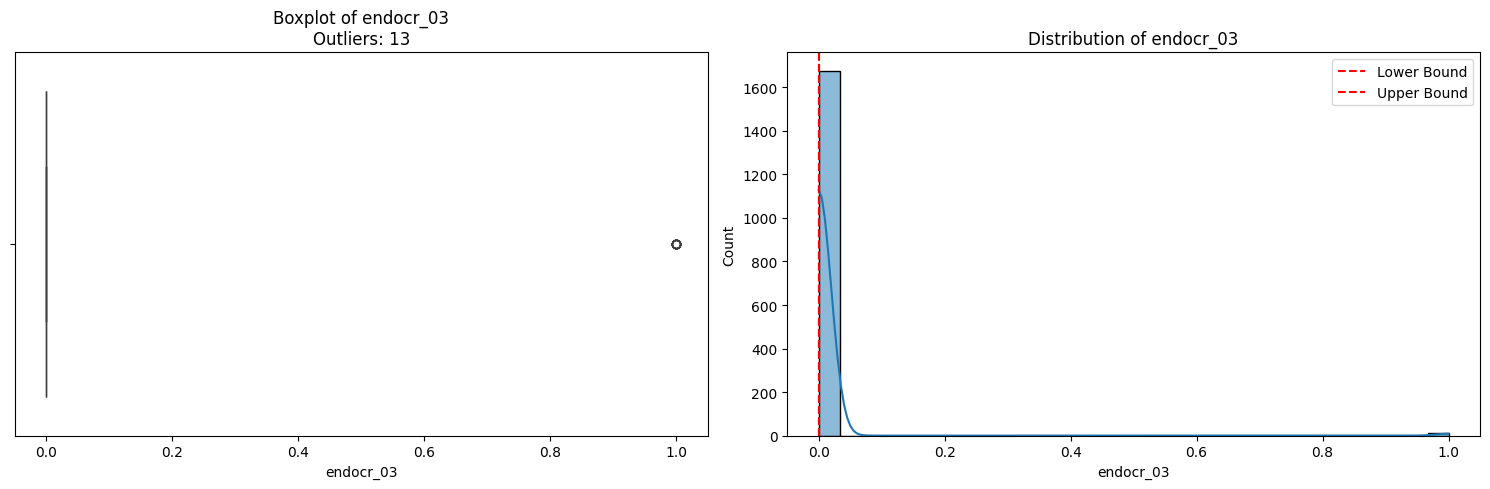

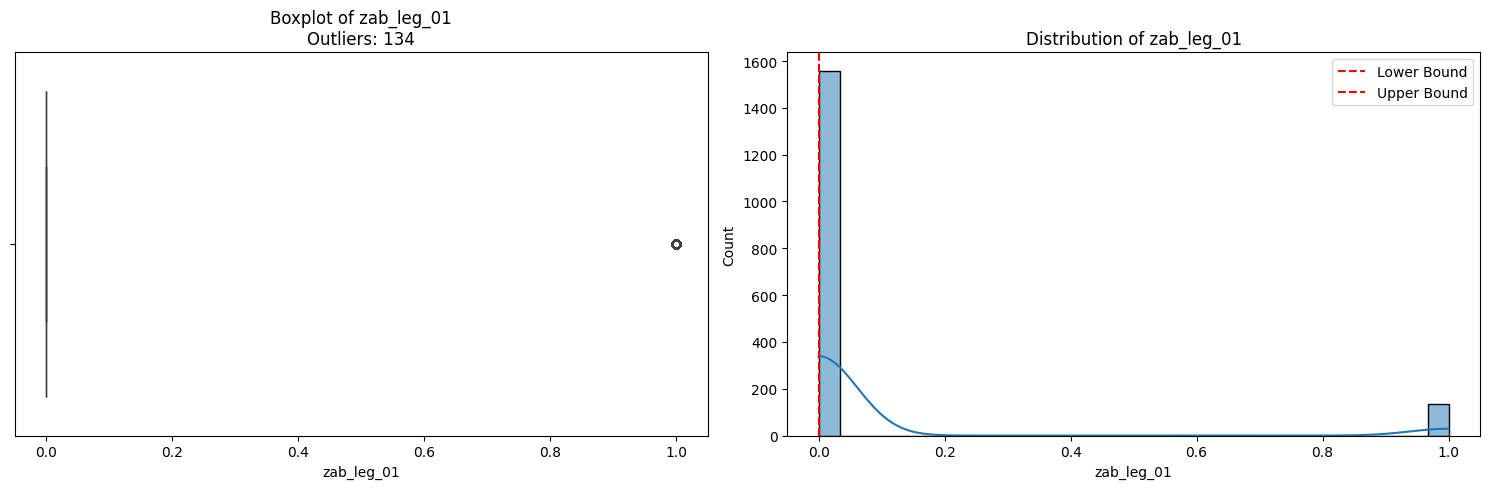

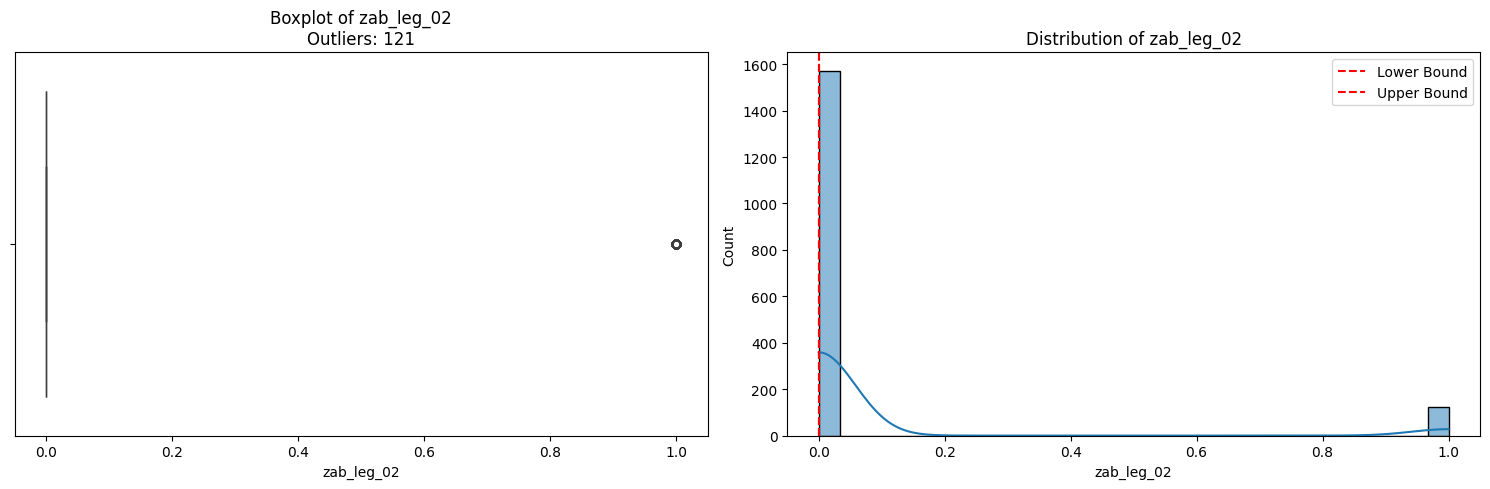

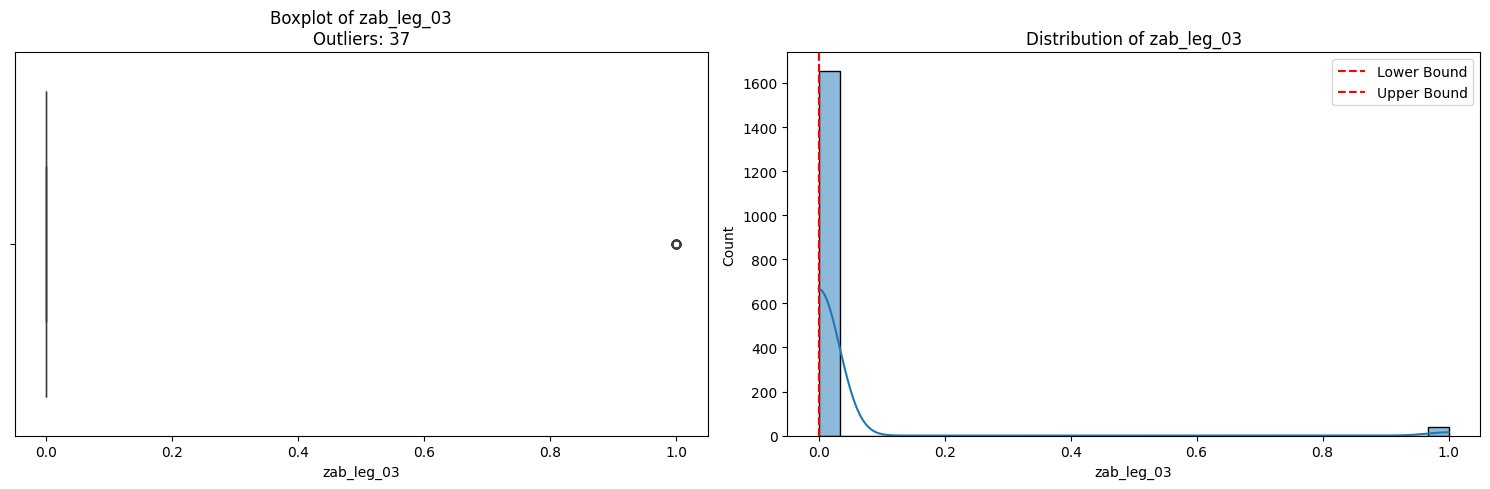

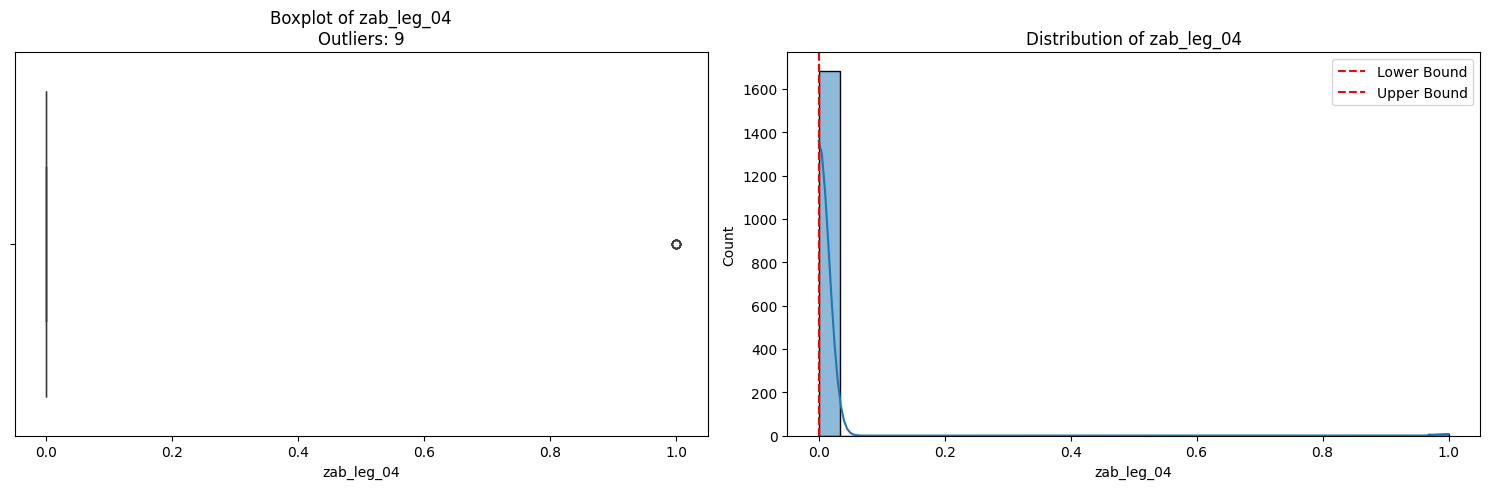

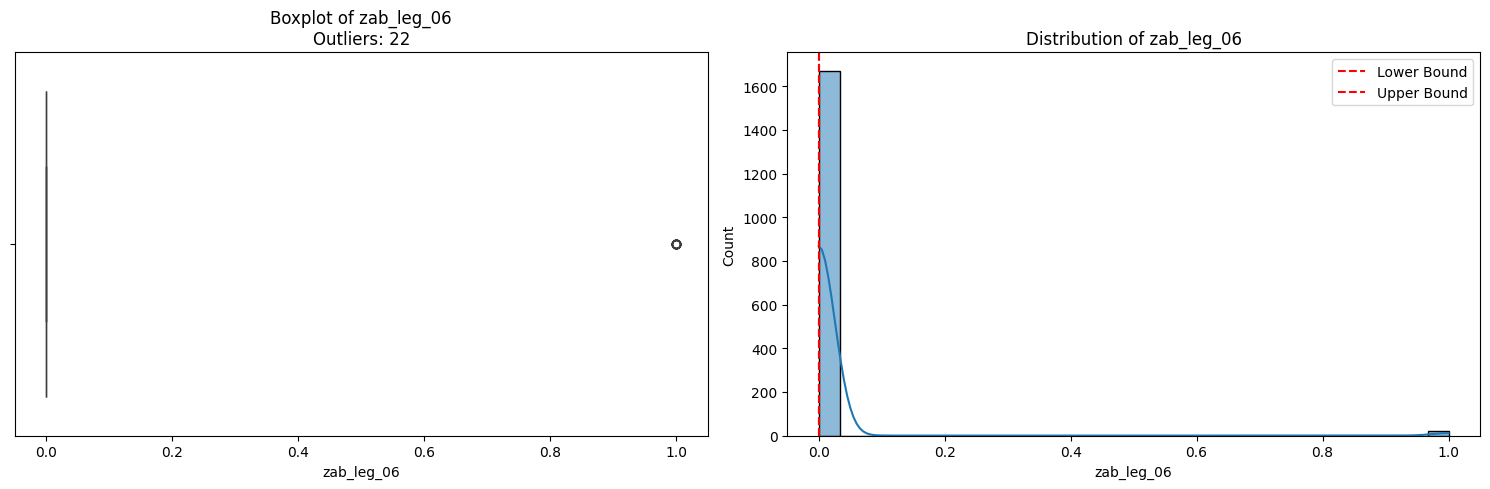

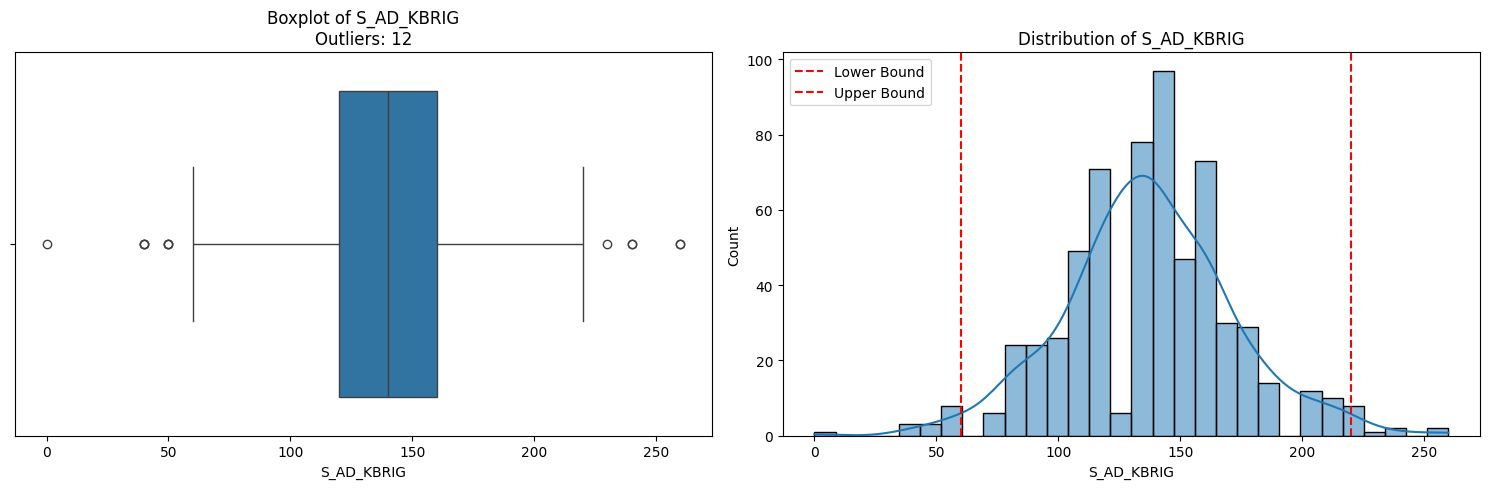

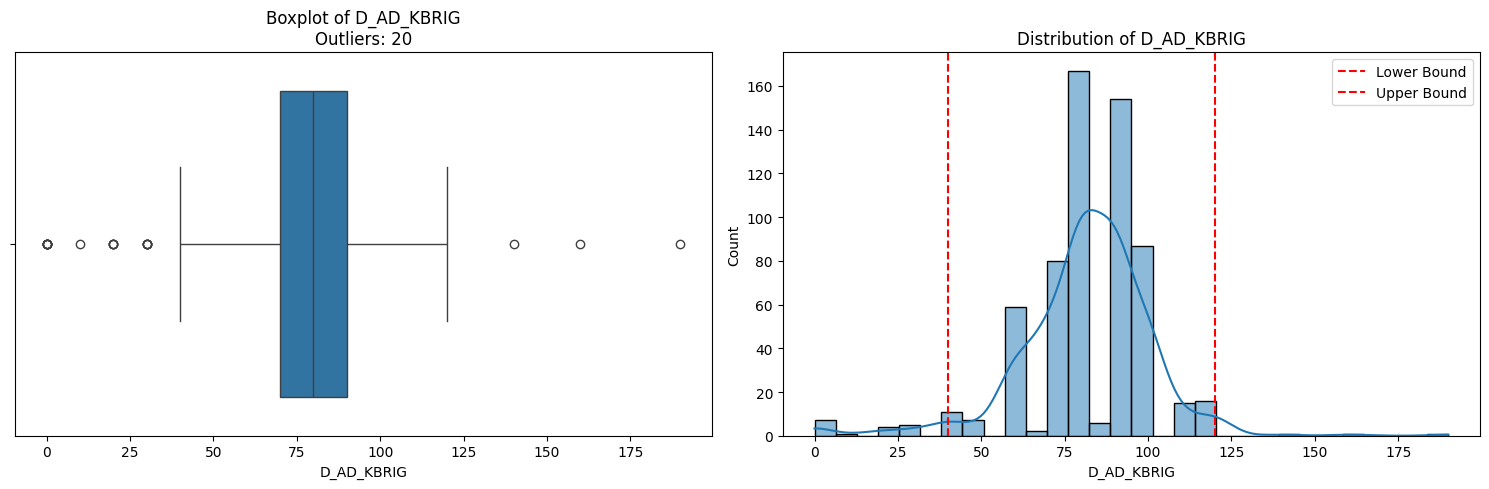

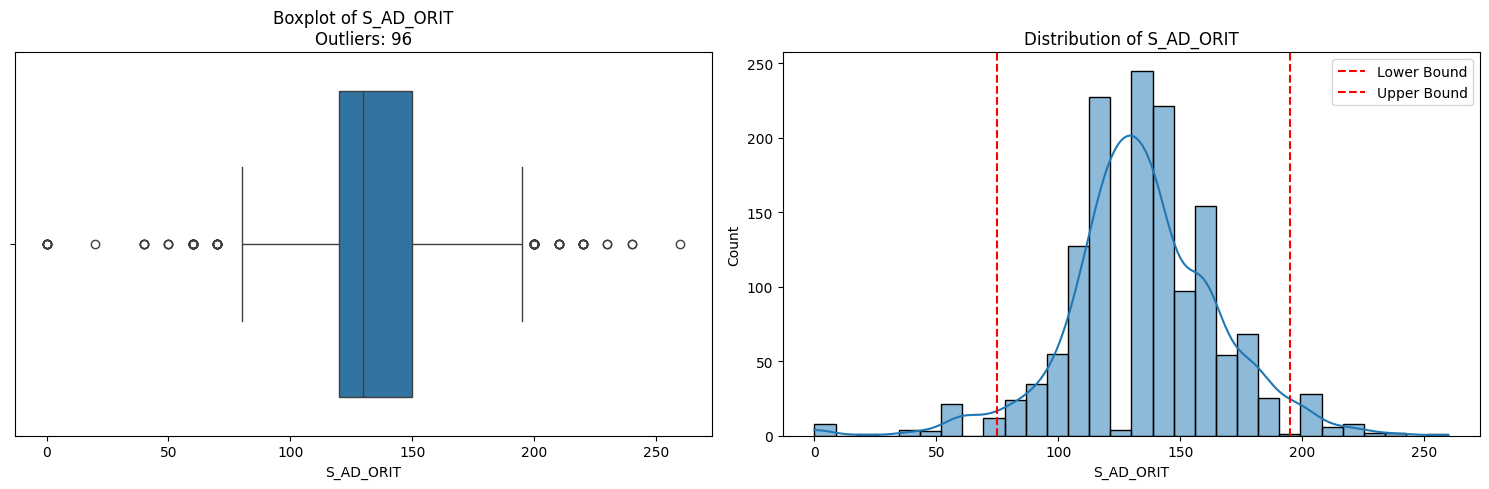

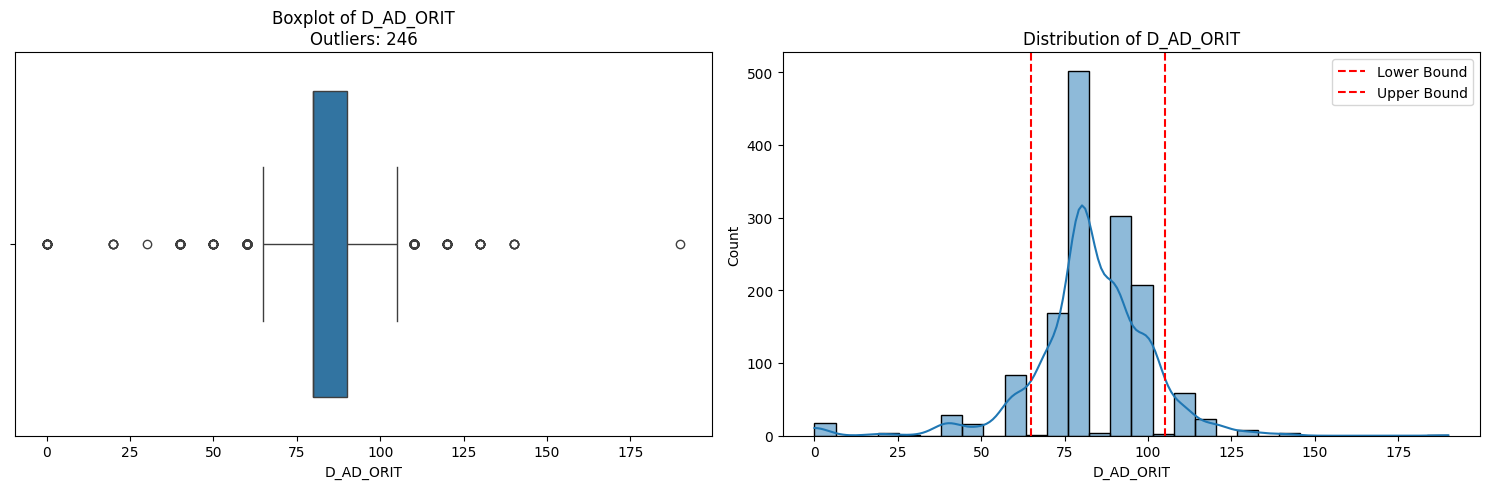

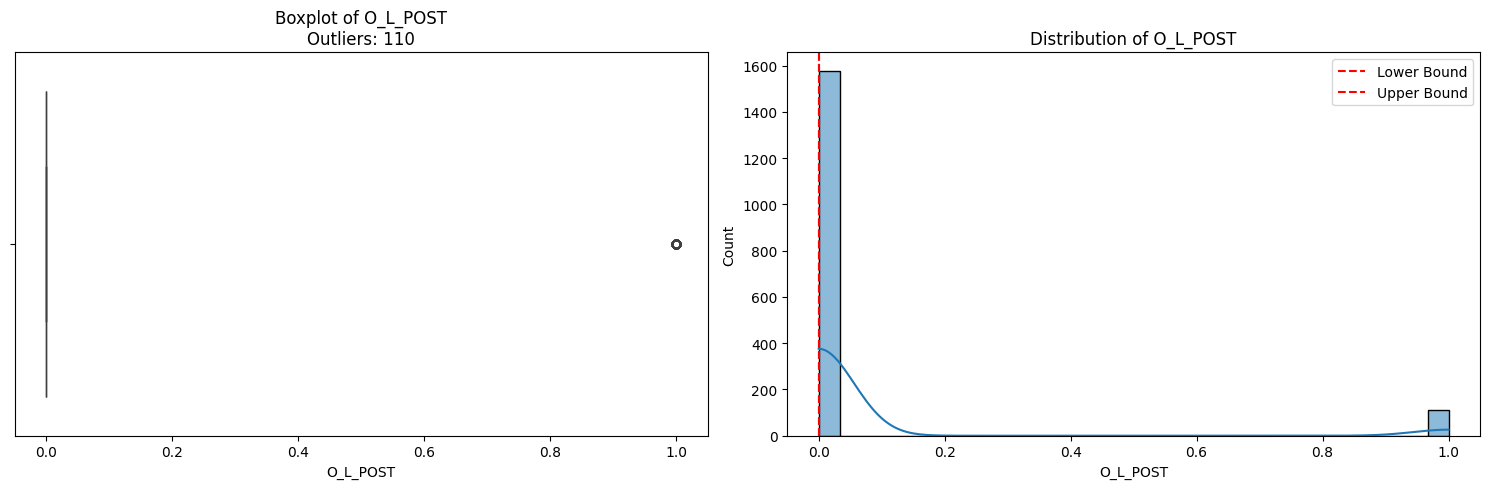

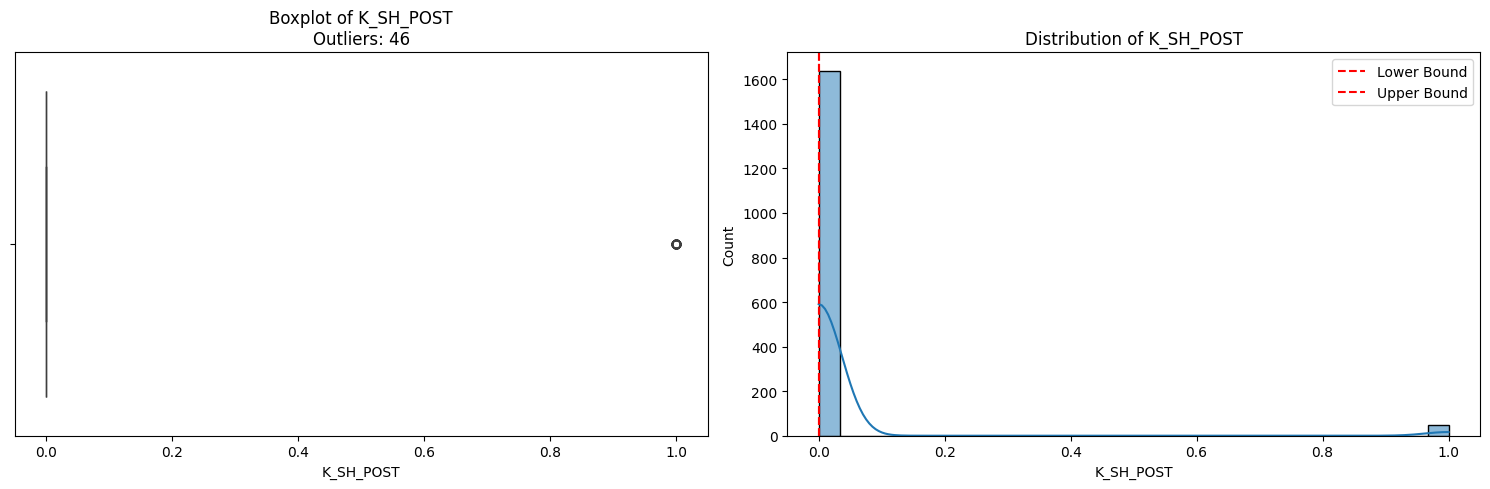

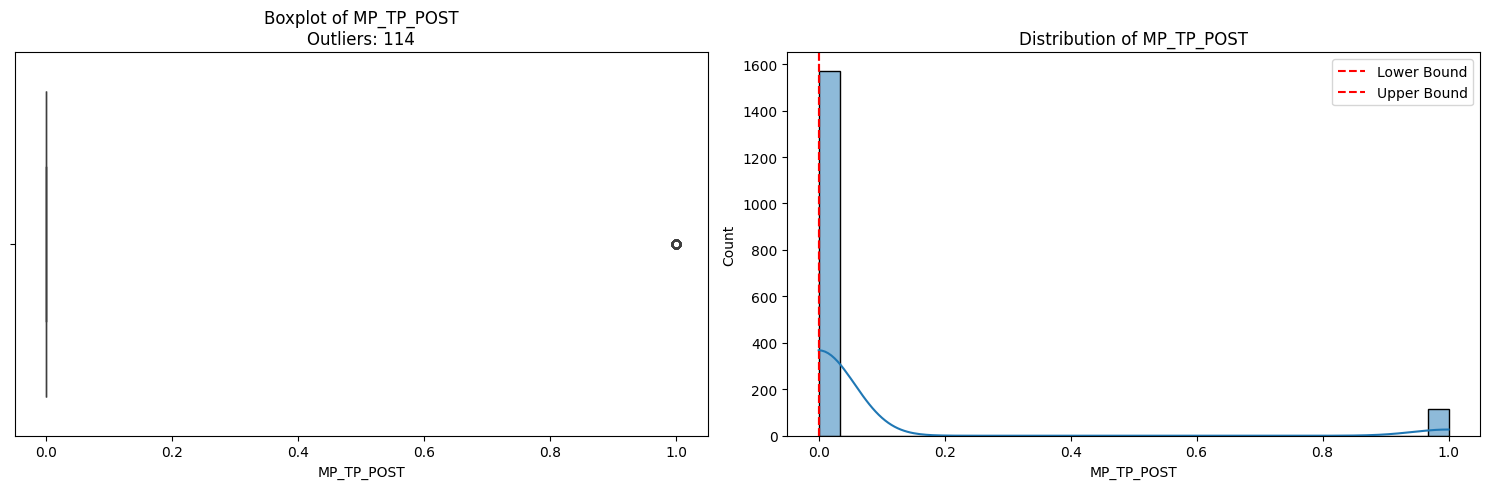

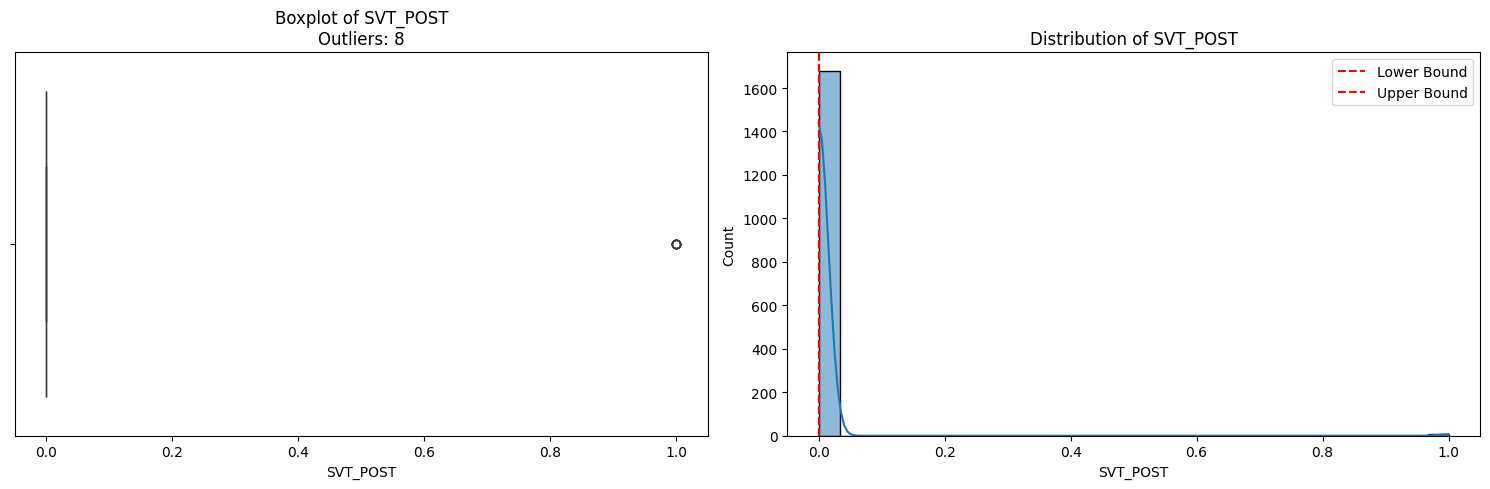

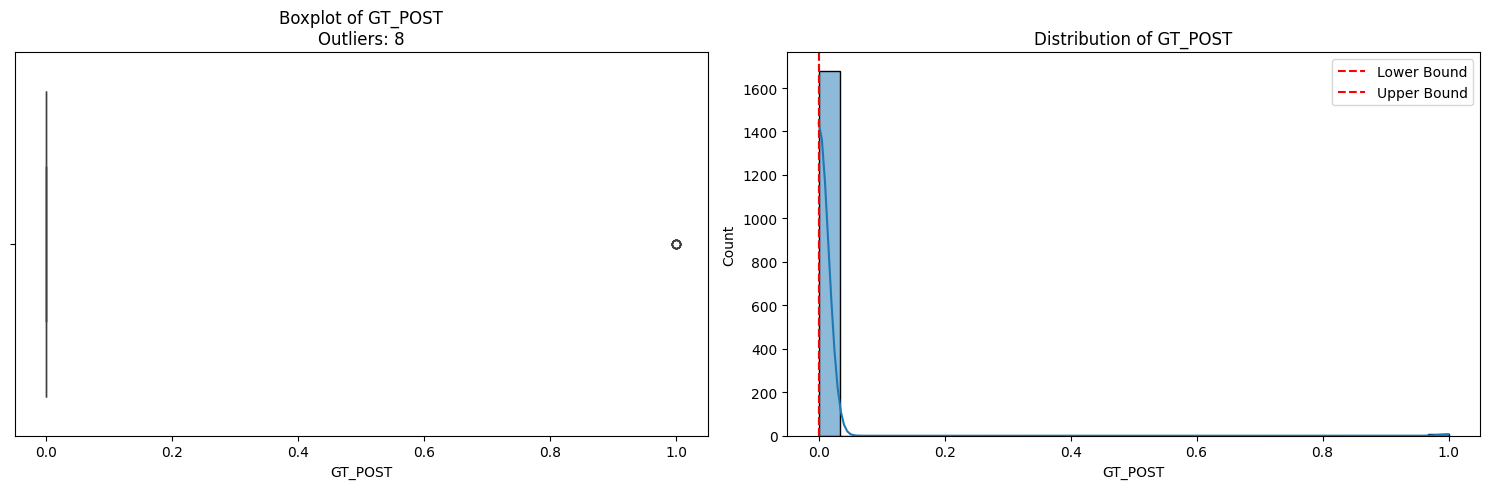

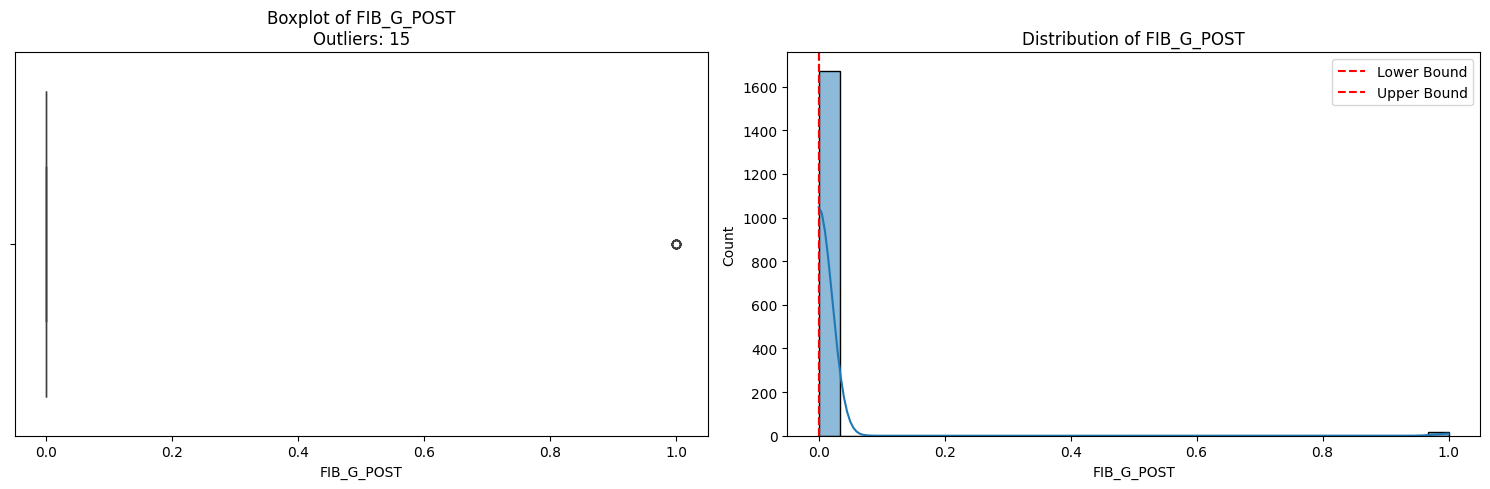

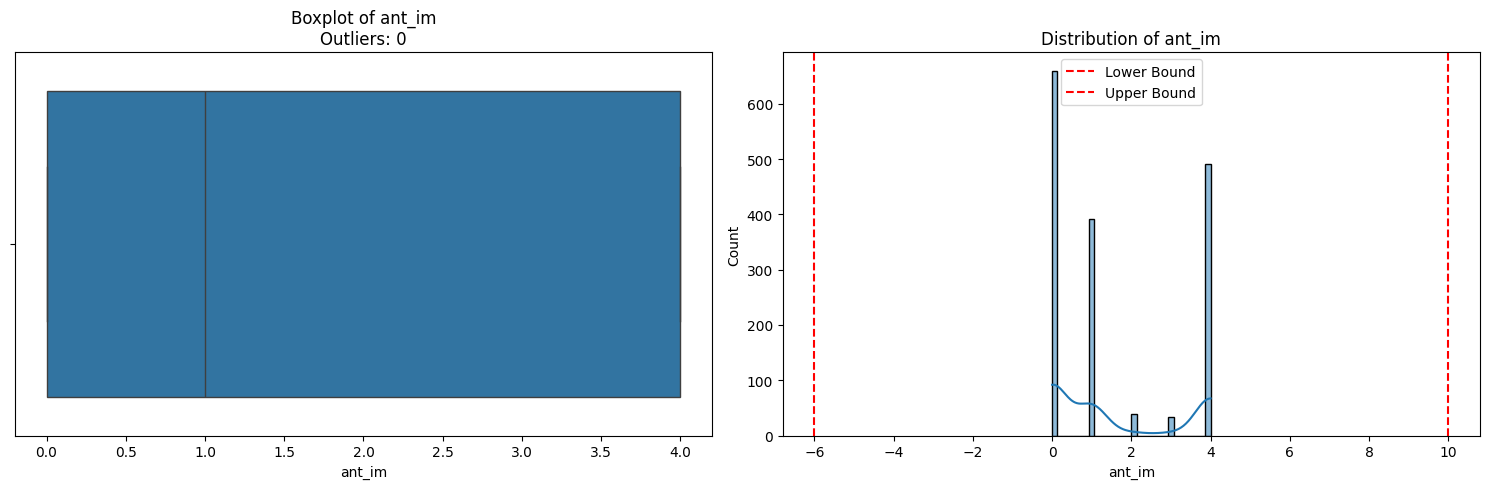

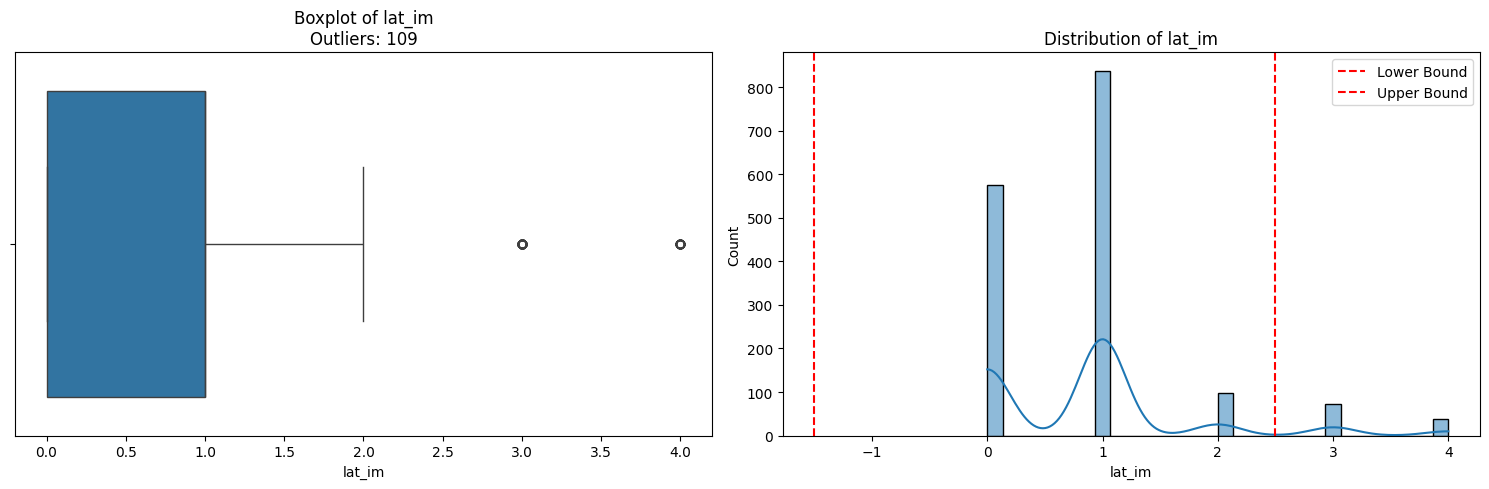

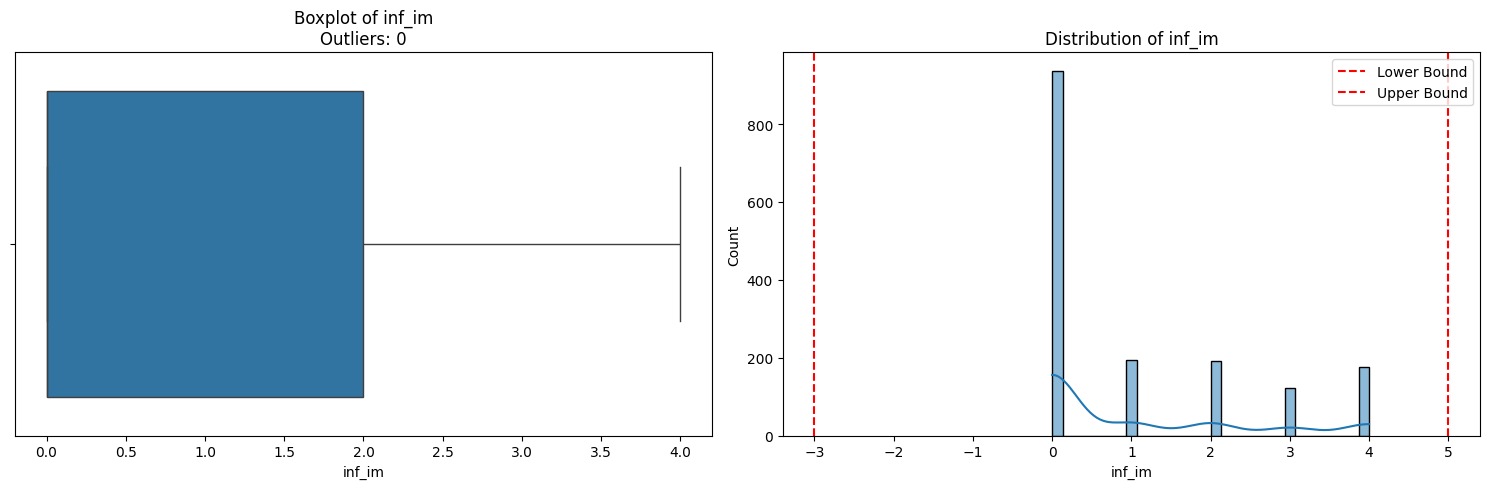

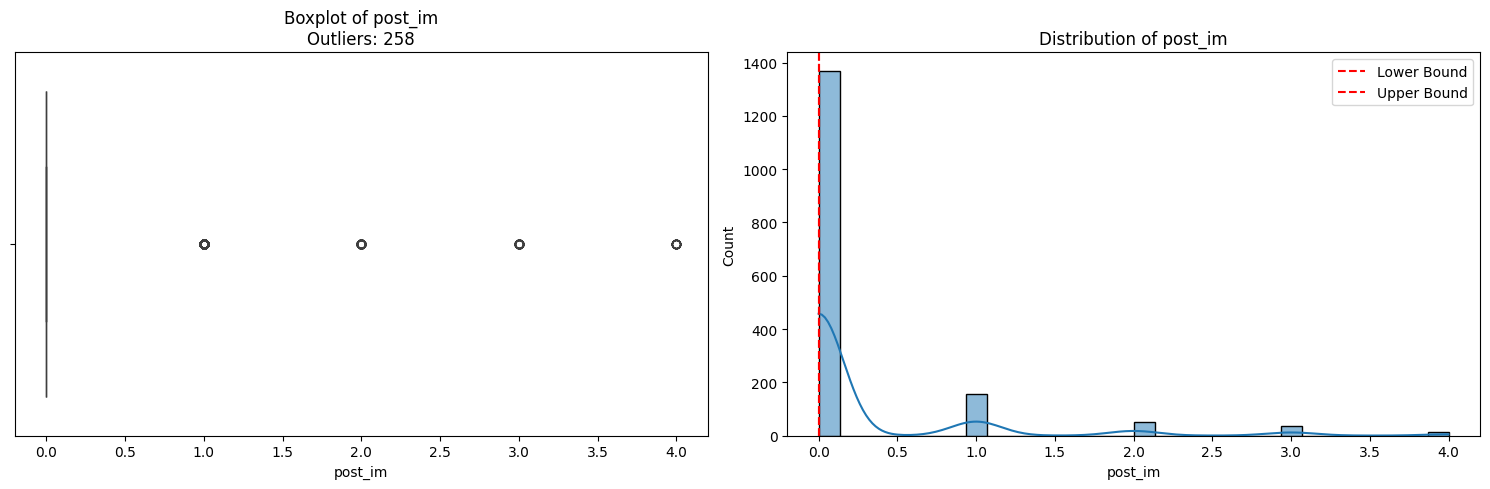

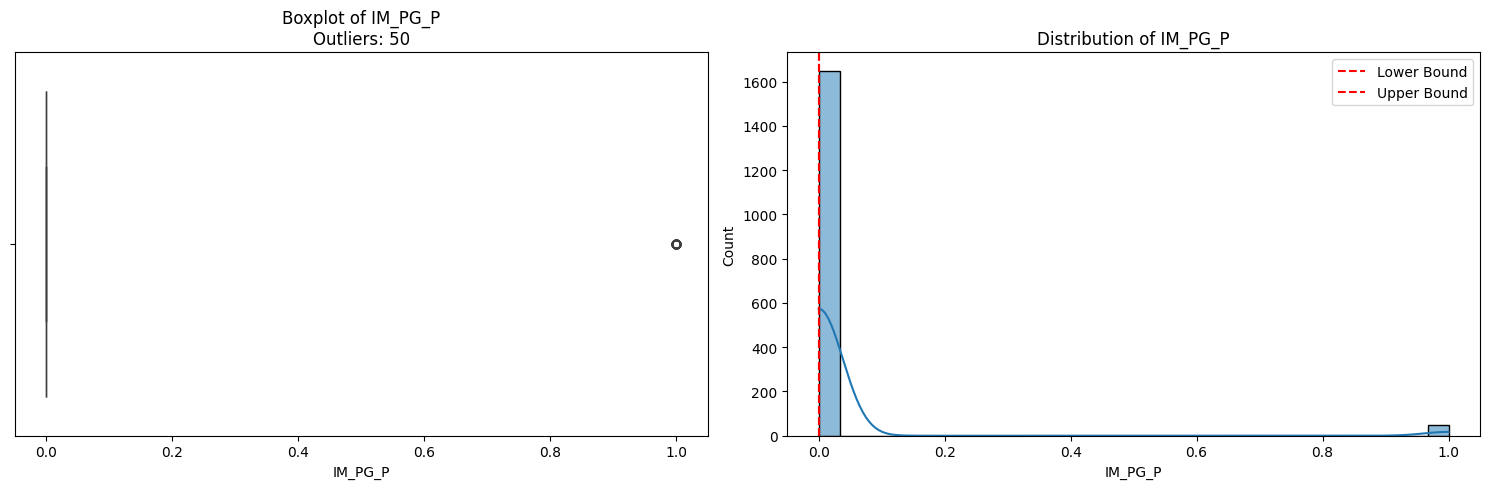

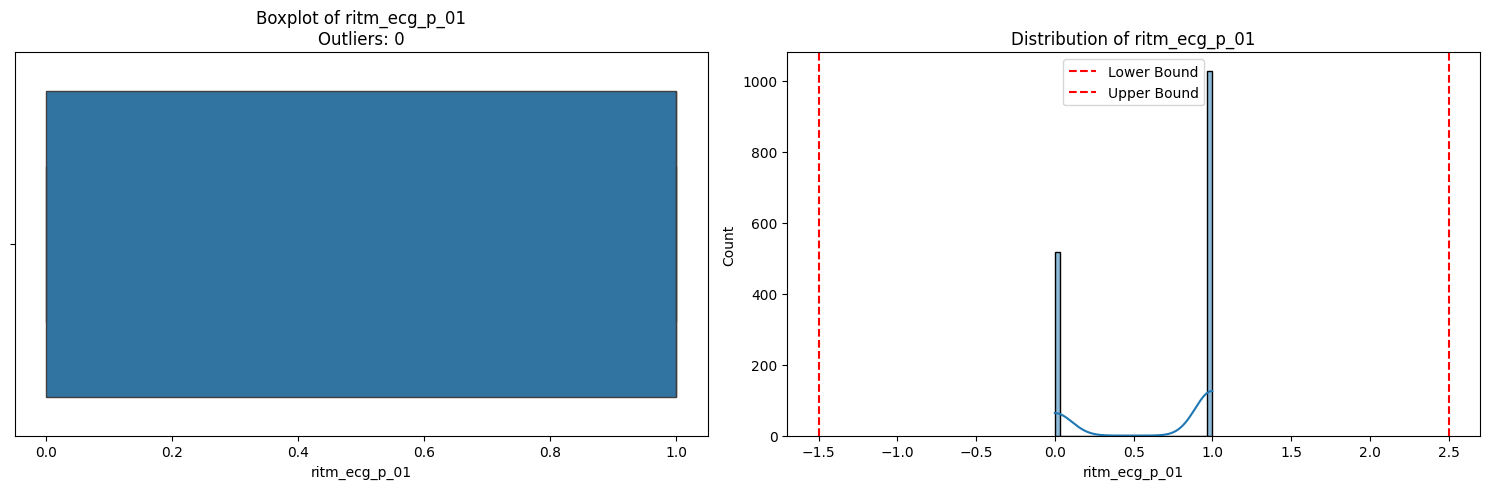

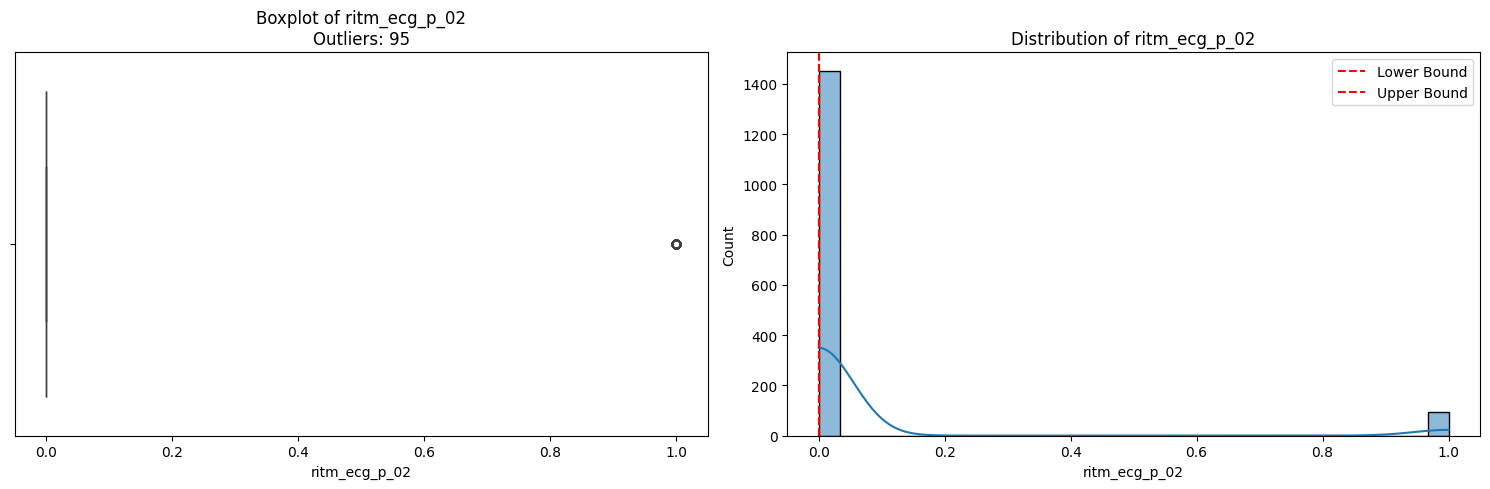

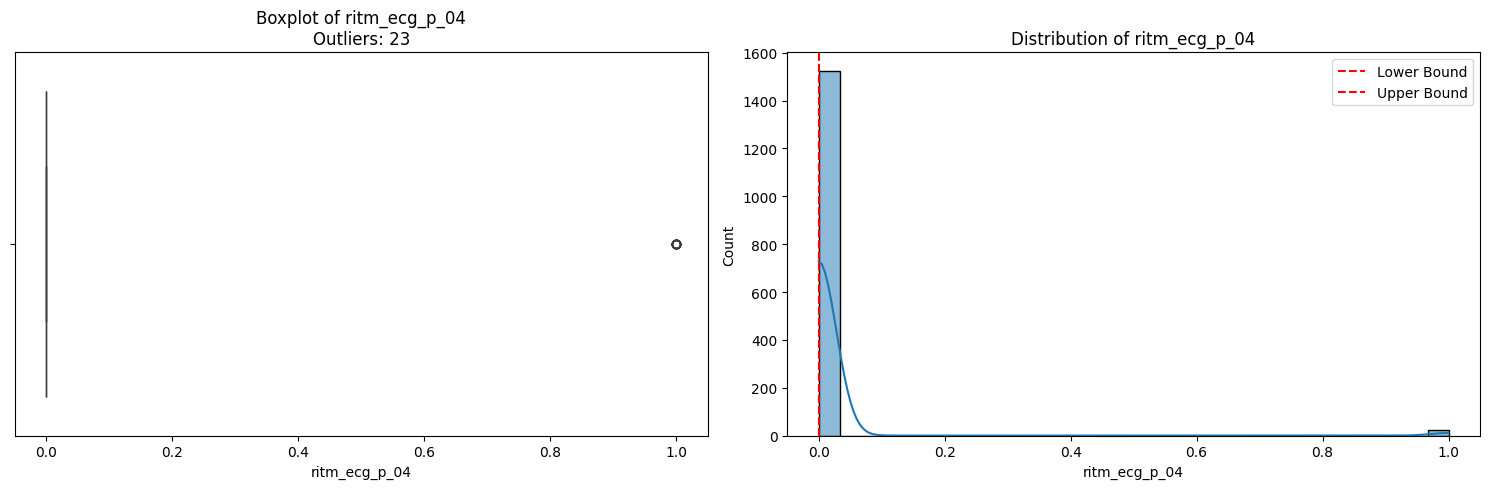

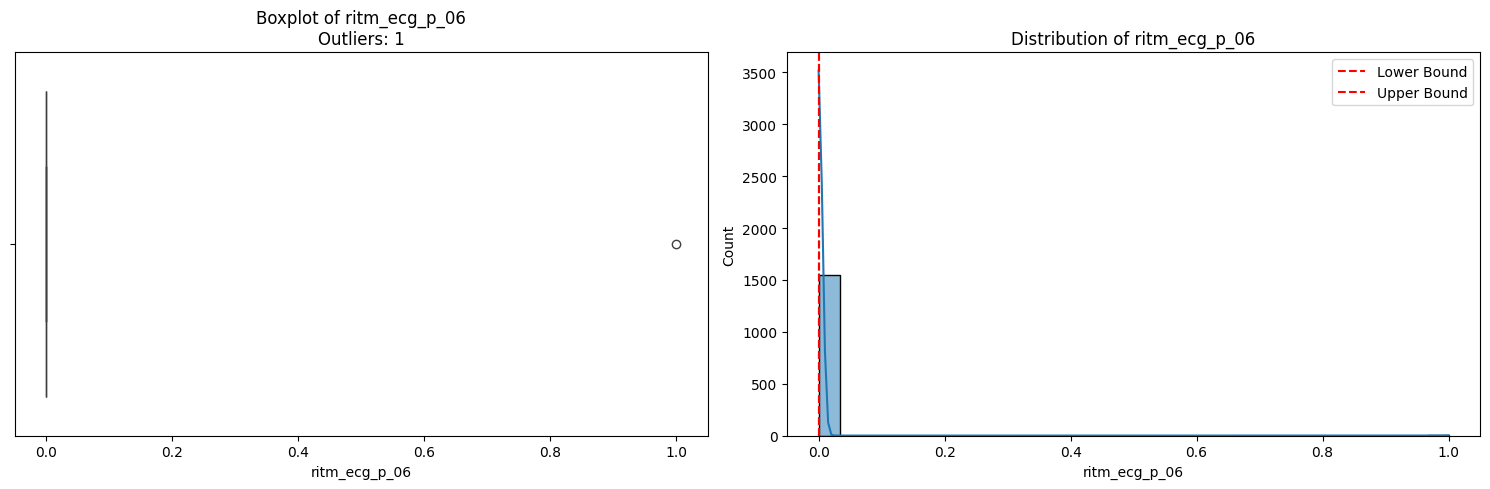

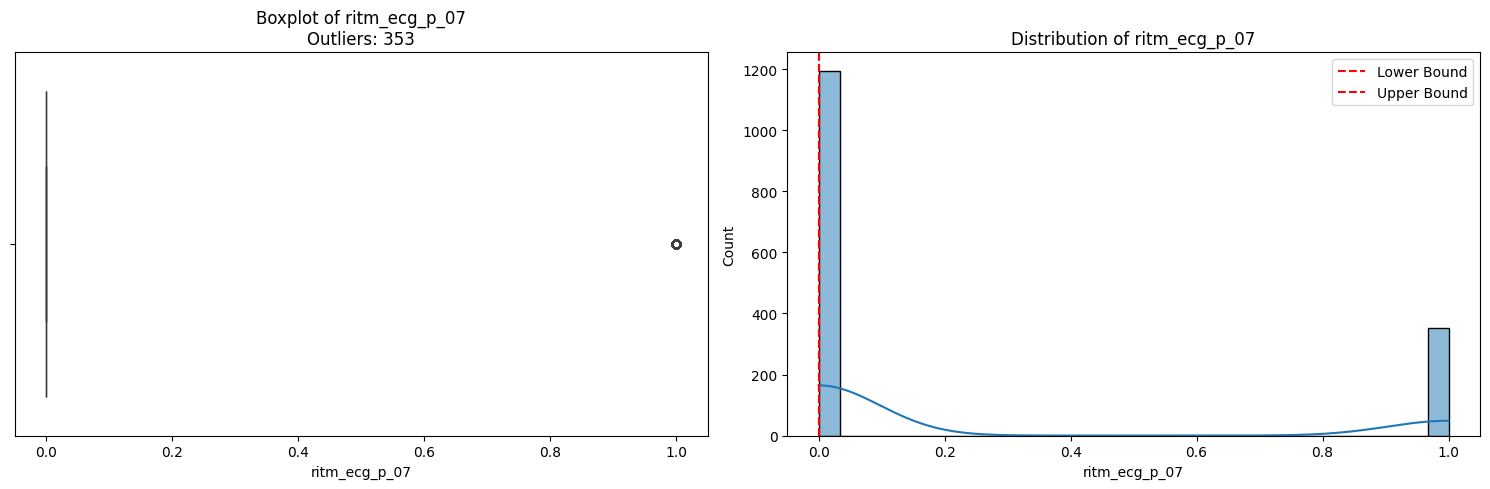

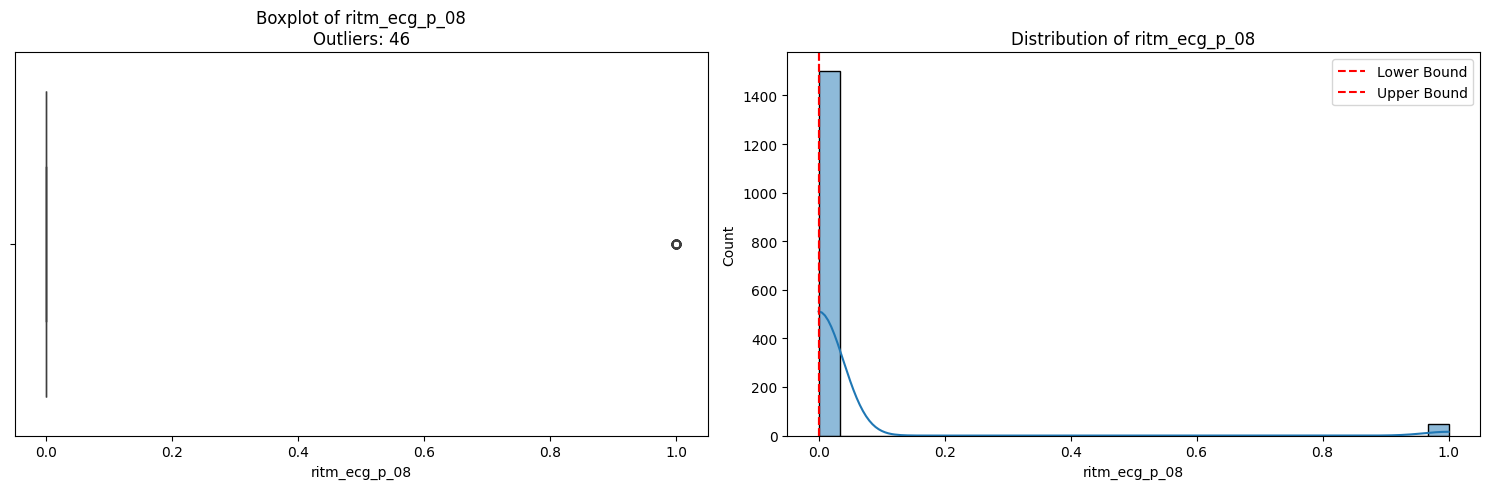

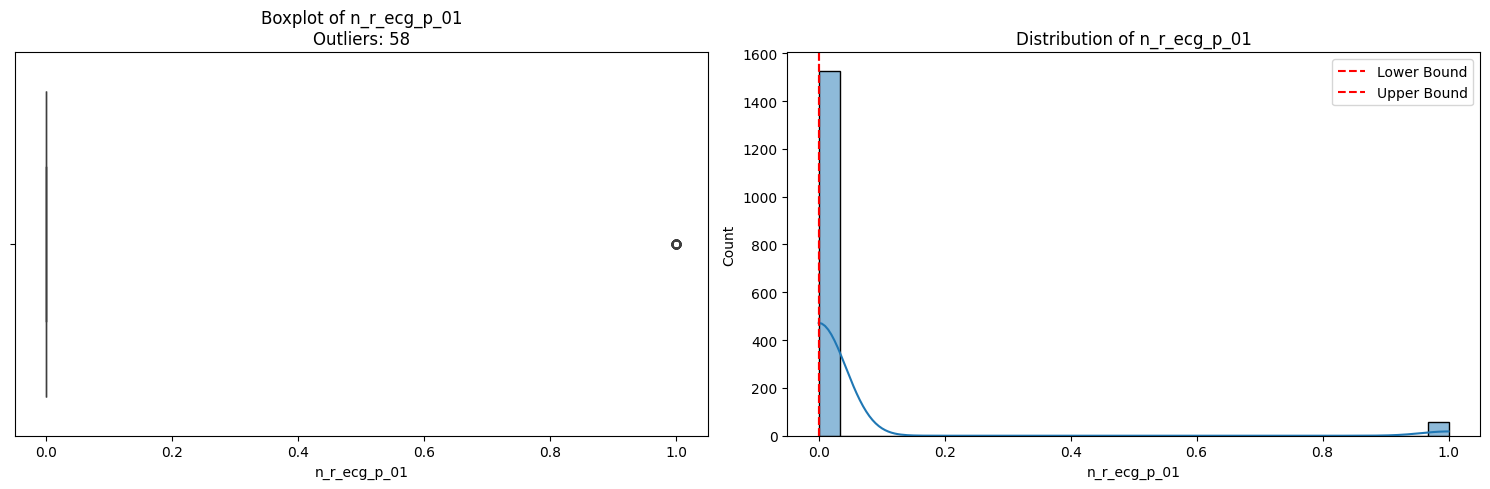

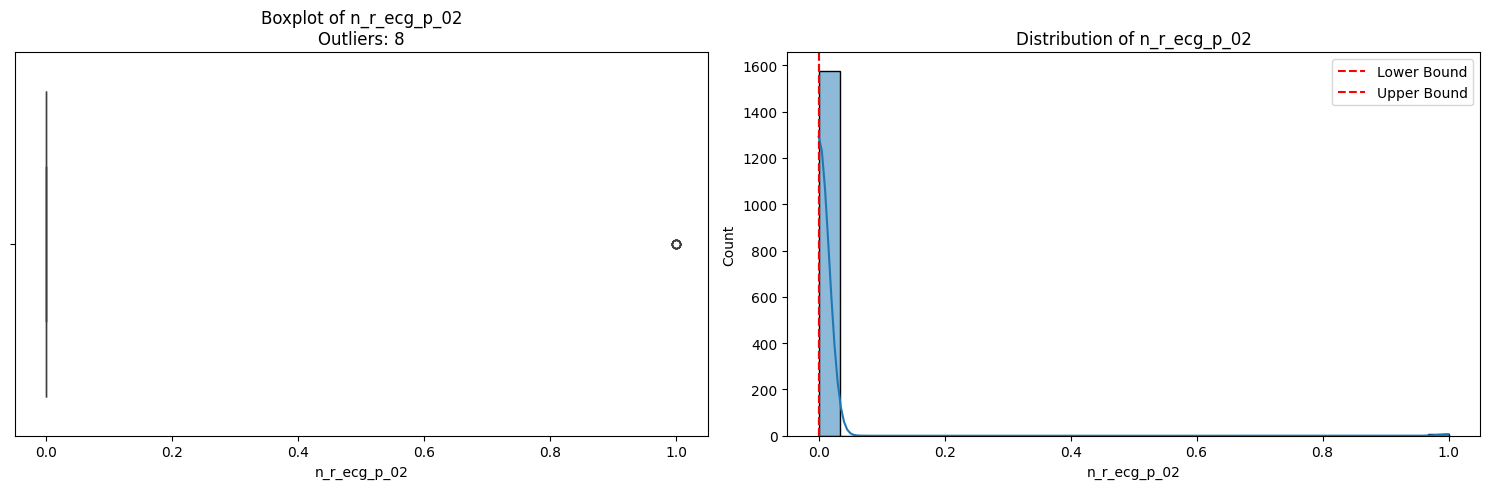

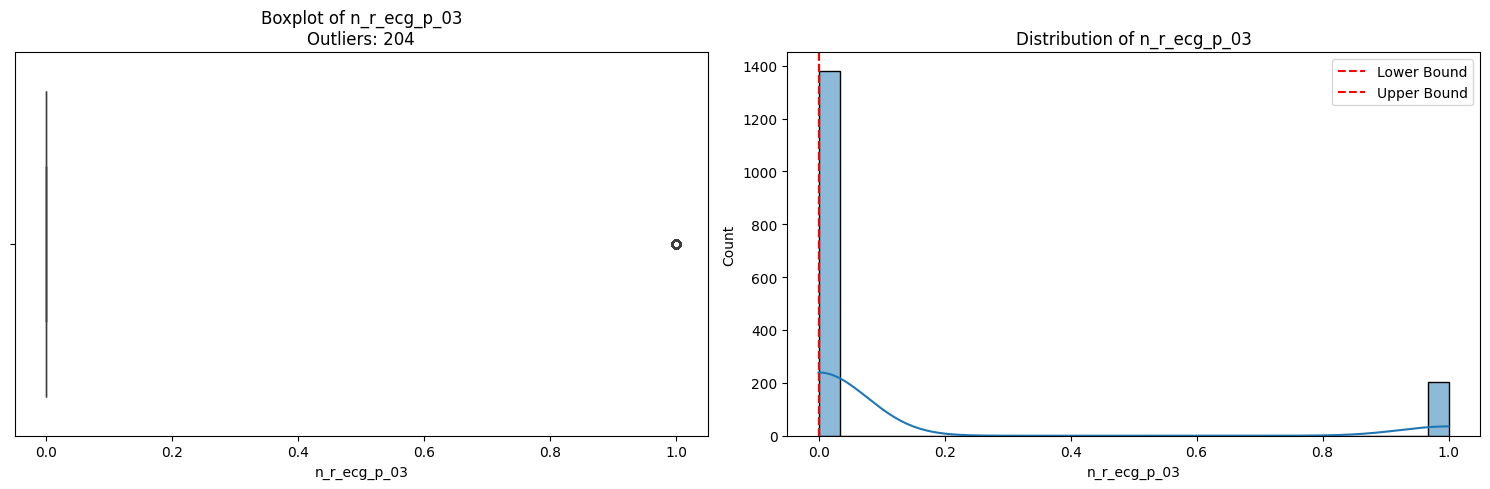

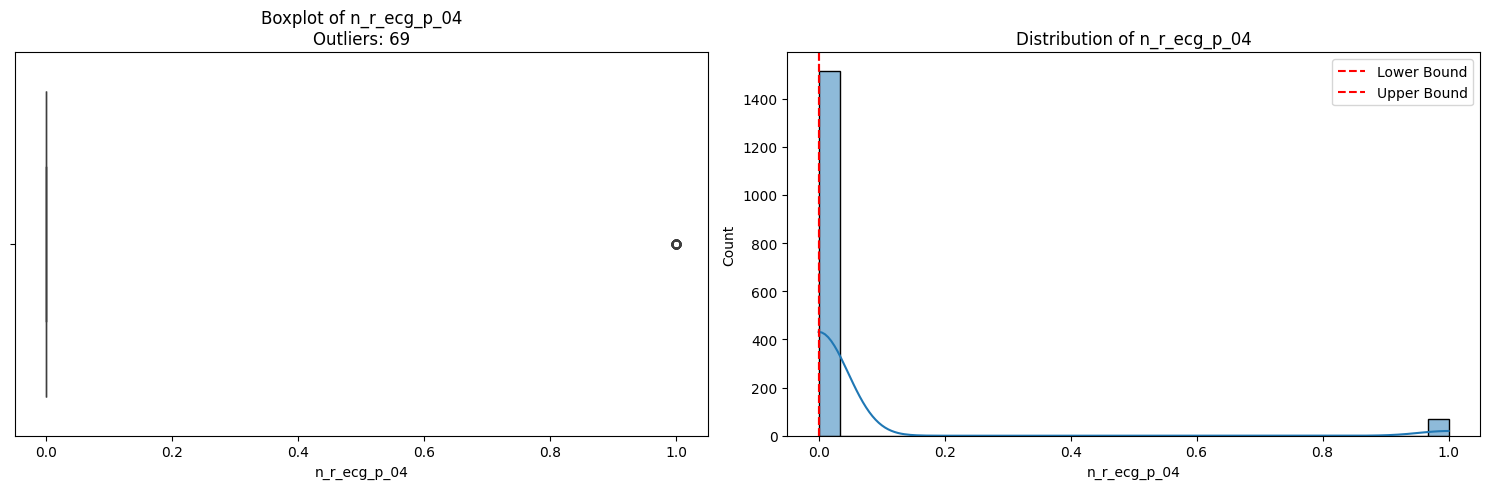

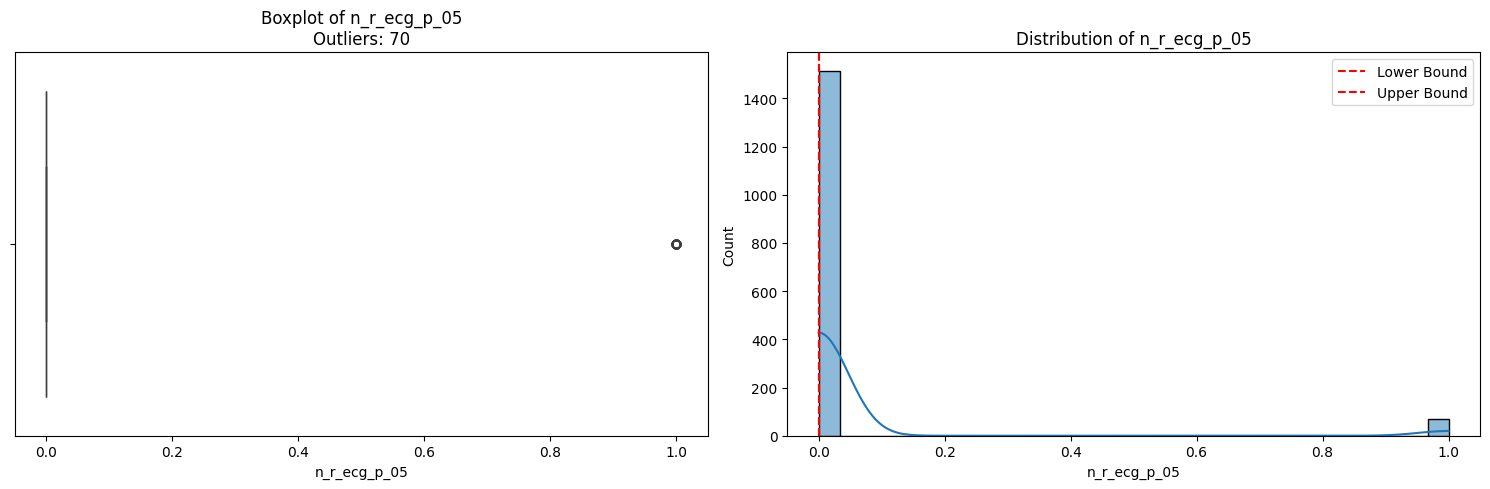

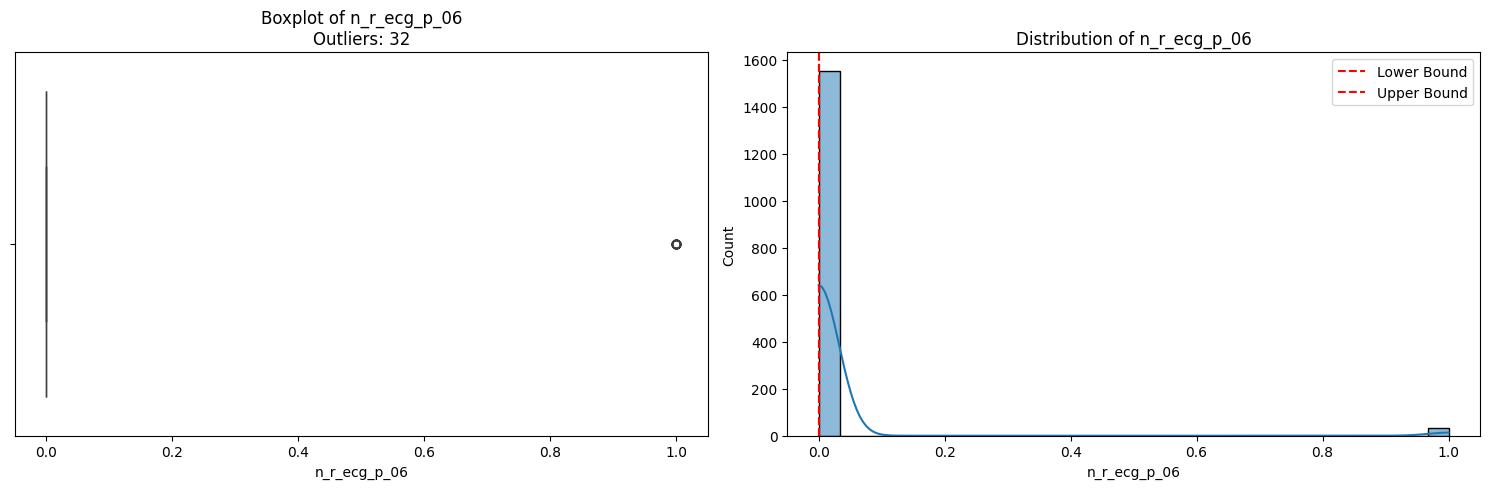

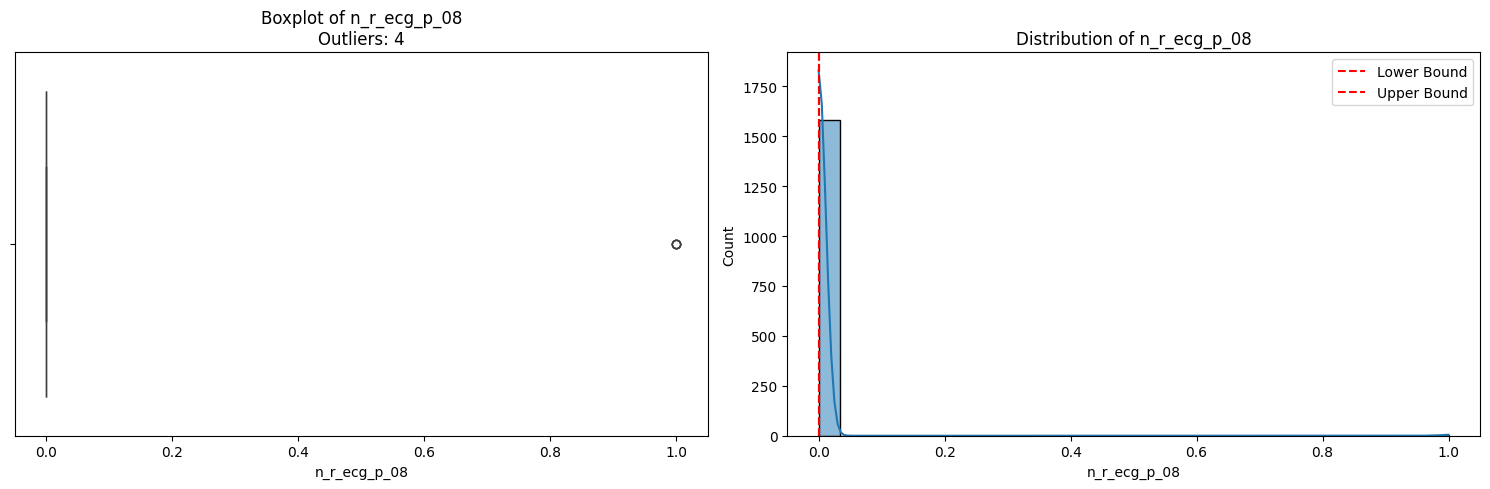

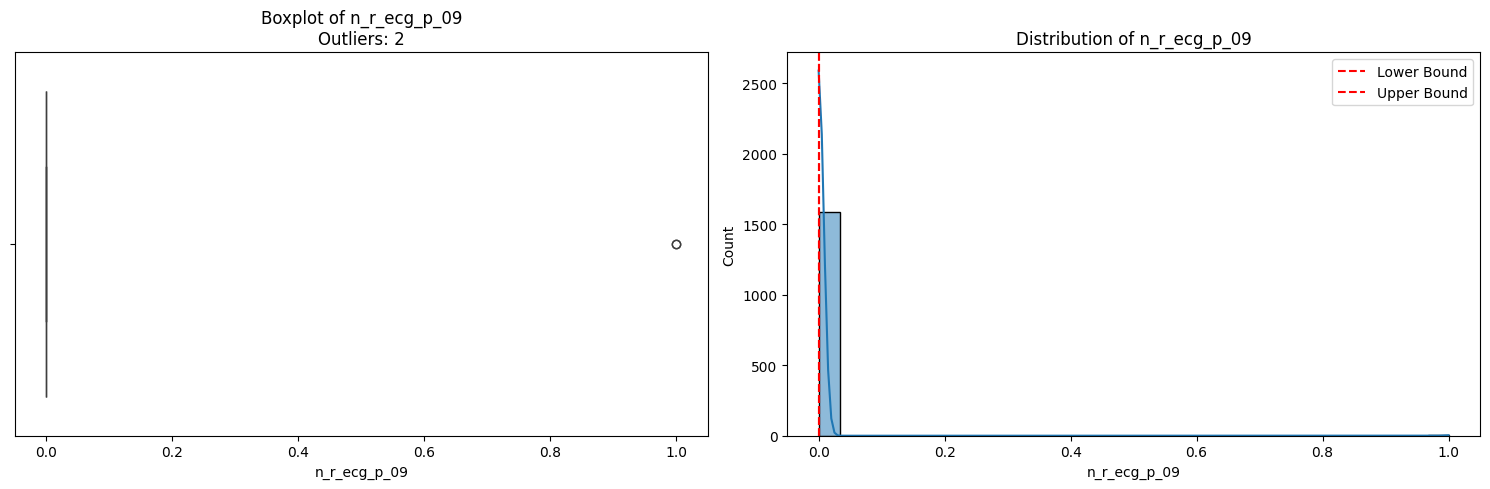

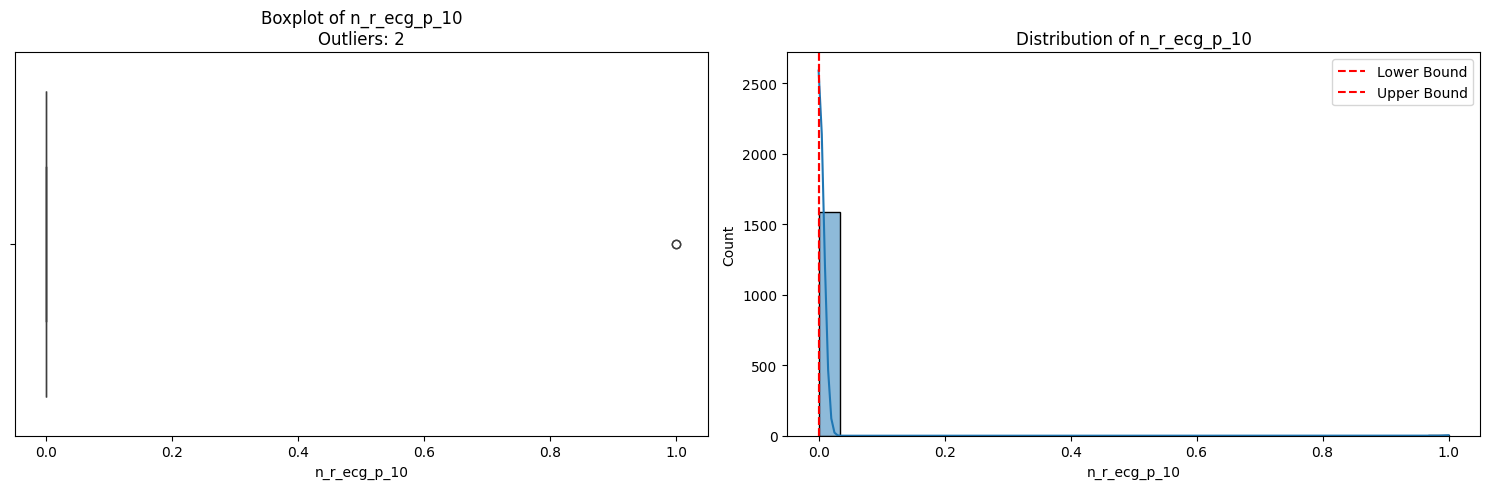

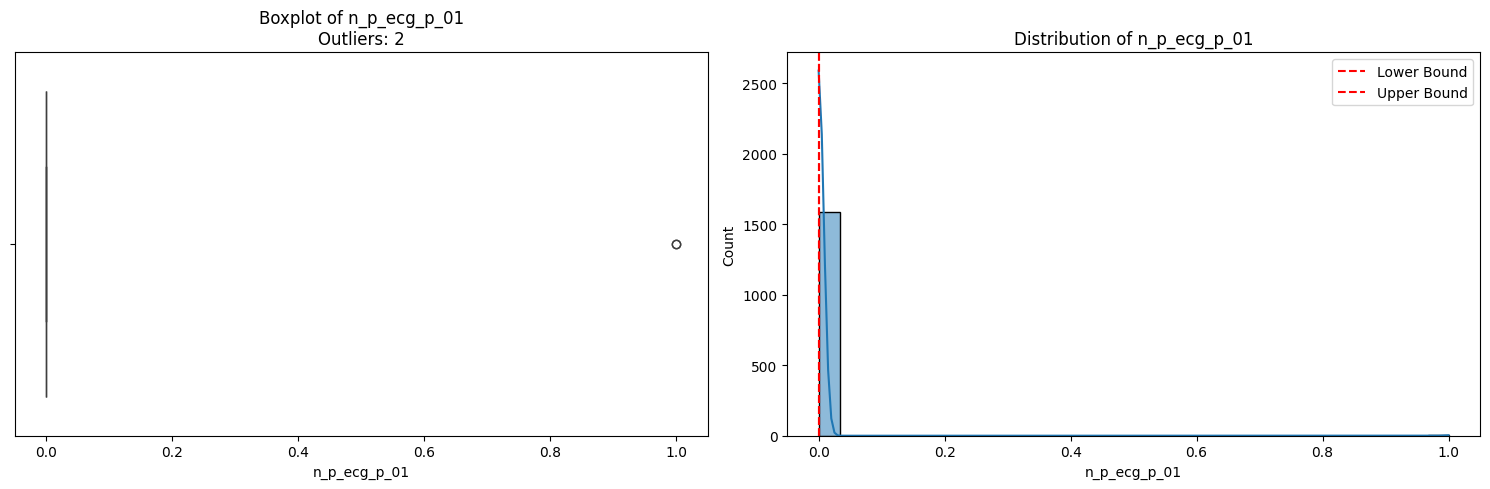

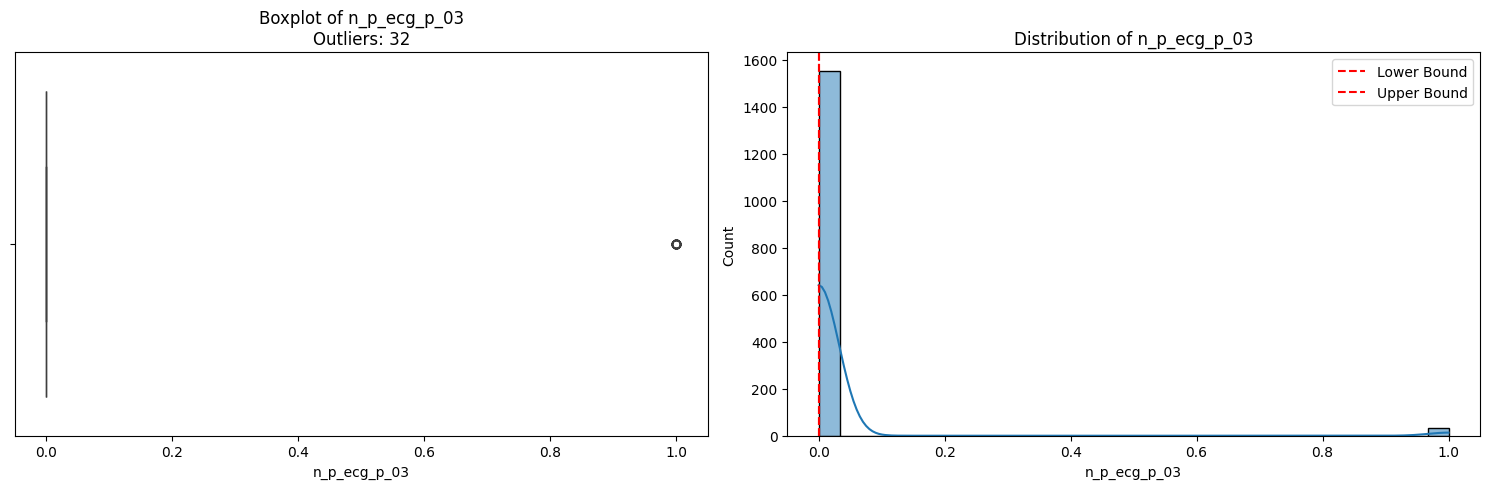

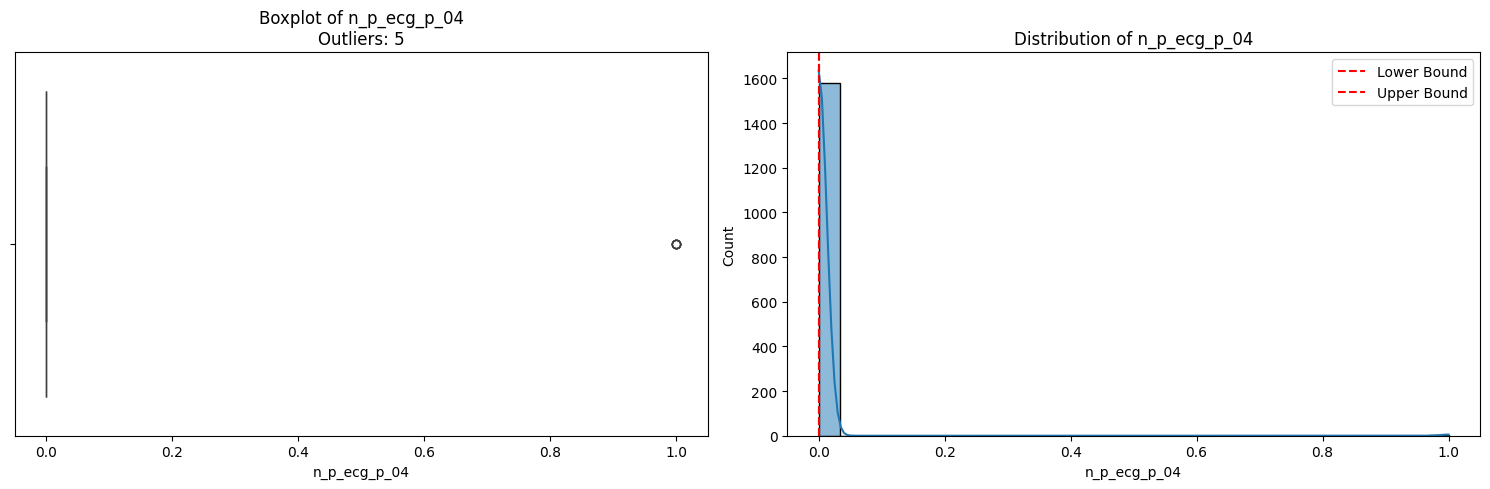

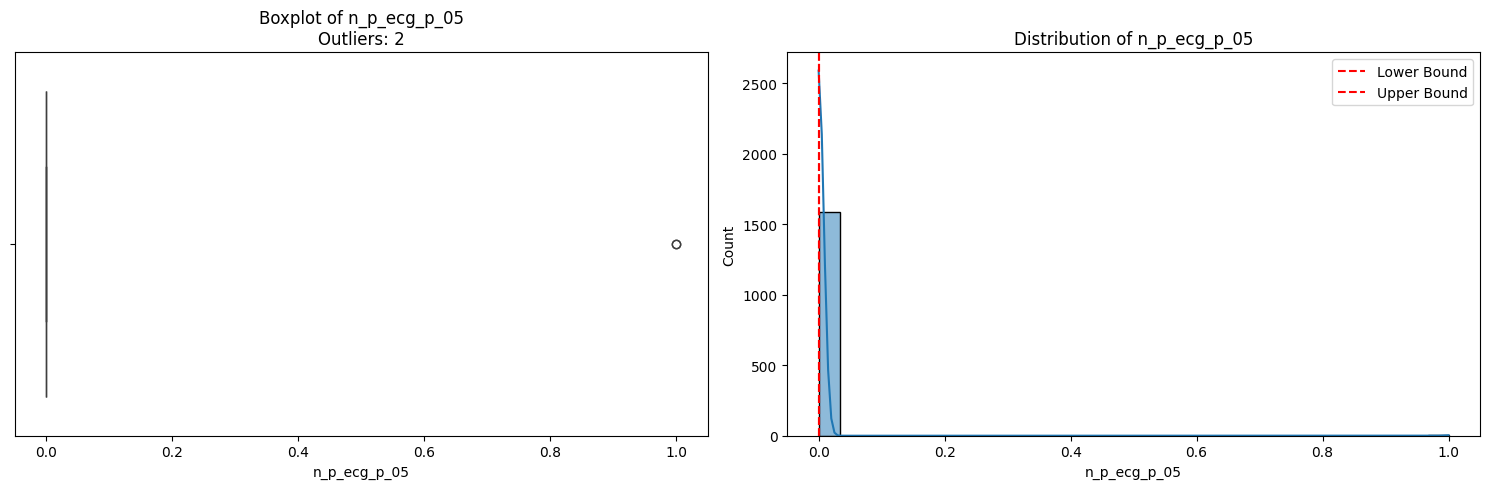

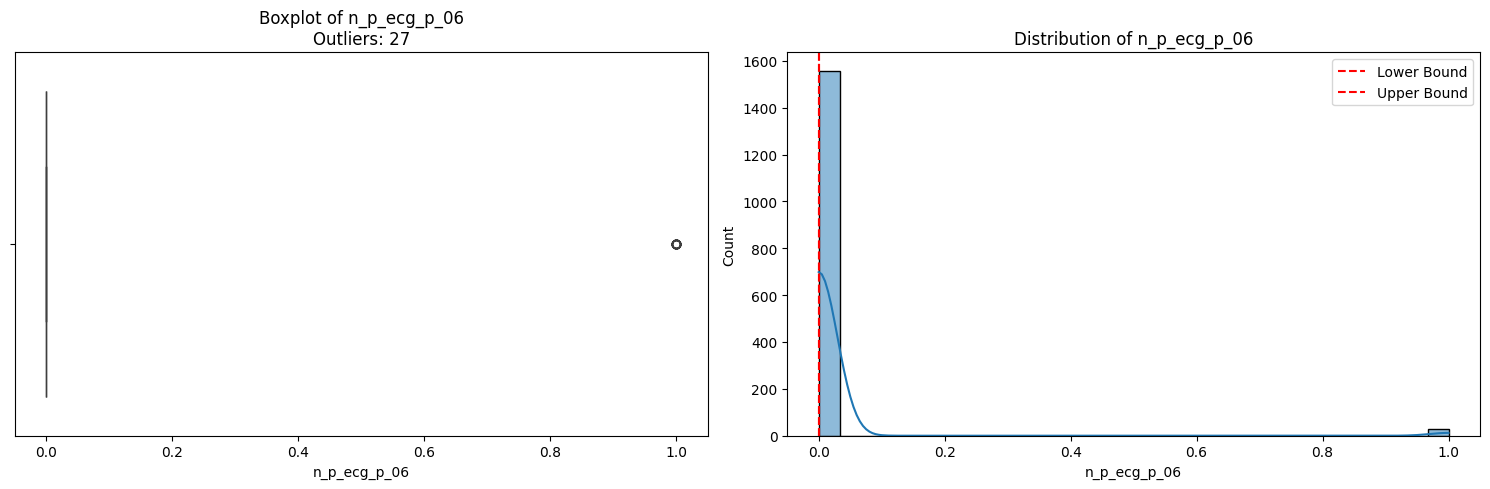

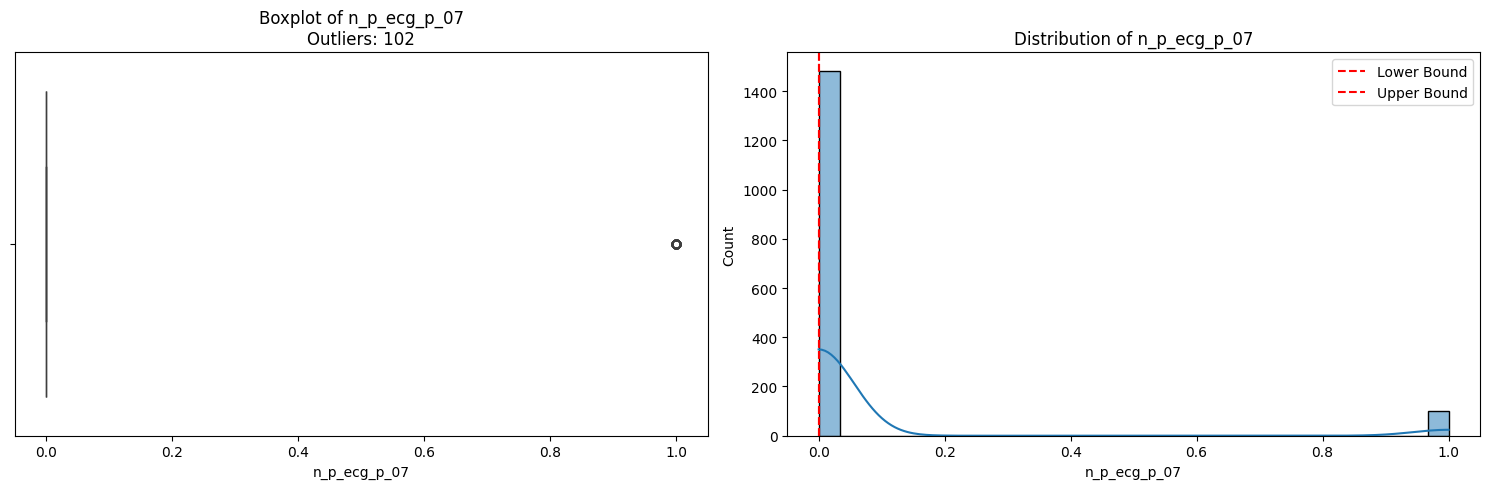

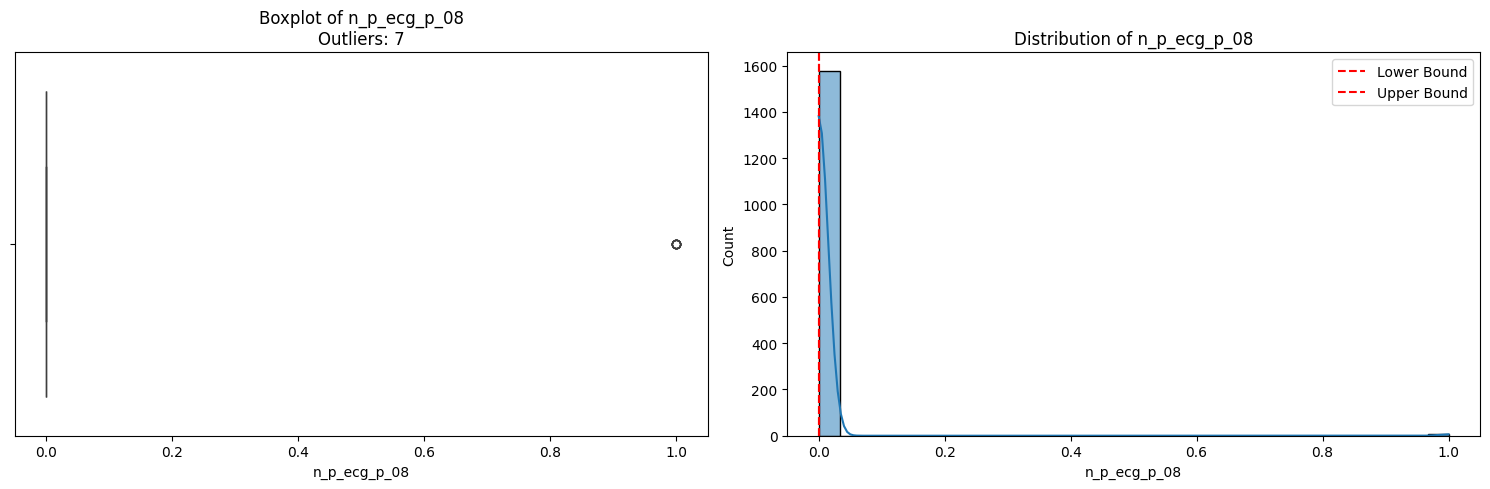

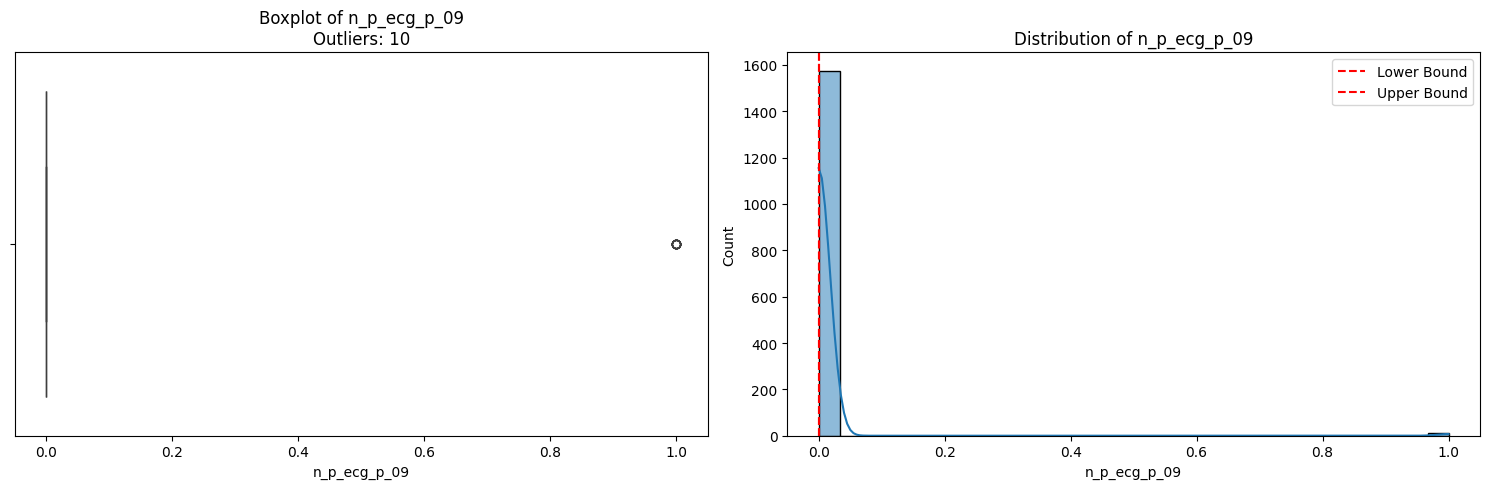

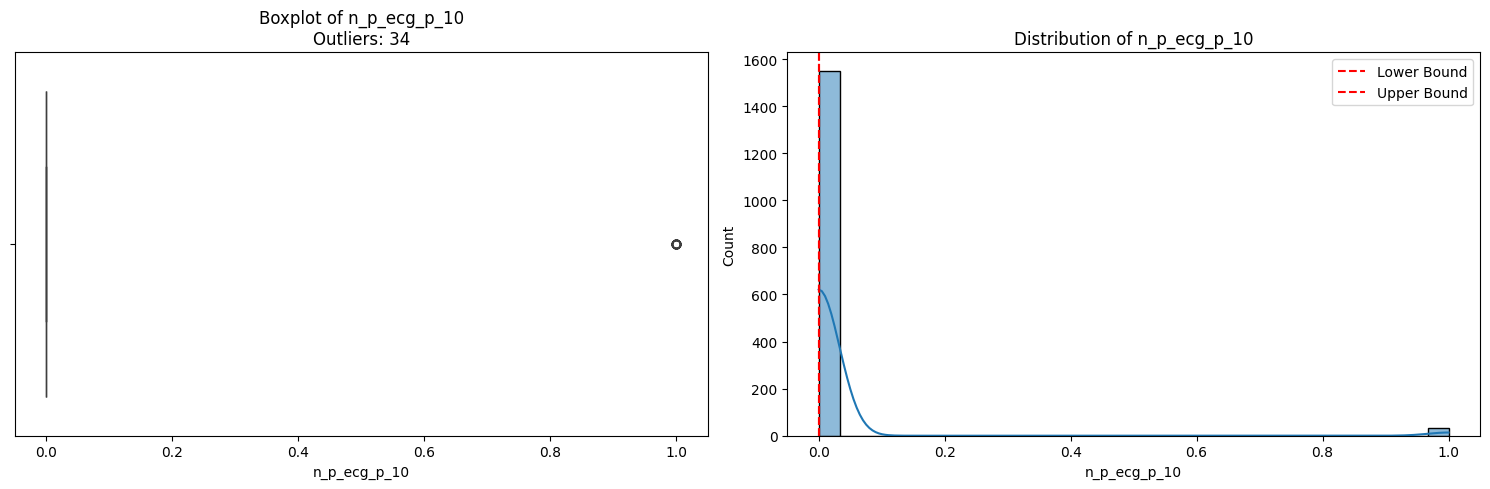

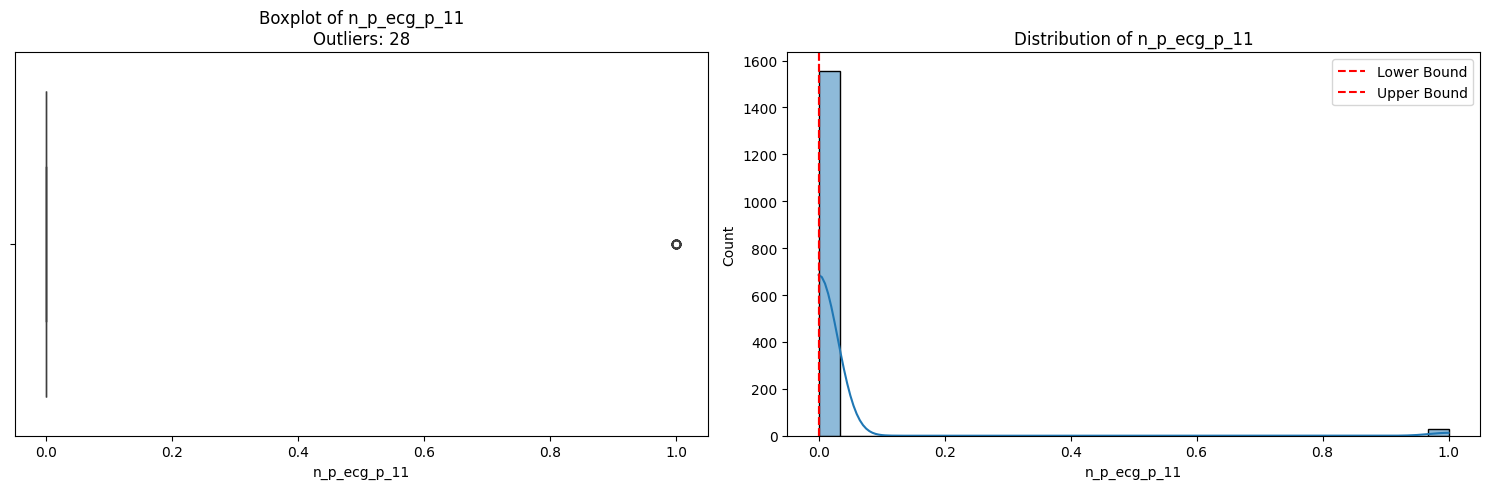

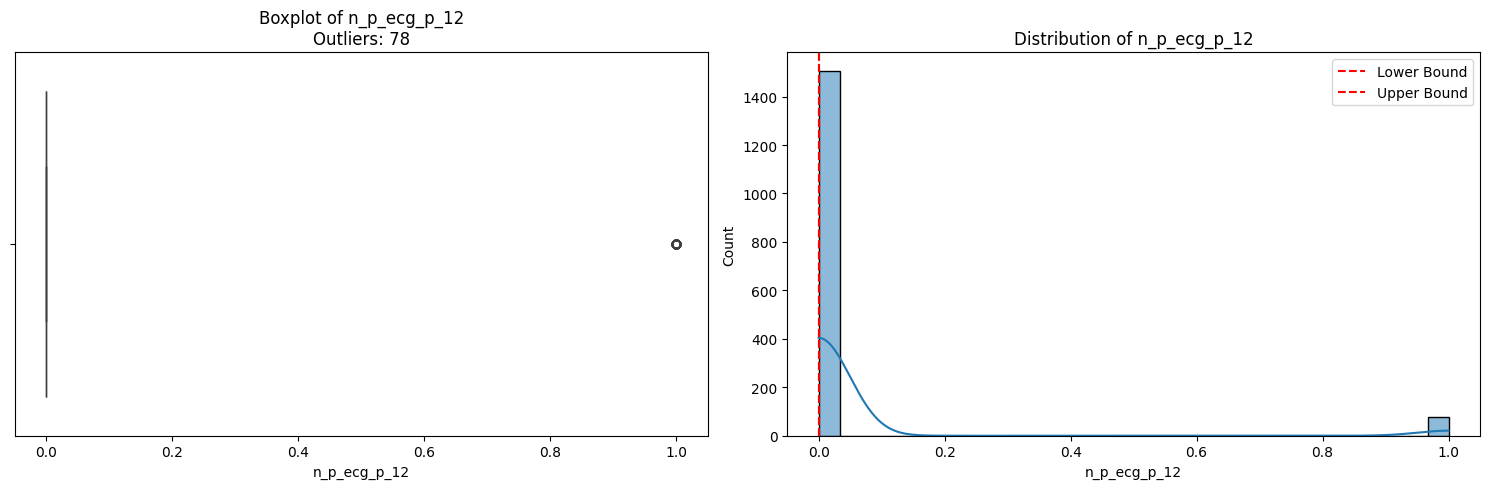

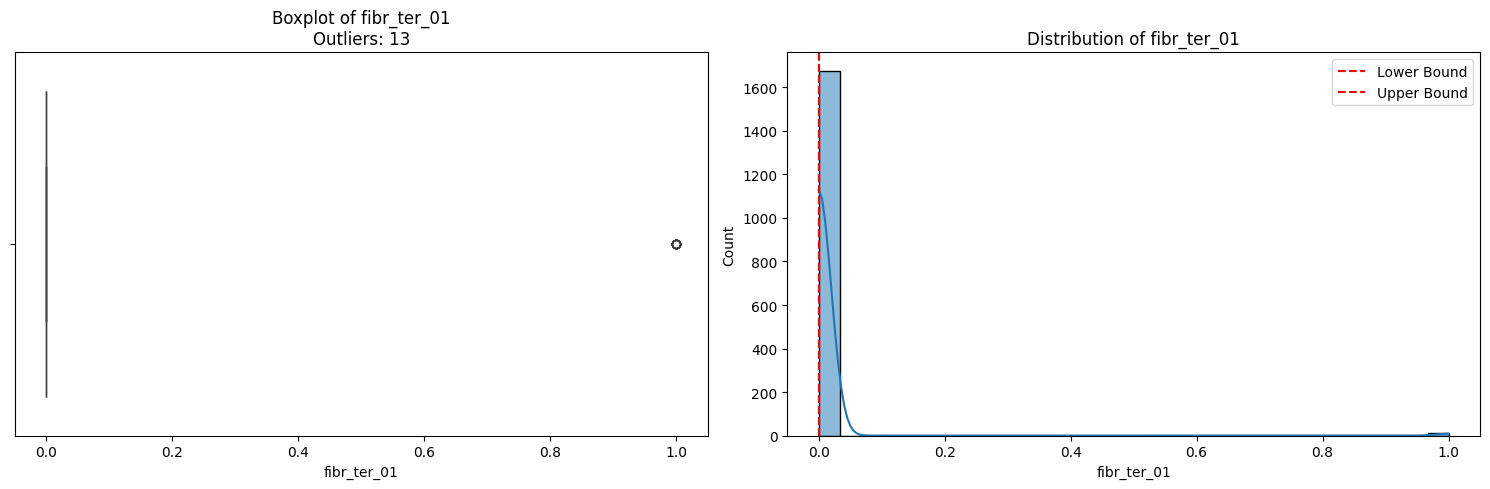

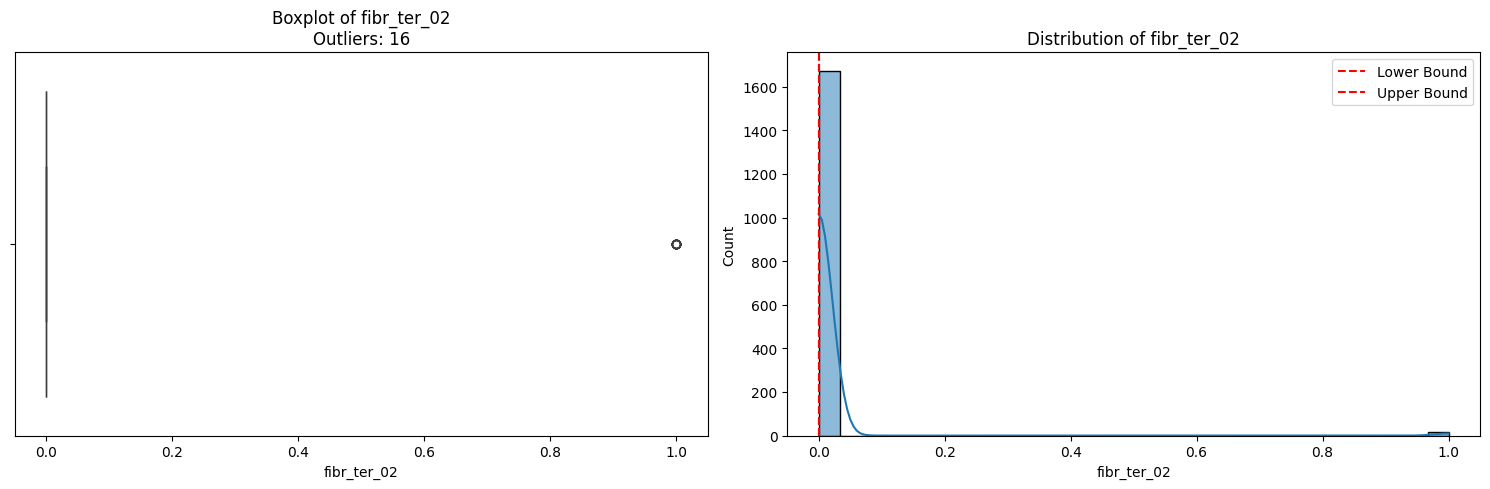

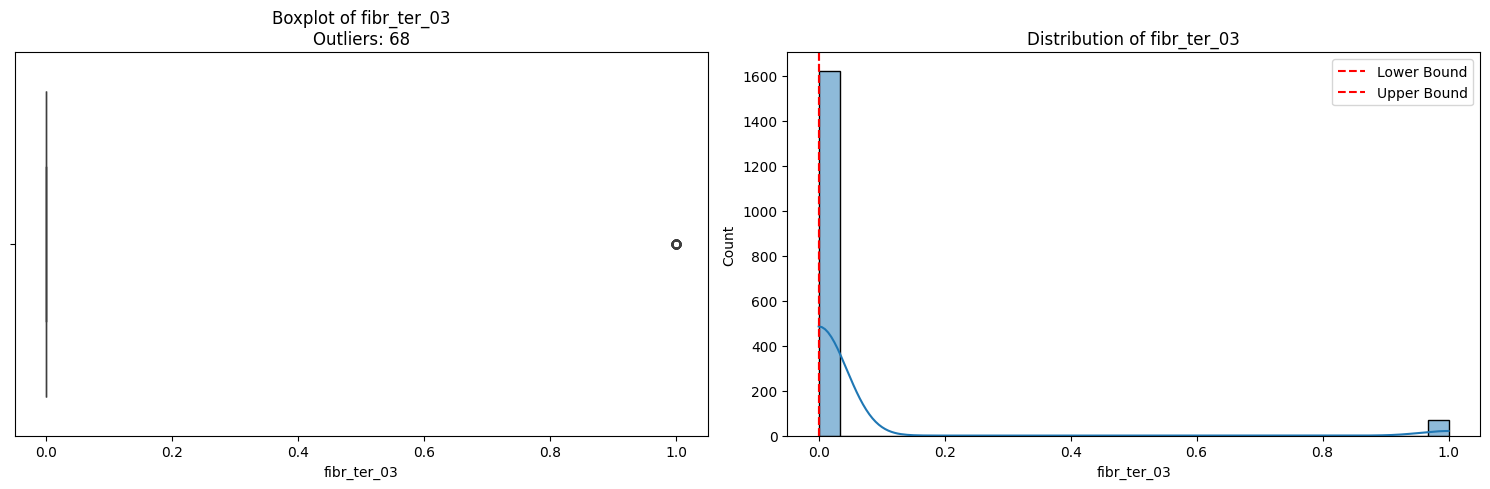

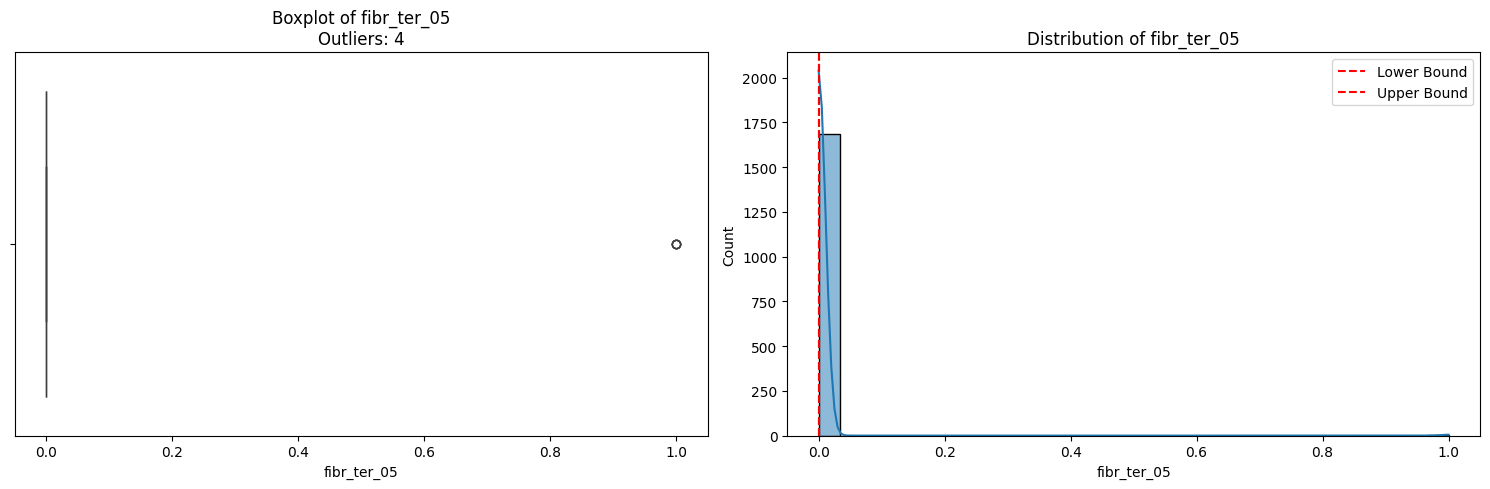

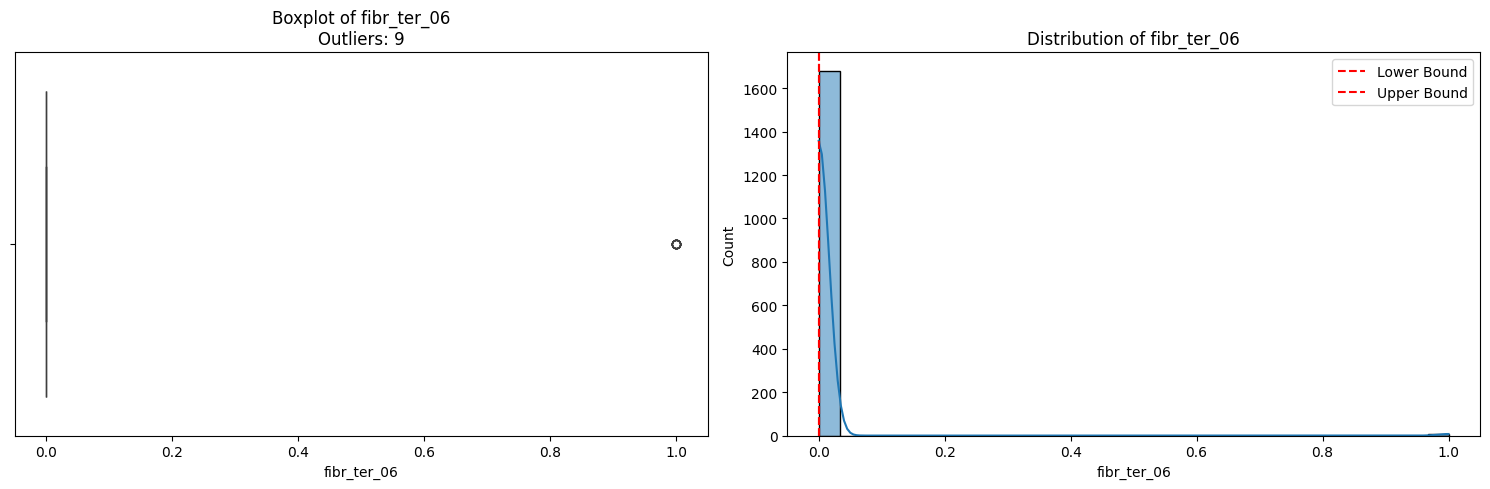

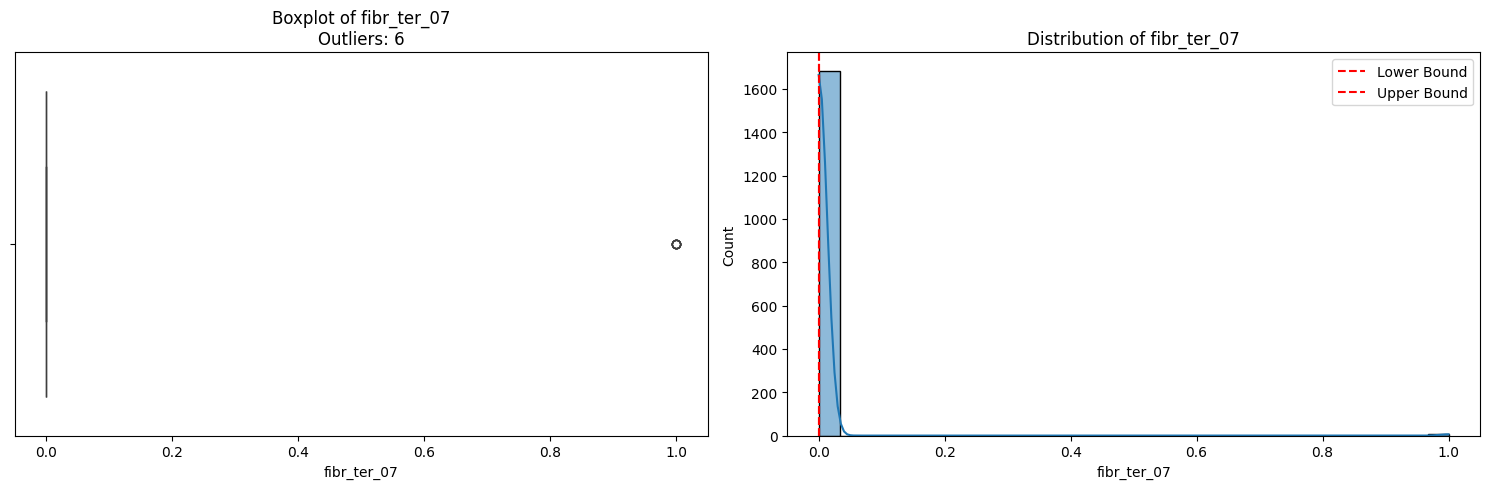

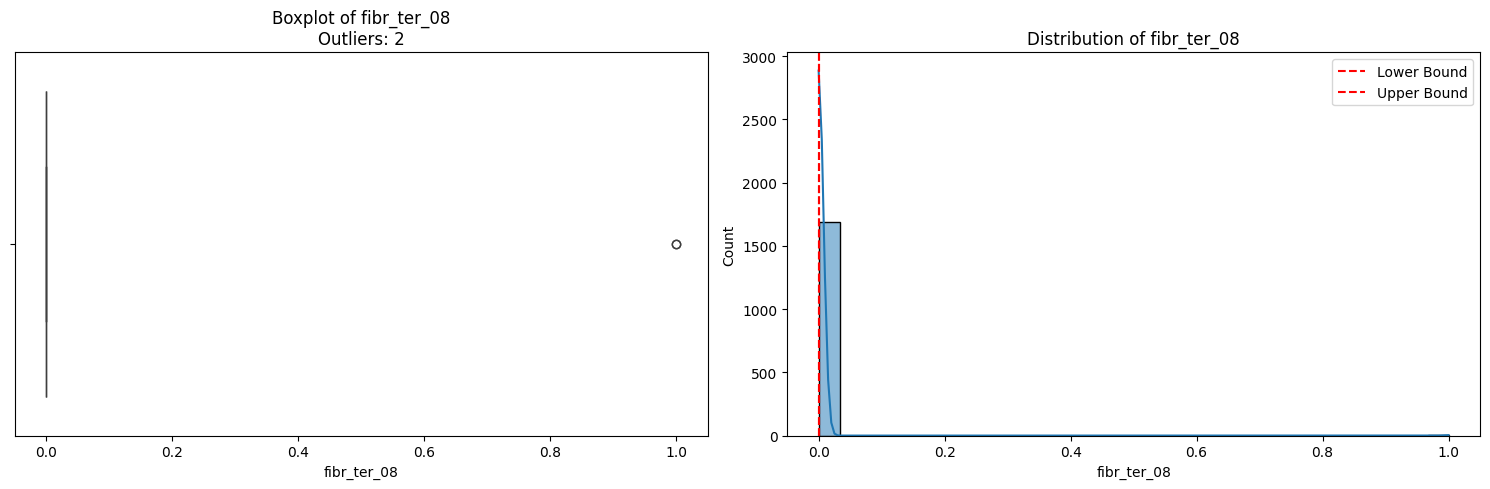

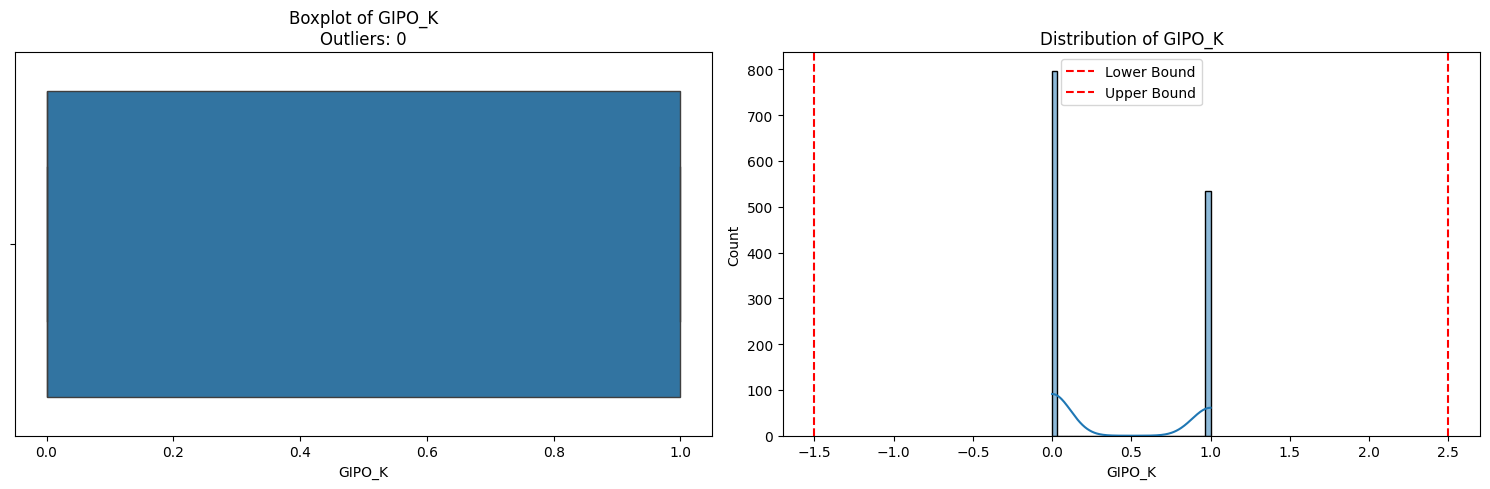

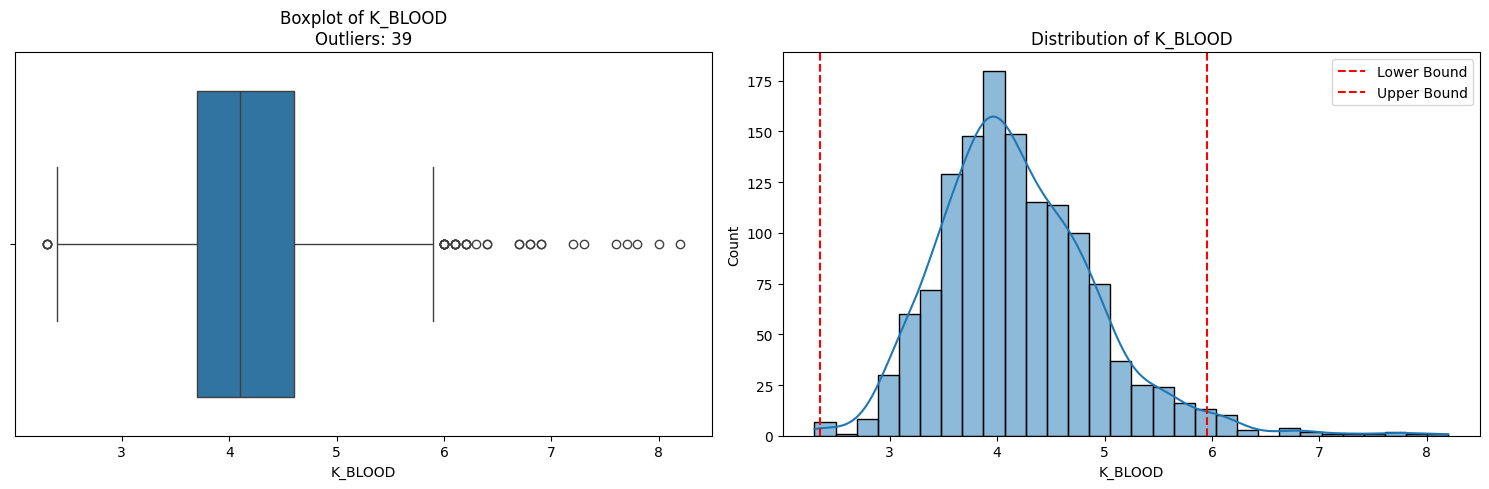

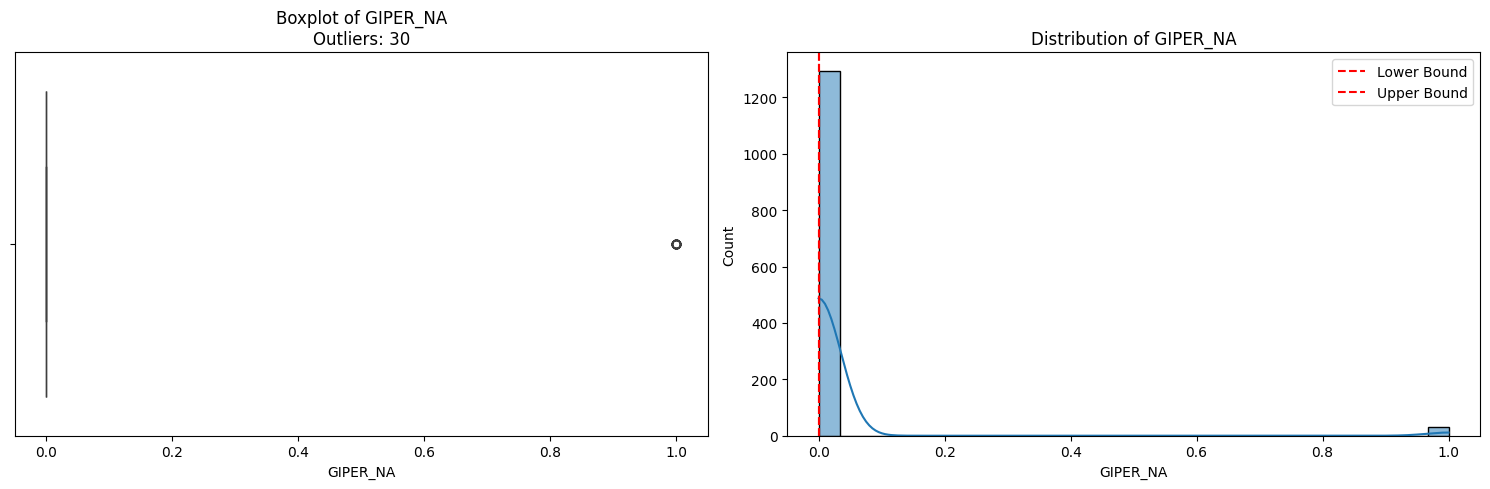

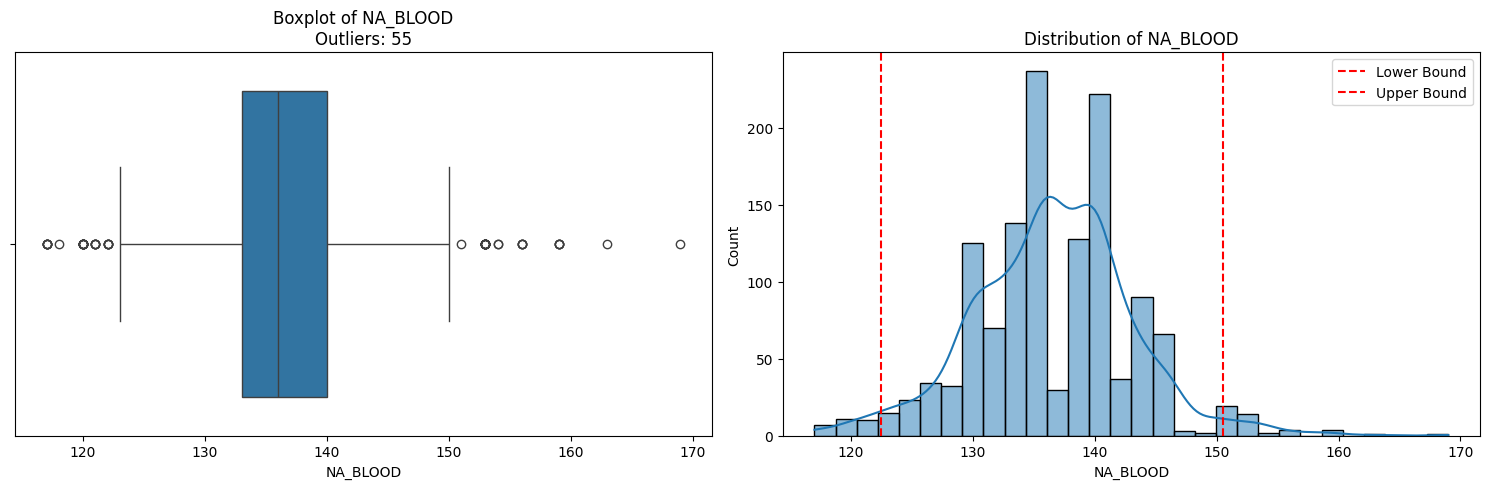

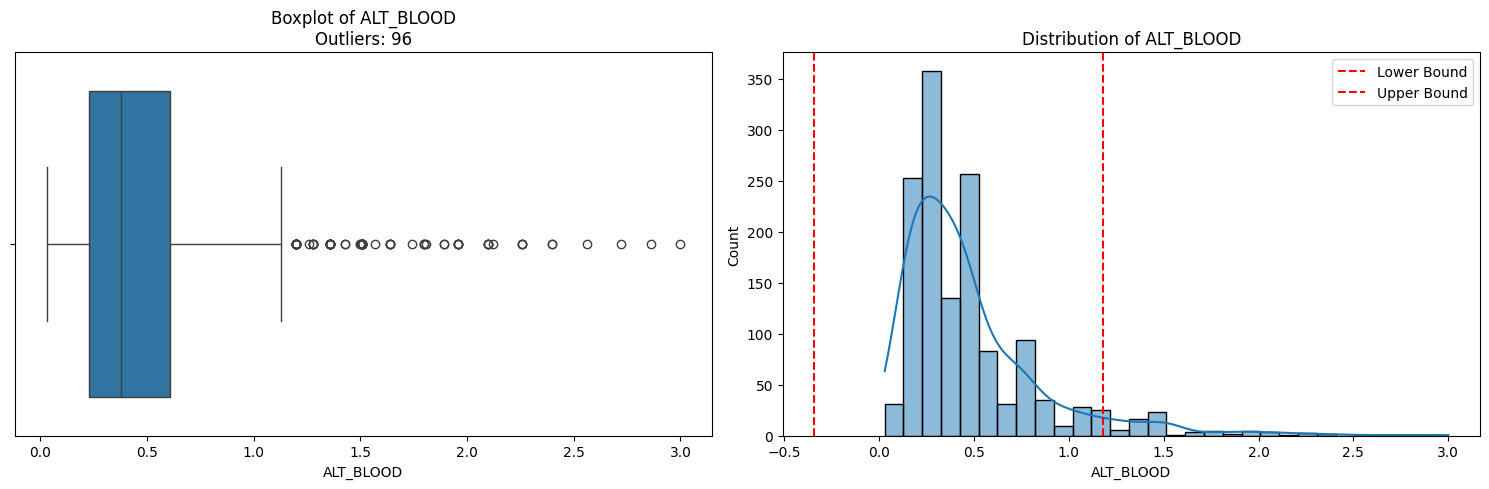

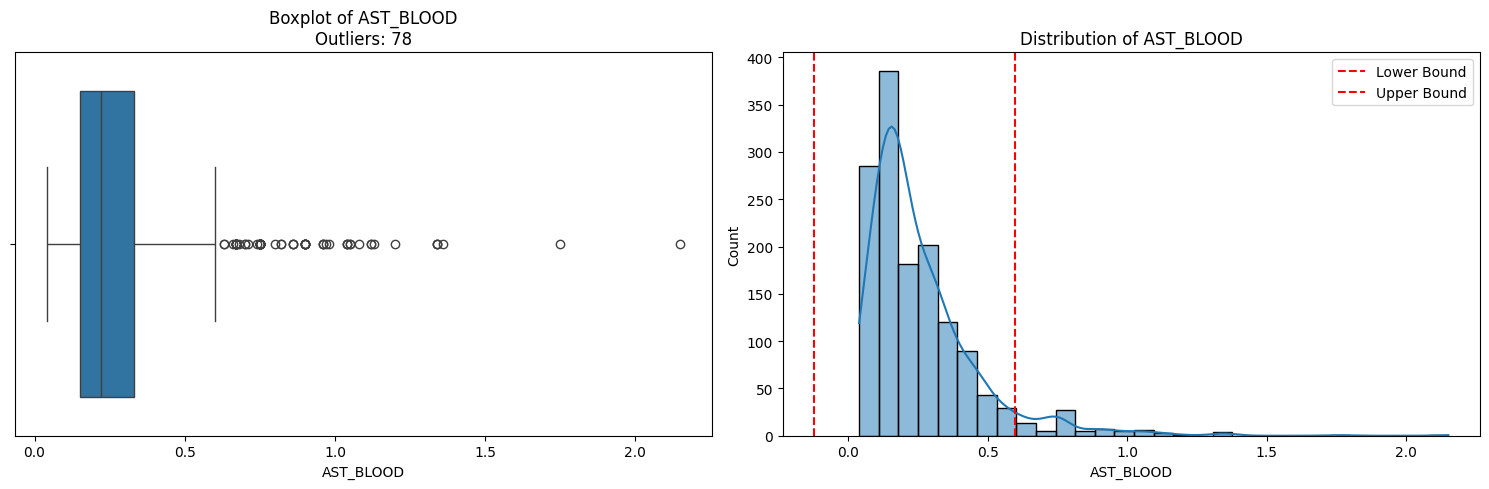

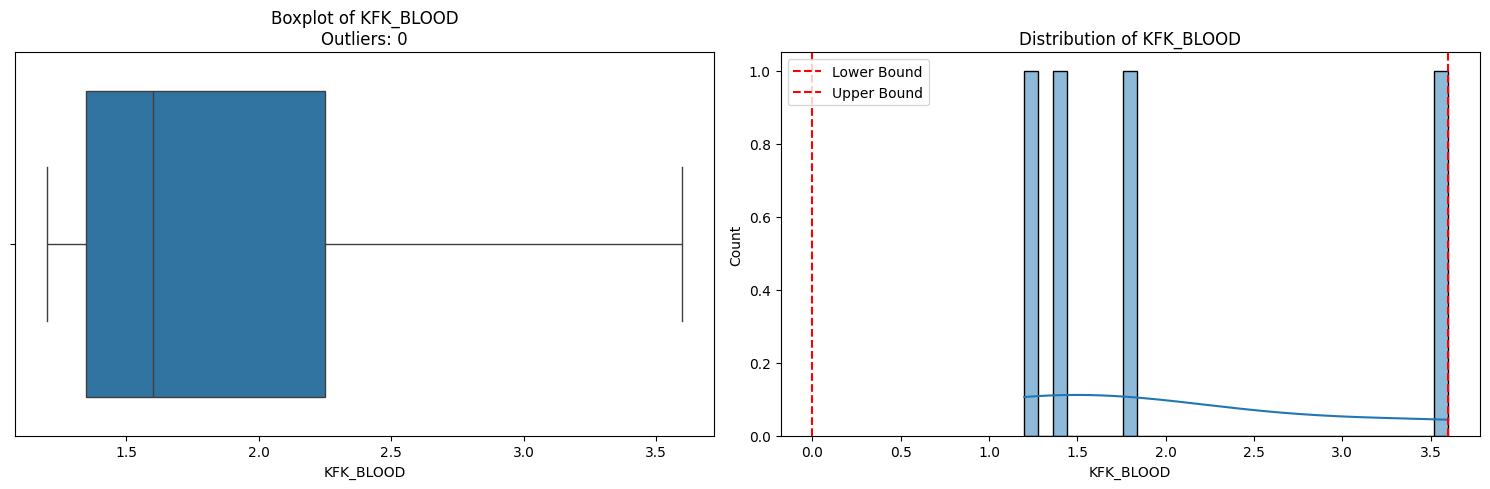

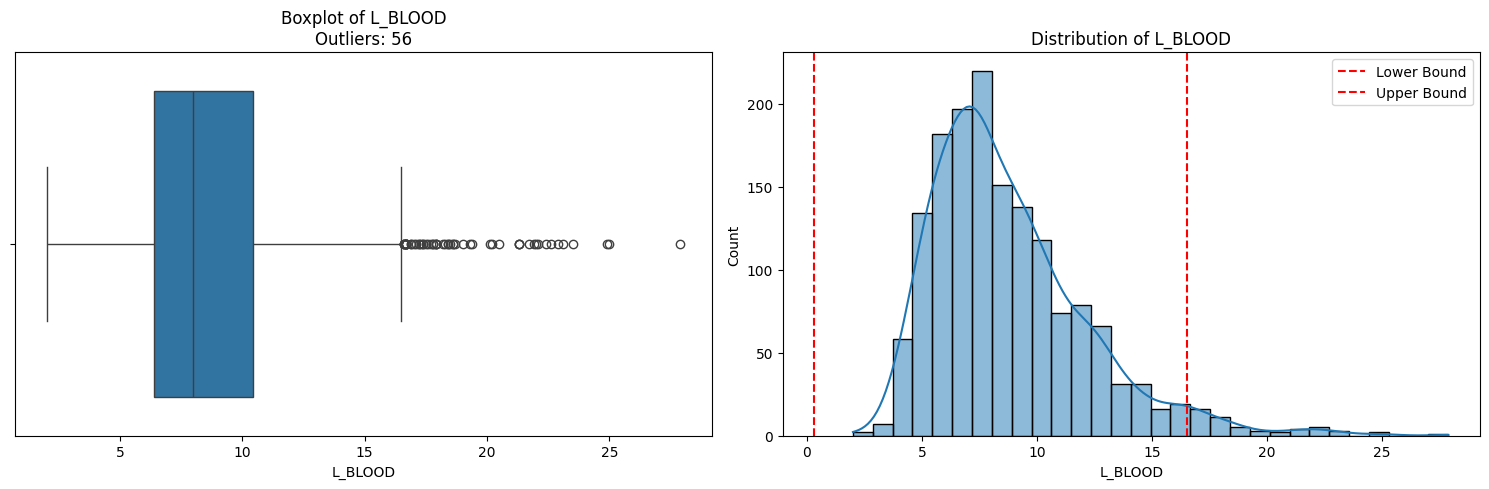

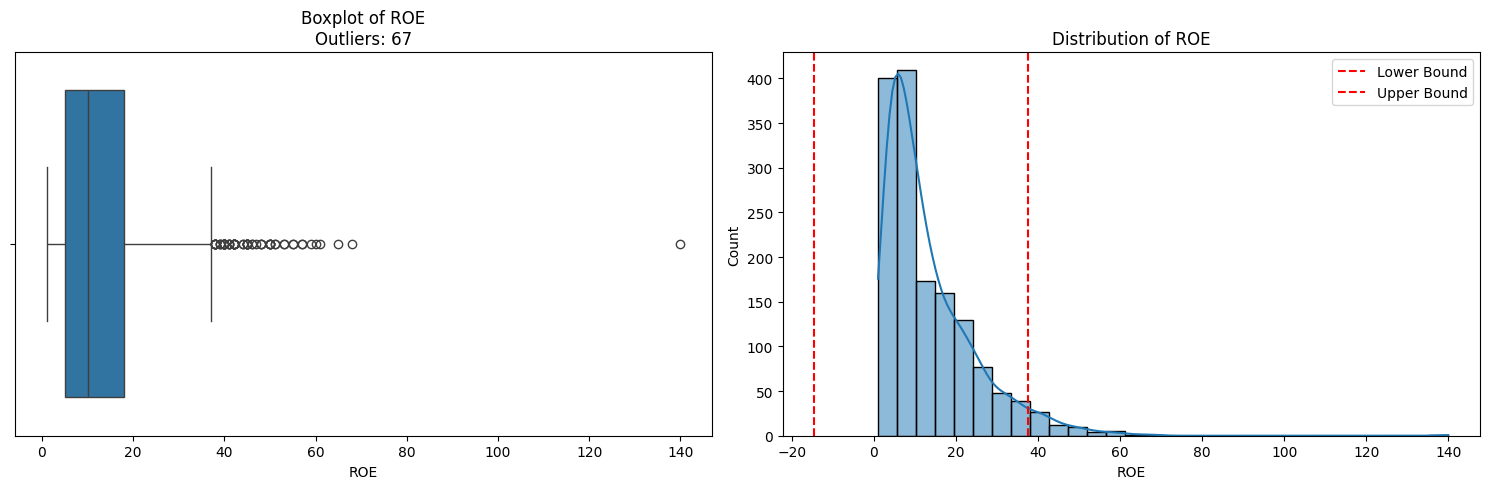

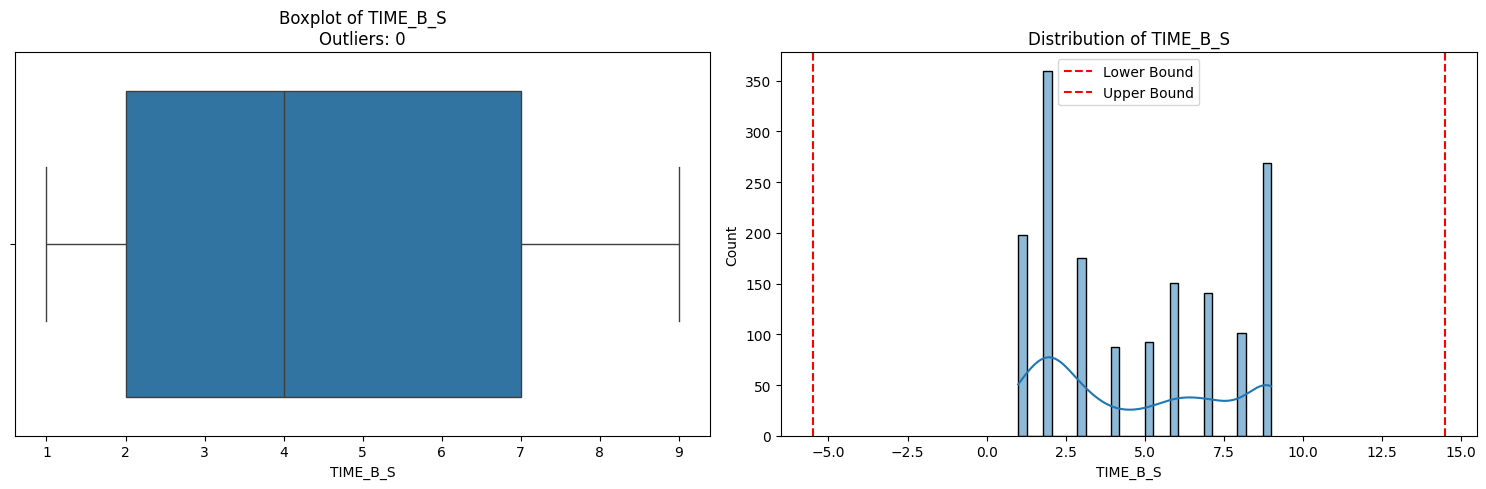

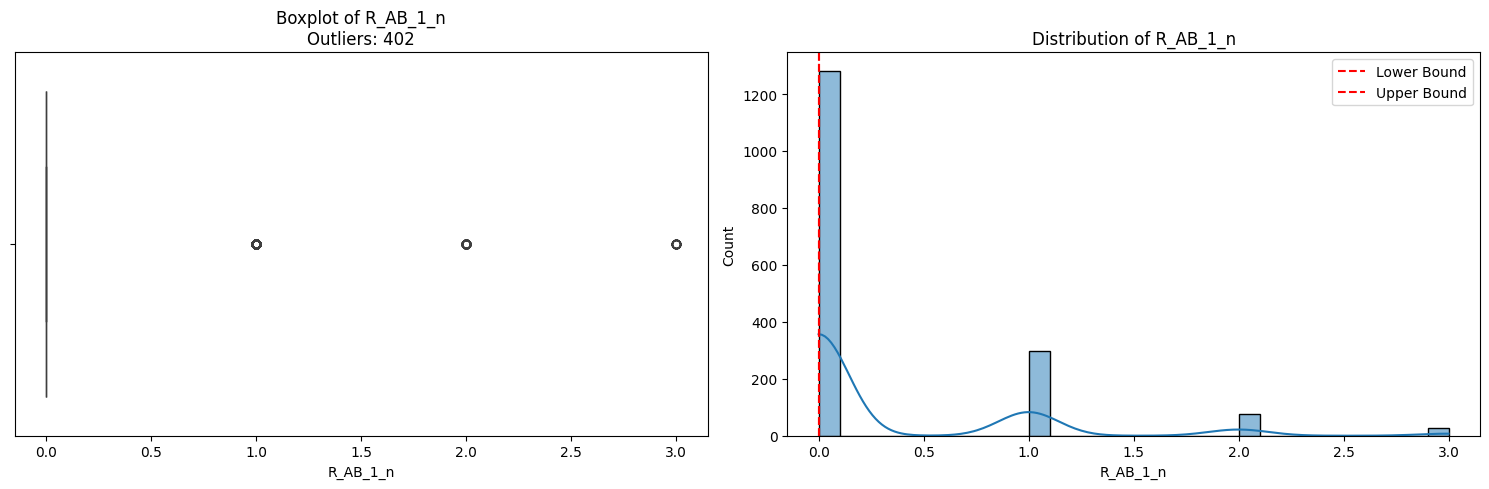

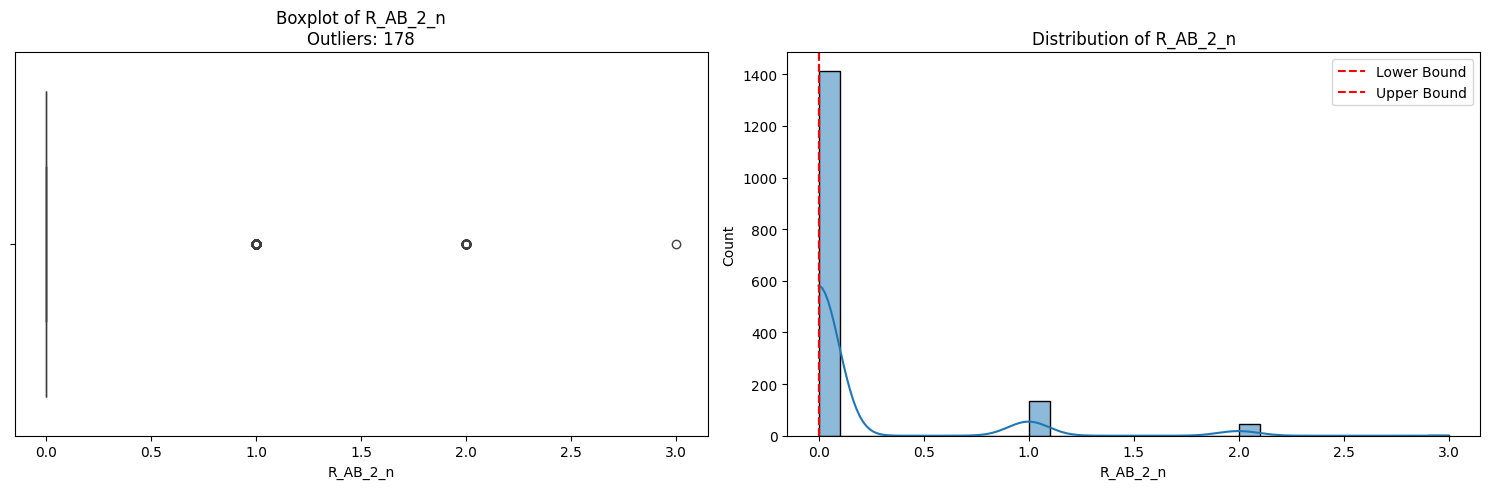

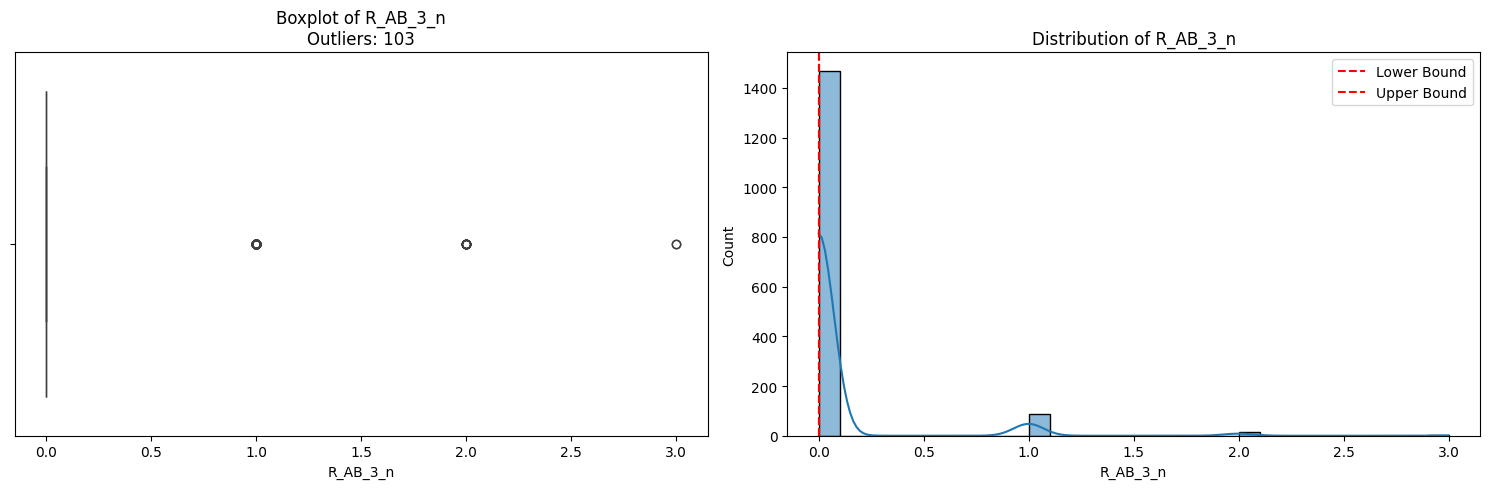

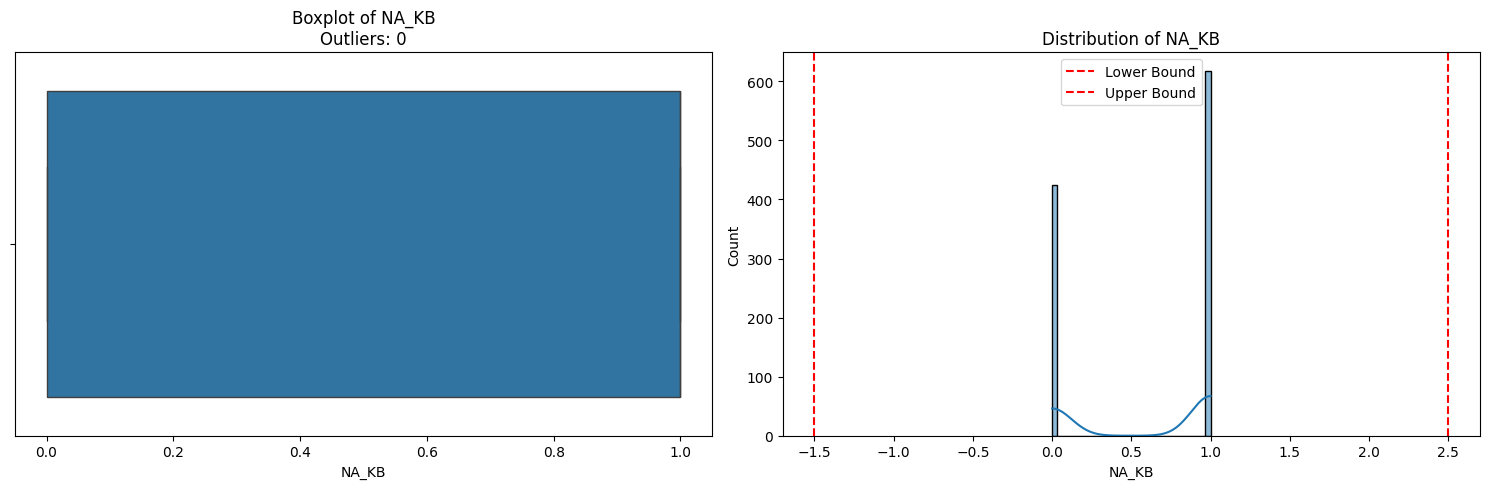

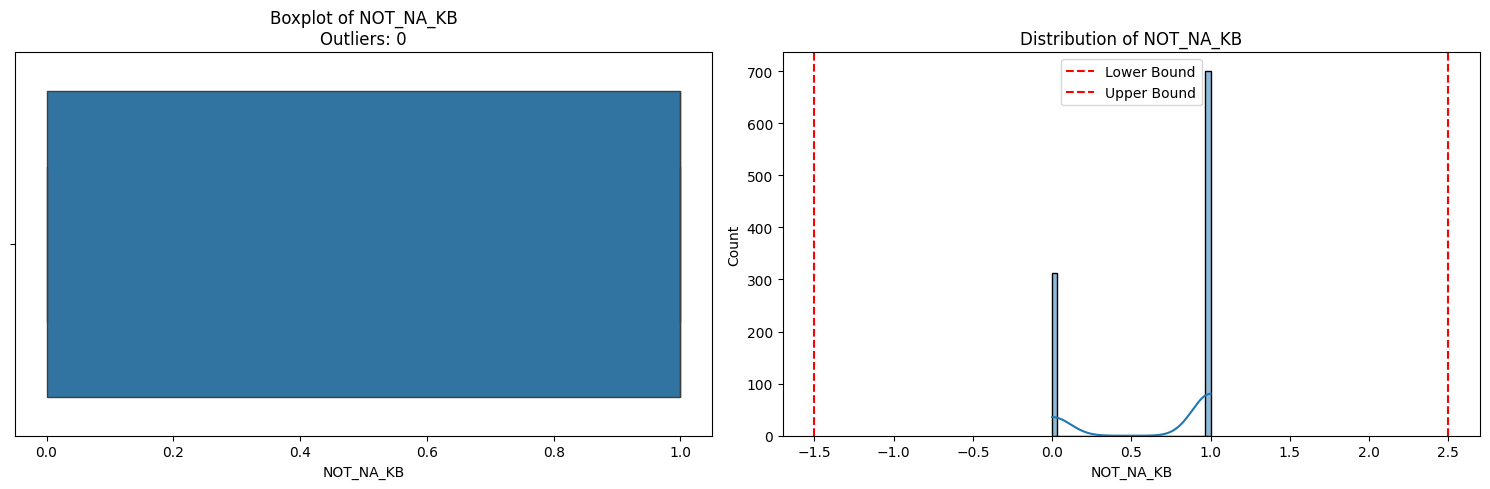

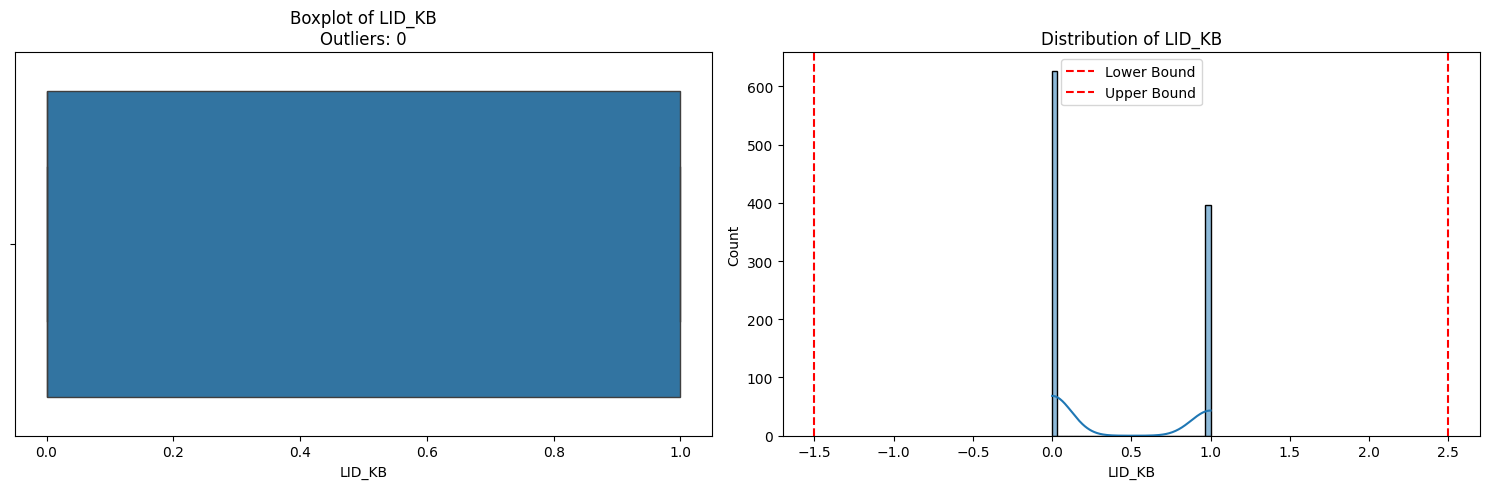

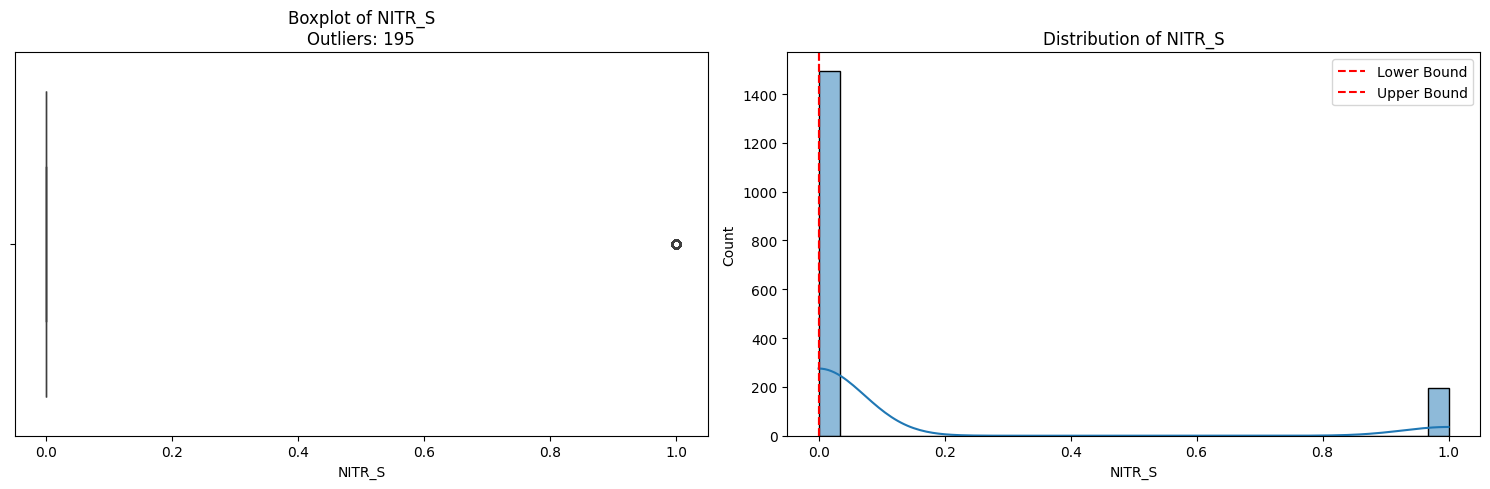

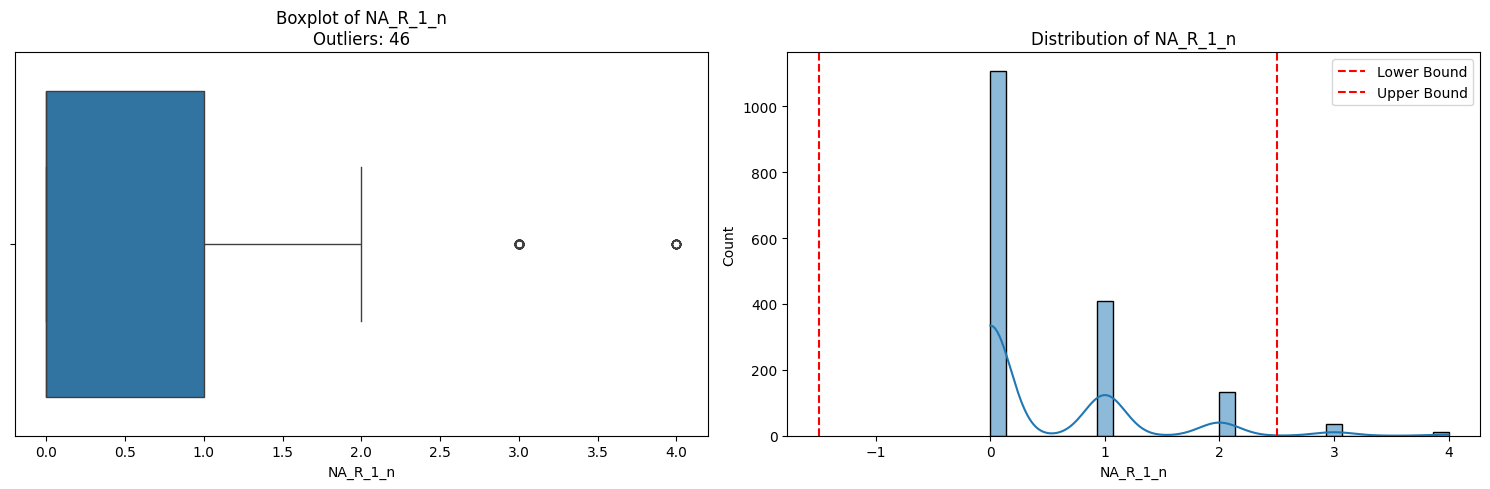

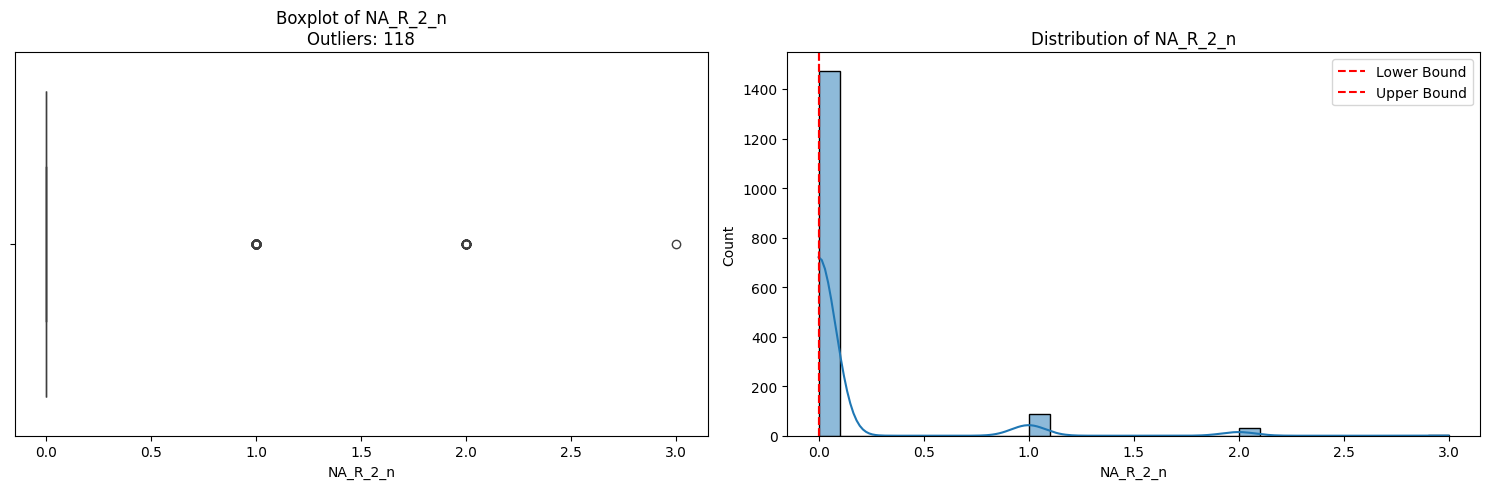

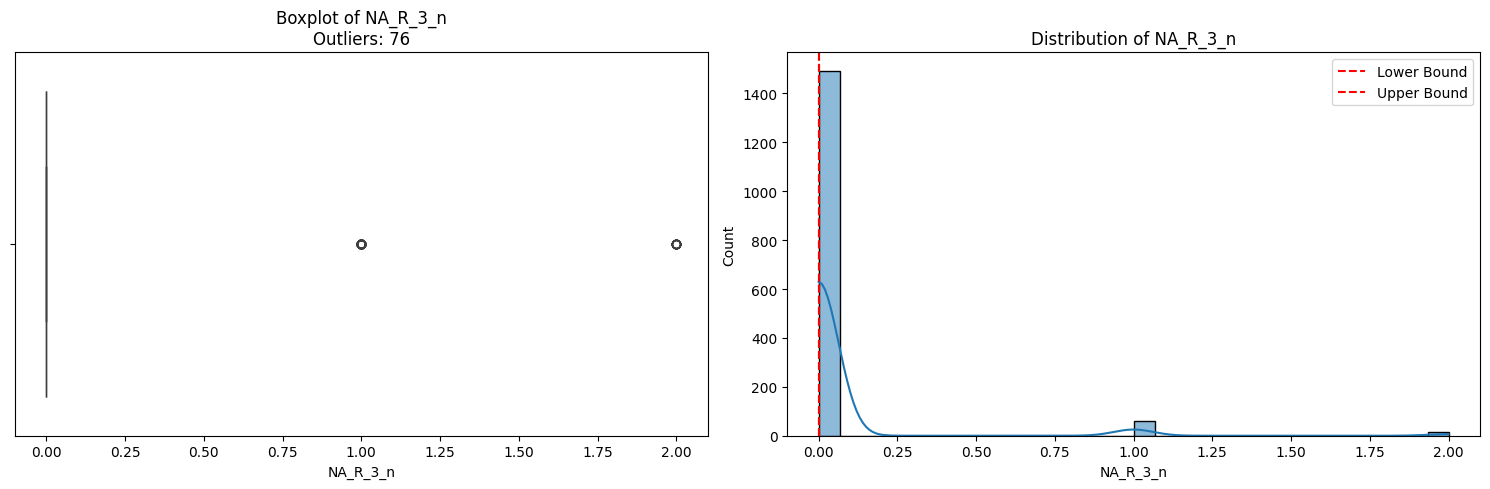

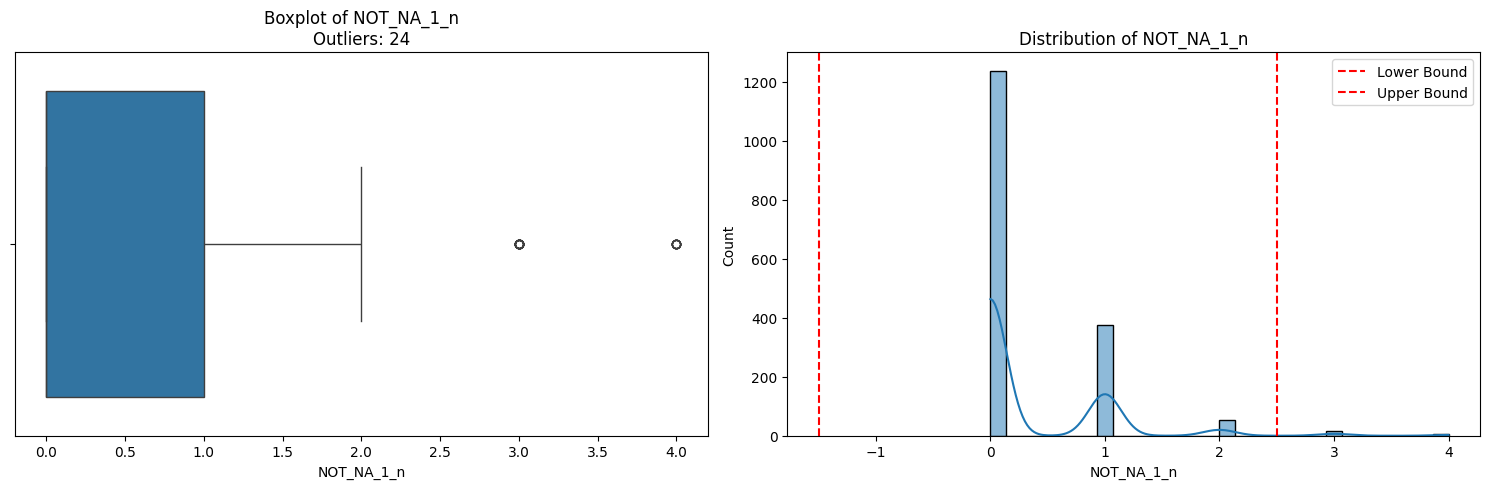

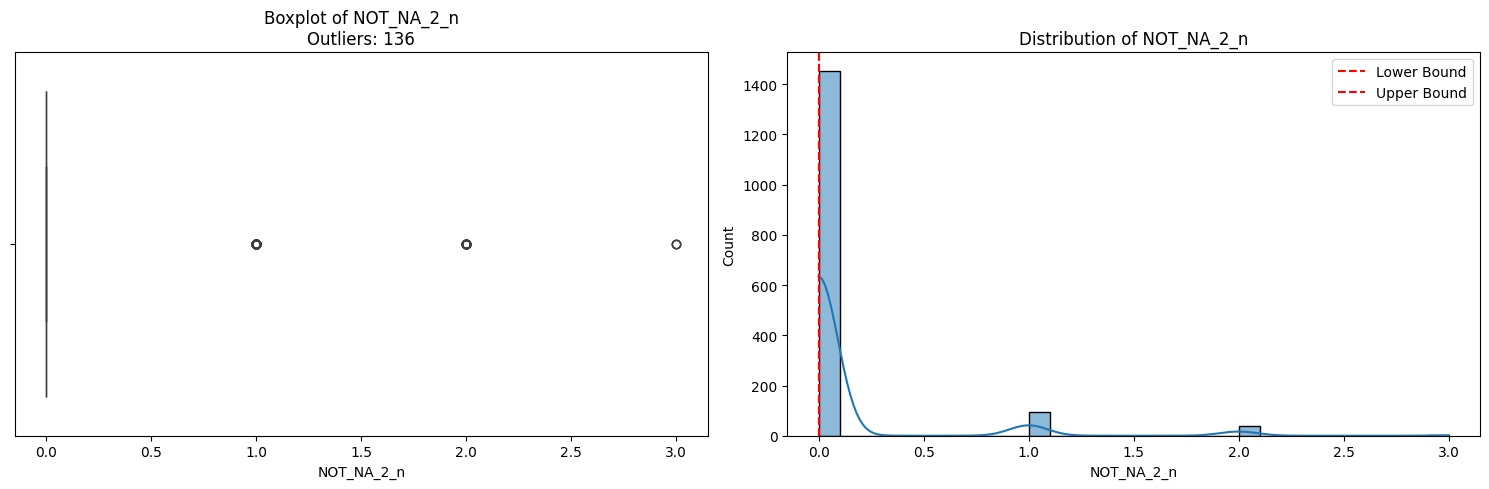

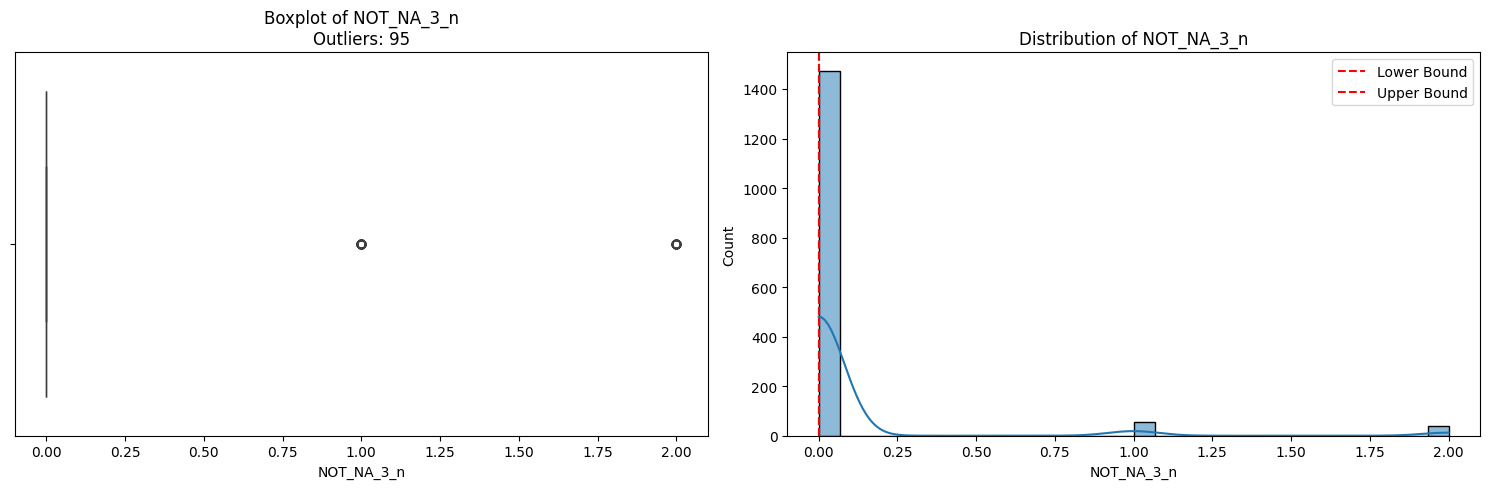

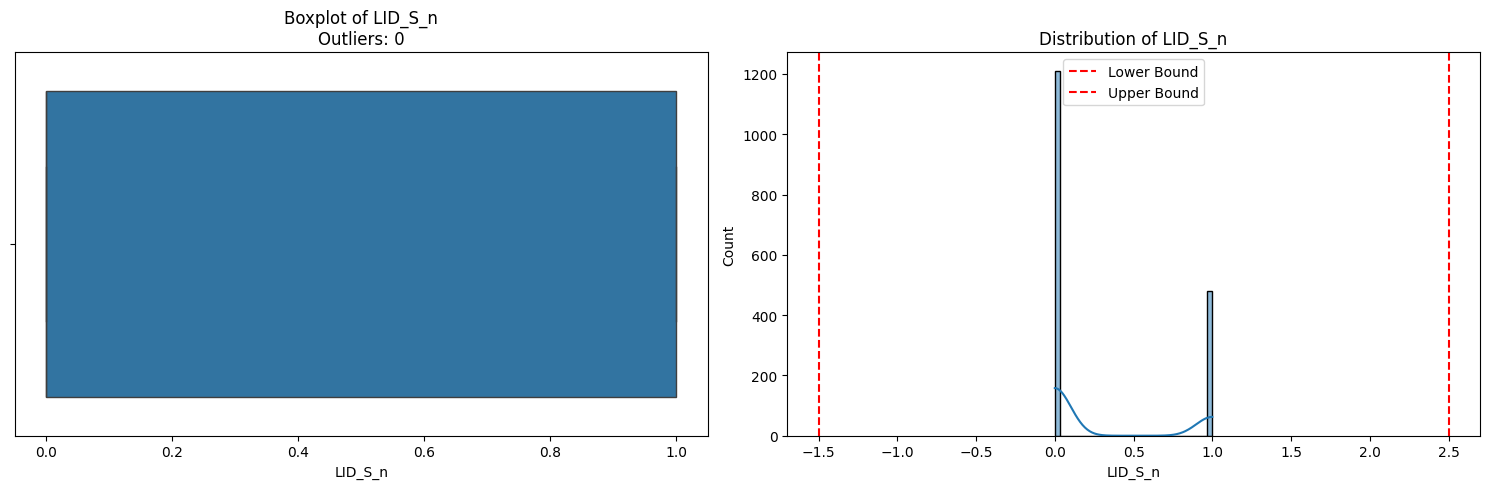

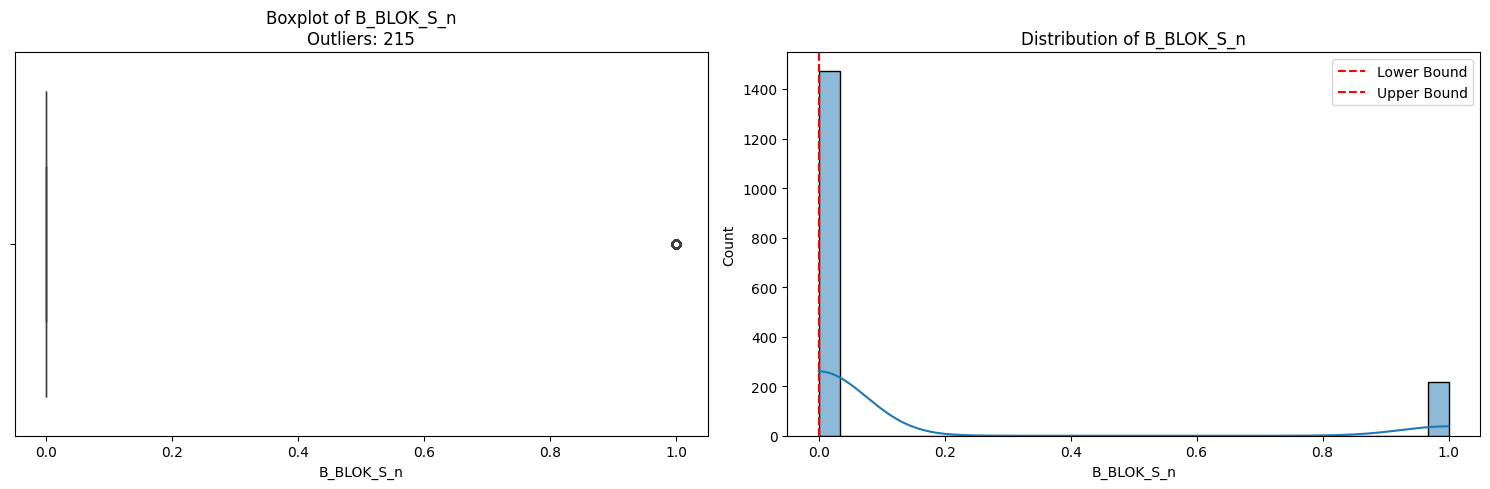

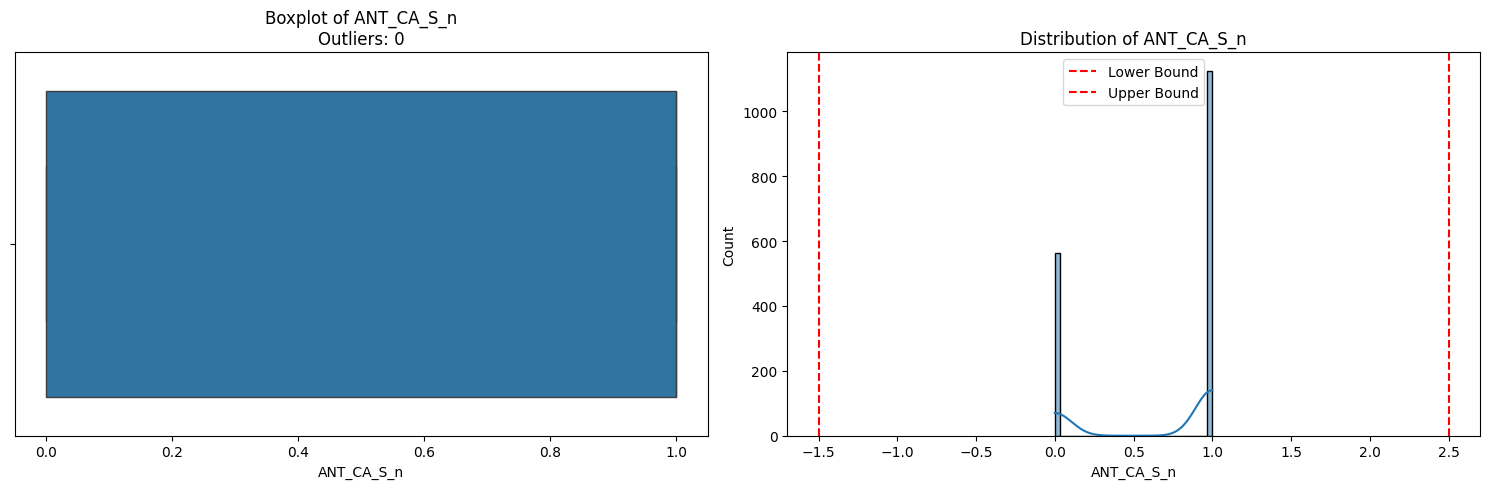

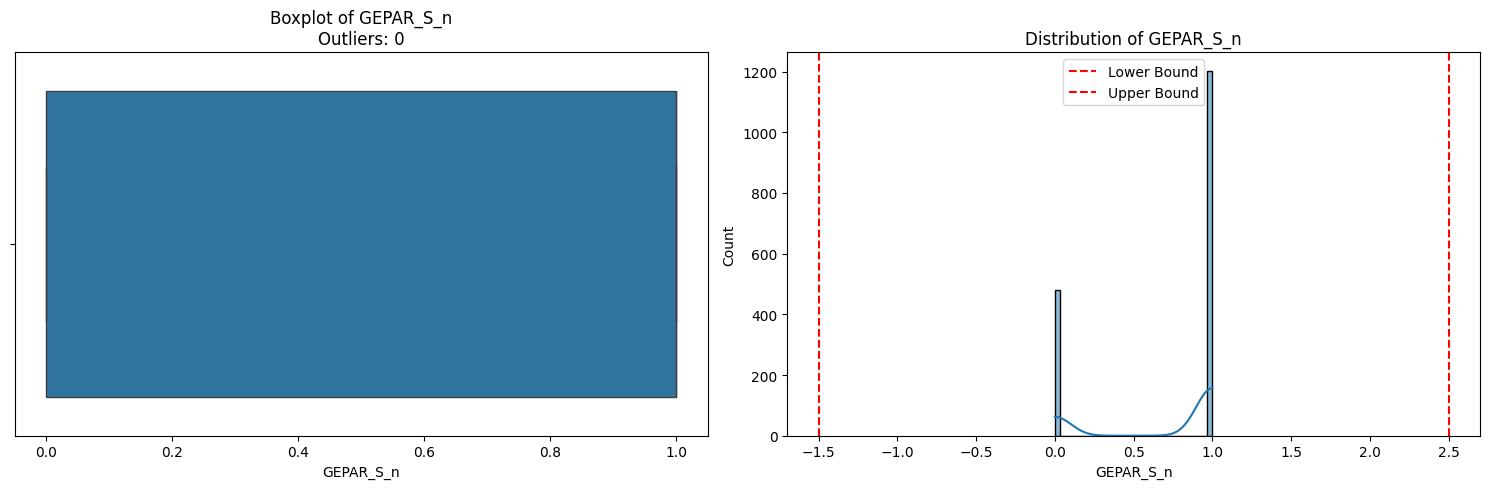

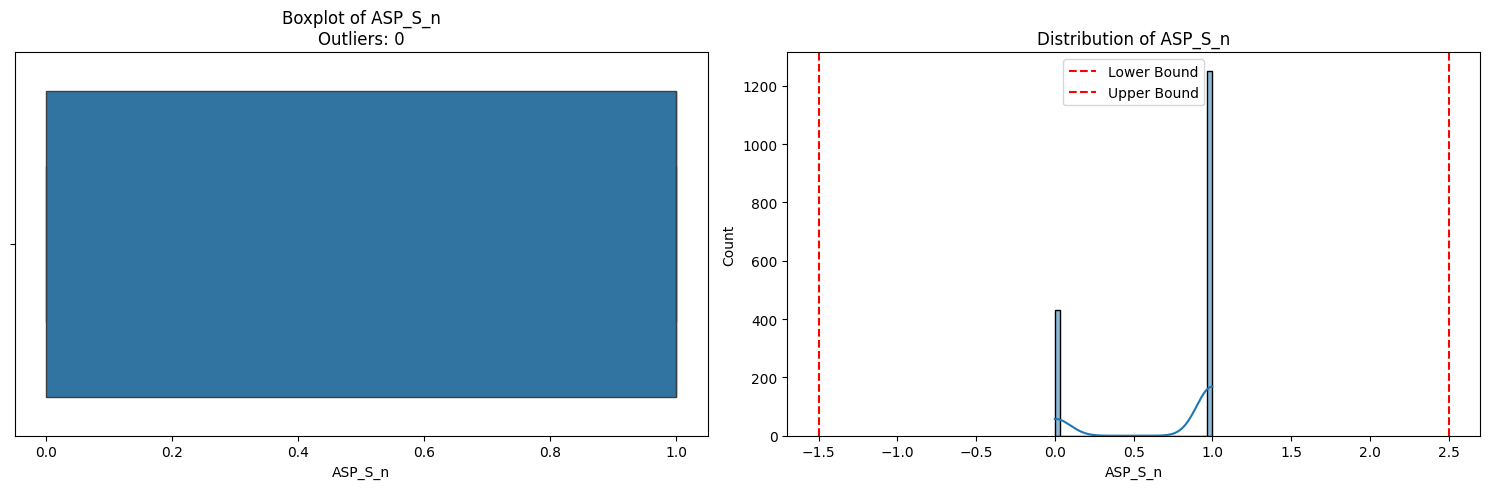

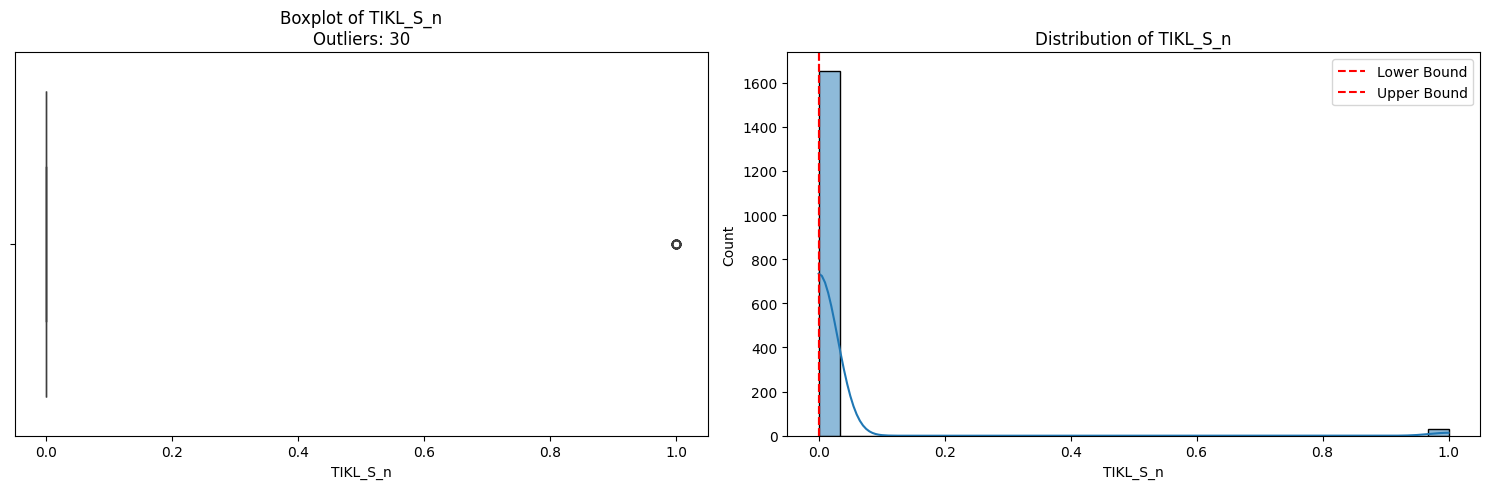

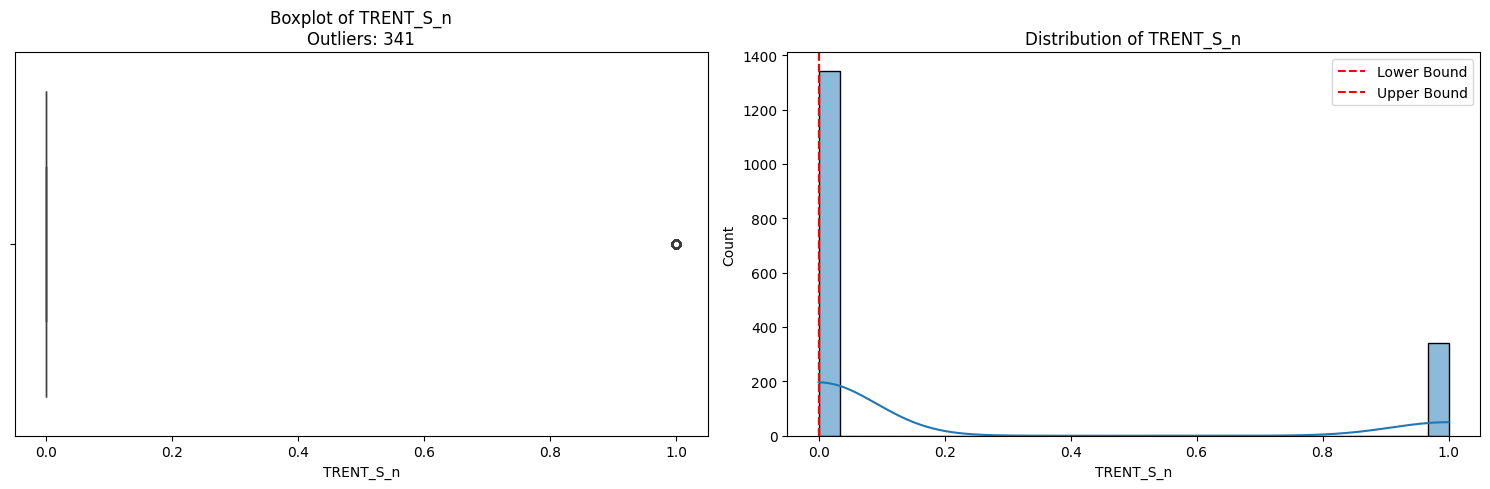

In [ ]:


def visualize_all_outliers(df):
    """Visualize outliers for all numerical columns in the dataset using boxplots and histograms."""
    numerical_columns = df.select_dtypes(include=['number']).columns  # Select only numerical columns

    for column in numerical_columns:
        # Calculate IQR and outlier bounds for the current column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Plot the boxplot and histogram side-by-side
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[0])
        axes[0].set_title(f"Boxplot of {column}\nOutliers: {len(outliers)}")
        axes[0].set_xlabel(column)

        # Histogram
        sns.histplot(df[column], bins=30, kde=True, ax=axes[1])
        axes[1].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        axes[1].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
        axes[1].legend()
        axes[1].set_title(f"Distribution of {column}")
        axes[1].set_xlabel(column)

        plt.tight_layout()
        plt.show()

# Example usage
visualize_all_outliers(X_Clean)


In [ ]:
# Check for missing values in the features (X)
missing_values_features = X_Clean.isnull().sum()

# Check for missing values in the target (y)
missing_values_target = y.isnull().sum()

# Print the results
print("Missing values in the features:\n", missing_values_features)
print("\nMissing values in the target:\n", missing_values_target)


Missing values in the features:
 AGE             8
SEX             0
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 111, dtype: int64

Missing values in the target:
 FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64


In [ ]:
#filling the missing values the median as the dataset's columns contain outliers
X_Clean_filled = X_Clean.fillna(X_Clean.median())



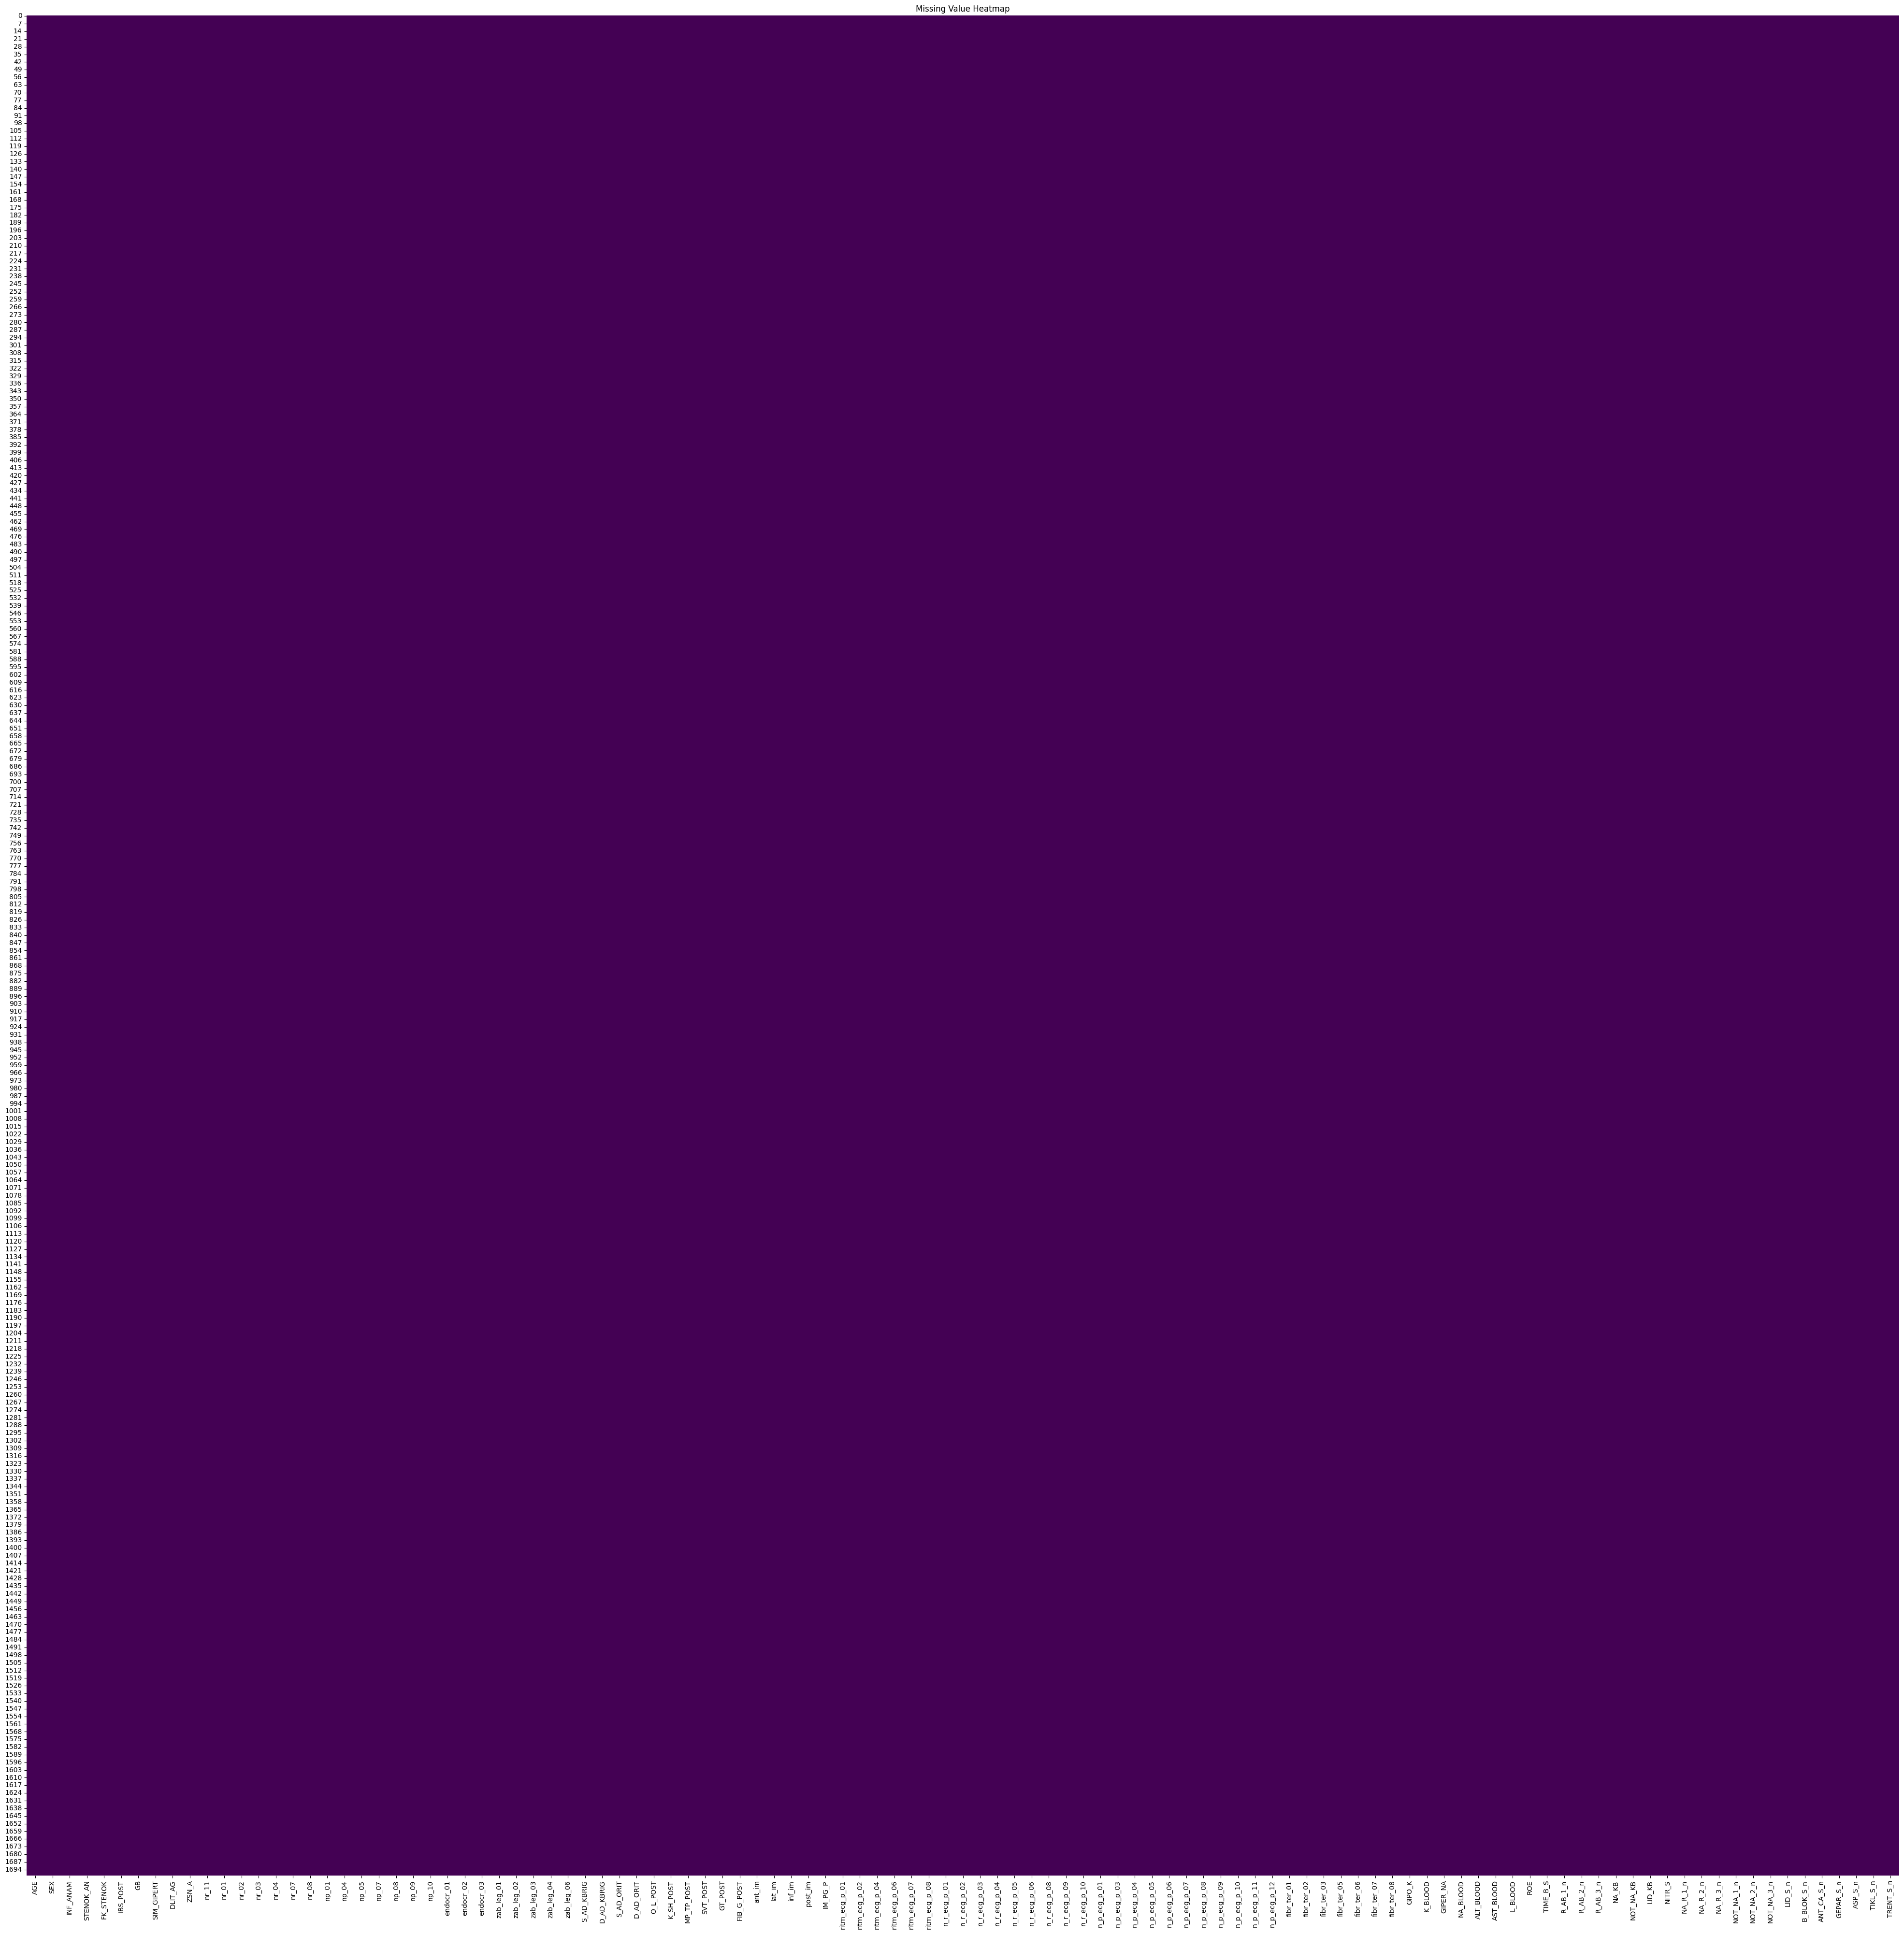

In [ ]:
# Plot missing value heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(X_Clean_filled.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

#### <font color='red'> <h3 align="center"> 6-2-Data Transformation </font>




#### <font color='green'> <h6 align="center"> Feature Scaling: Normalization </font>




In [ ]:


scaler = MinMaxScaler(feature_range=(0,1))
X_norm=scaler.fit_transform(X_Clean_filled)

X_norm = pd.DataFrame(X_norm, columns=X_Clean_filled.columns, index=X_Clean_filled.index)

X_norm

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST        GB  \
0     0.772727  1.0  0.666667   0.166667       0.25       1.0  1.000000   
1     0.439394  1.0  0.333333   0.000000       0.00       0.0  0.000000   
2     0.393939  1.0  0.000000   0.000000       0.00       1.0  0.666667   
3     0.636364  0.0  0.000000   0.000000       0.00       1.0  0.666667   
4     0.515152  1.0  0.000000   0.000000       0.00       1.0  1.000000   
...        ...  ...       ...        ...        ...       ...       ...   
1695  0.772727  0.0  0.000000   0.666667       0.50       0.5  0.666667   
1696  0.666667  0.0  0.000000   1.000000       0.50       0.5  0.666667   
1697  0.439394  1.0  1.000000   1.000000       0.50       1.0  0.000000   
1698  0.803030  0.0  0.666667   0.333333       0.50       0.5  0.666667   
1699  0.560606  1.0  0.666667   0.166667       0.50       0.5  0.666667   

      SIM_GIPERT   DLIT_AG  ZSN_A  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  \
0            0.0  1.000000   0.00  ...        0.00    0.000000         0.0   
1            0.0  0.000000   0.00  ...        0.25    0.000000         0.0   
2            0.0  0.285714   0.00  ...        0.75    0.666667         1.0   
3            0.0  0.428571   0.25  ...        0.00    0.000000         0.0   
4            0.0  1.000000   0.00  ...        0.00    0.000000         0.0   
...          ...       ...    ...  ...         ...         ...         ...   
1695         0.0  1.000000   0.00  ...        0.00    0.000000         0.0   
1696         0.0  1.000000   0.00  ...        0.00    0.000000         0.0   
1697         0.0  0.000000   0.00  ...        0.00    0.000000         0.0   
1698         0.0  1.000000   0.00  ...        0.25    0.000000         0.0   
1699         0.0  0.428571   1.00  ...        0.00    0.000000         0.0   

      LID_S_n  B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
0         1.0         0.0         0.0        1.0      1.0       0.0        0.0  
1         1.0         0.0         1.0        1.0      1.0       0.0        1.0  
2         1.0         1.0         0.0        1.0      1.0       0.0        0.0  
3         0.0         0.0         1.0        1.0      1.0       0.0        0.0  
4         0.0         0.0         1.0        0.0      1.0       0.0        1.0  
...       ...         ...         ...        ...      ...       ...        ...  
1695      0.0         0.0         0.0        0.0      0.0       0.0        0.0  
1696      1.0         0.0         0.0        0.0      0.0       0.0        0.0  
1697      0.0         1.0         0.0        1.0      1.0       0.0        0.0  
1698      1.0         0.0         1.0        1.0      1.0       0.0        0.0  
1699      0.0         0.0         0.0        0.0      0.0       0.0        0.0  

[1700 rows x 109 columns]



#### <font color='Green'> <h4 align="center"> Feature Selection </font>




#### <font color='green'> <h4 align="center"> Filter Method </font>




In [ ]:
numeric_real_attributes = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT']
df_selected = X[numeric_real_attributes]

print(df_selected)

       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1     55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2     52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3     68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4     60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0        4.0        2.0       1.0       NaN  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       NaN  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       NaN  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       NaN  2.0   
1699  63.0    1       2.0        NaN        NaN       NaN       NaN  2.0   

      SIM_GIPERT  
0            0.0  
1            0.0  
2            0.0  
3          

<Axes: >

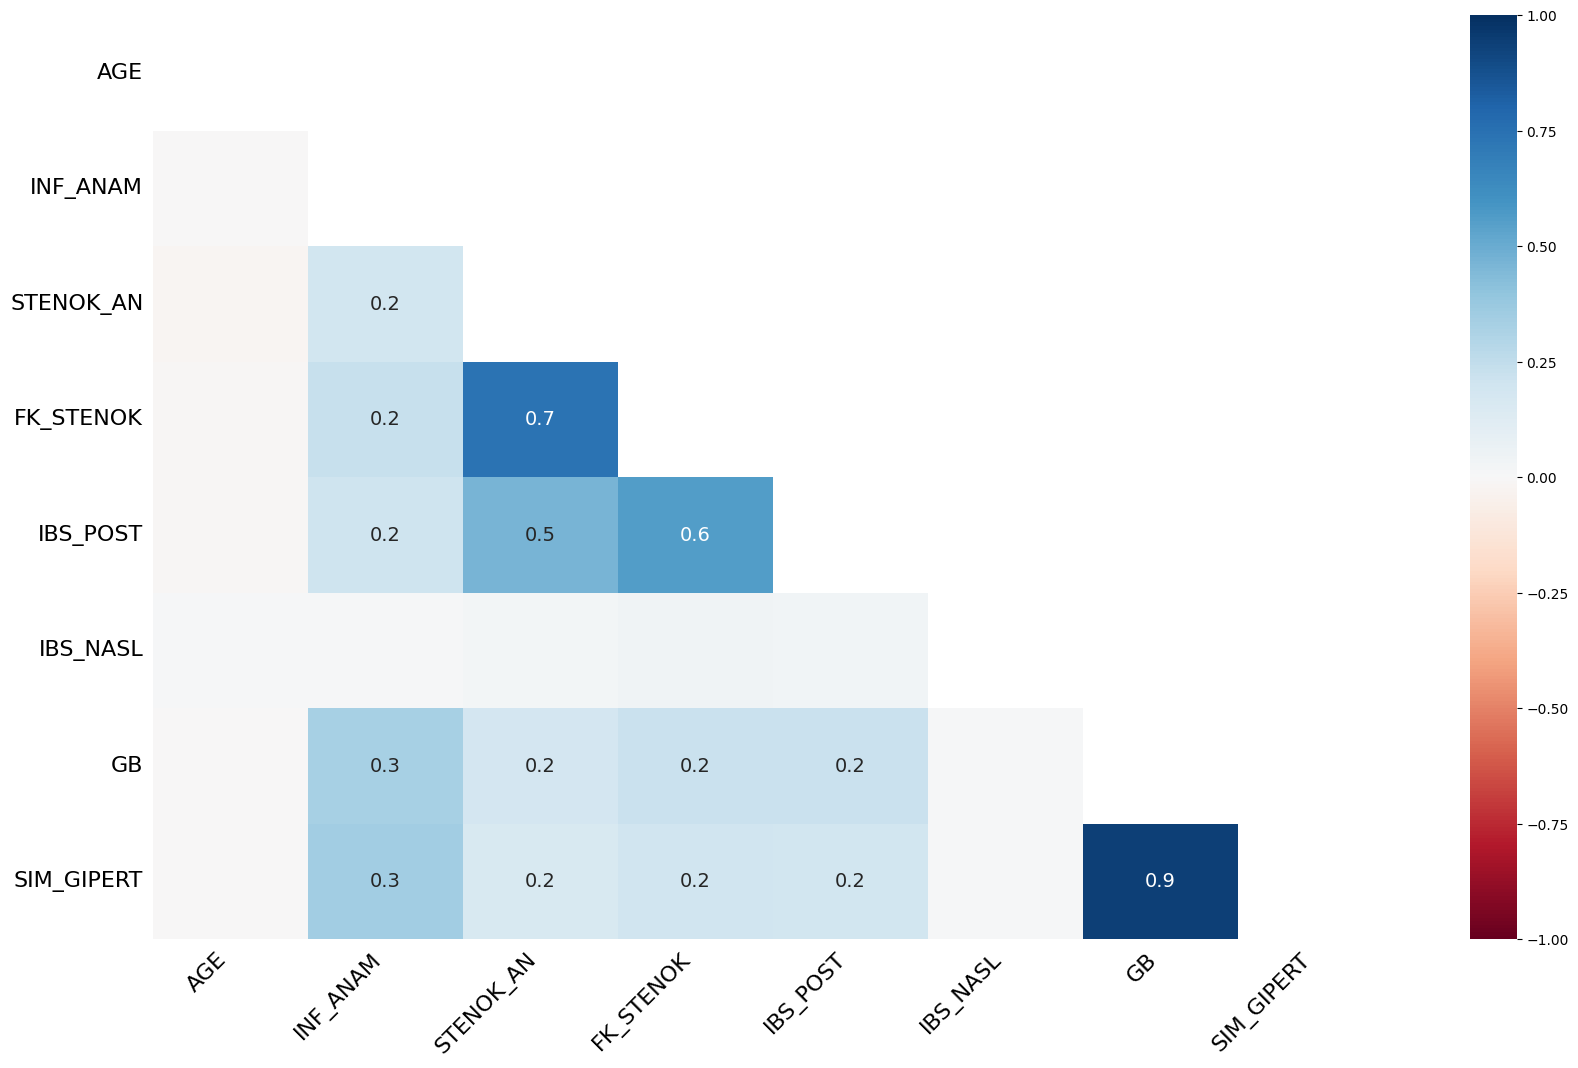

In [ ]:

msno.heatmap(df_selected,labels=True)

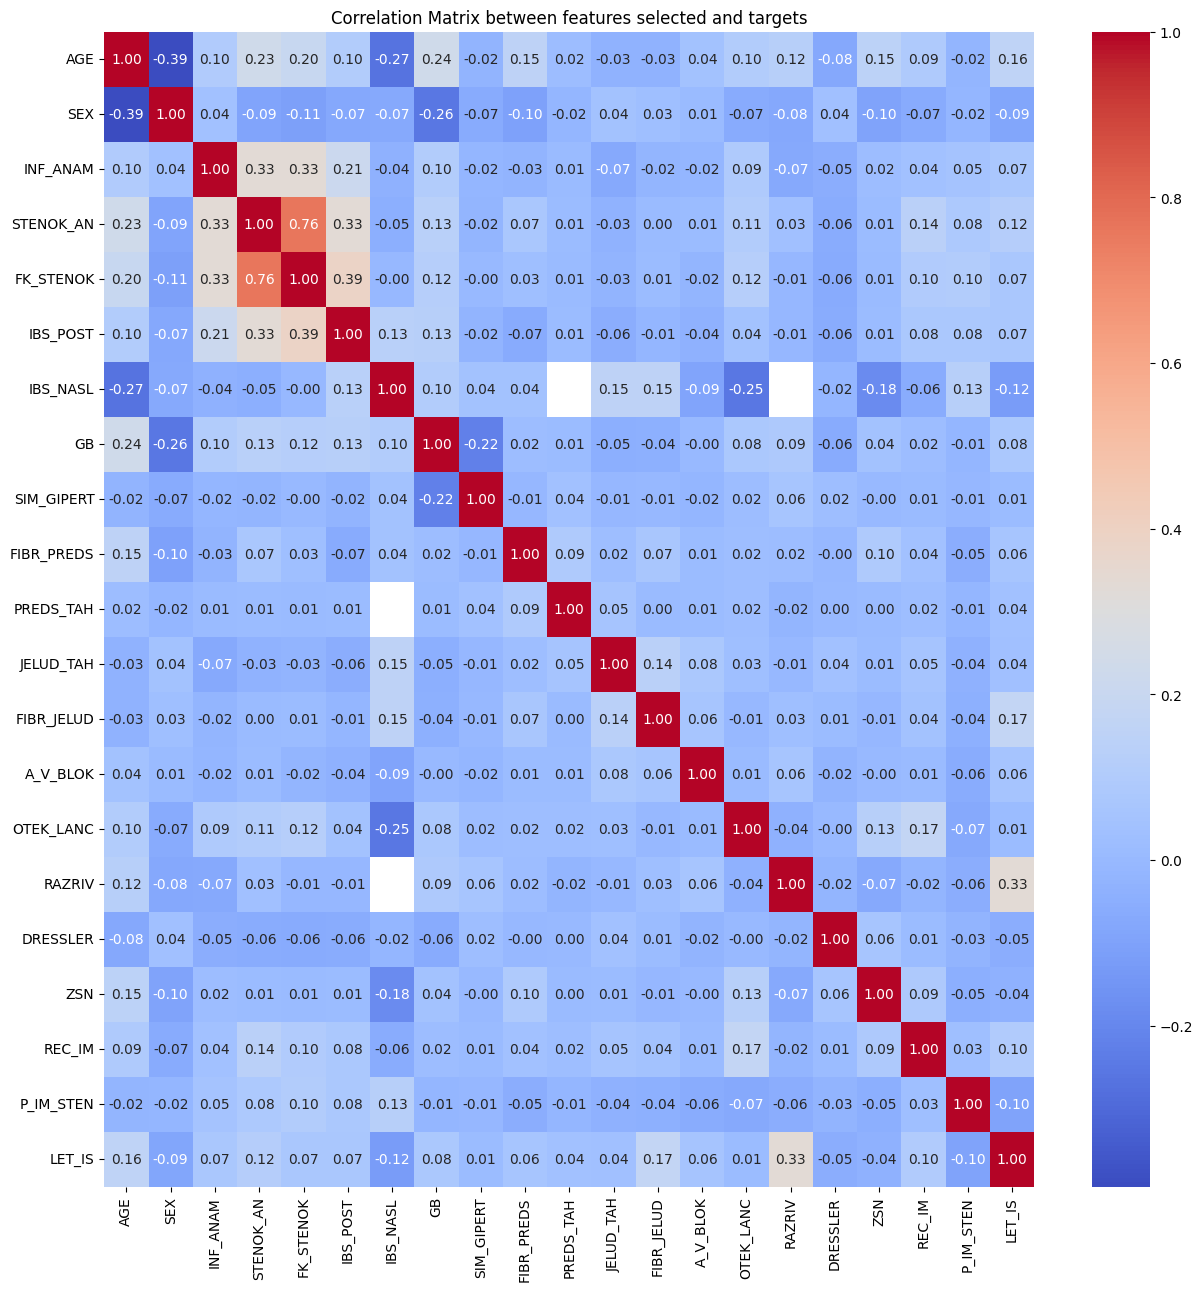

In [ ]:
df = pd.concat([X[numeric_real_attributes], y], axis=1)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between features selected and targets')
plt.show()

###Mutual Information Test

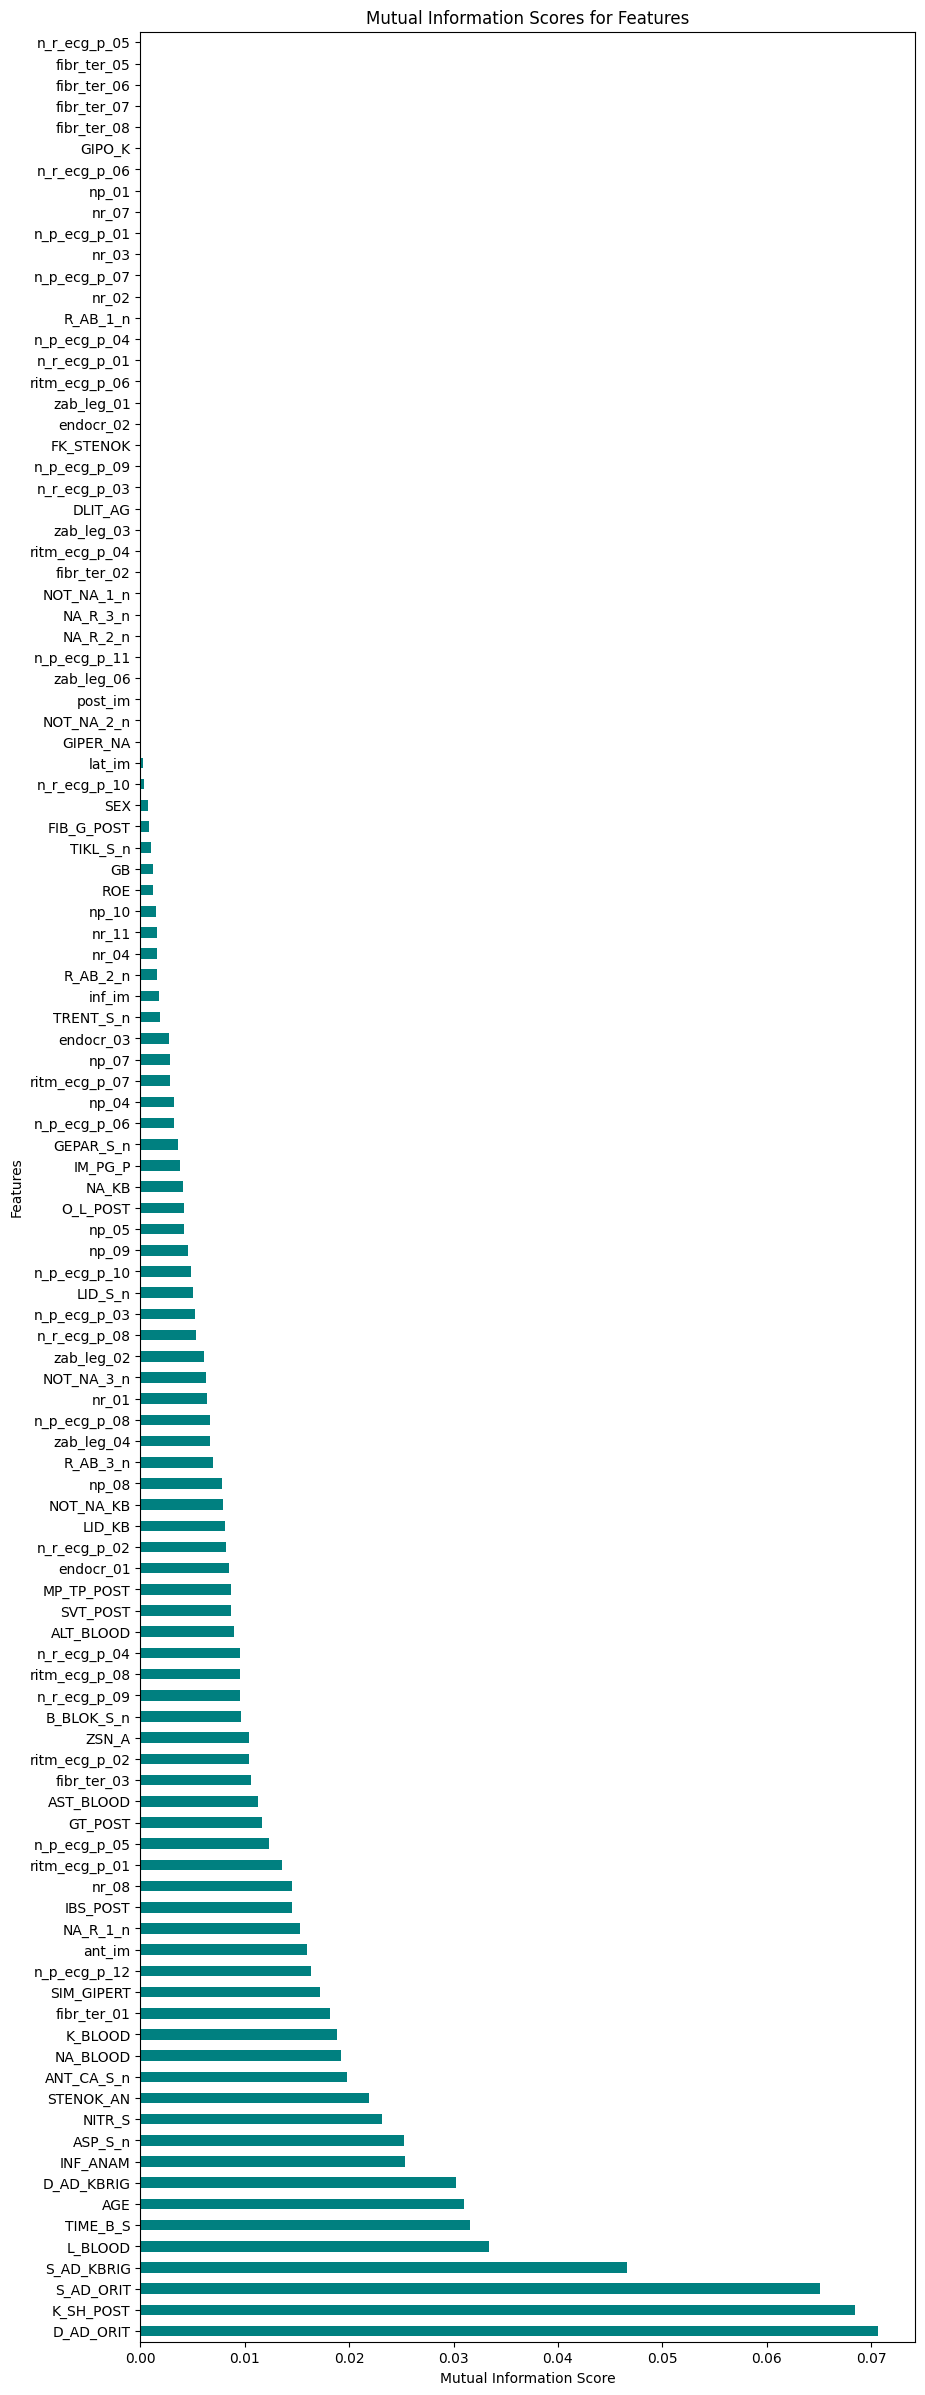

In [ ]:



# *** Assuming 'LET_IS' is the target column in your data ***
# Extract the target column as a 1D array
y = myocardial_infarction_complications.data.targets['LET_IS'].values

# Calculate mutual information
importances = mutual_info_classif(X_norm, y, discrete_features='auto')
# Create a Series to hold feature importances
feat_importances = pd.Series(importances, index=X_norm.columns)

# Sort the features by importance
feat_importances = feat_importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 30))
feat_importances.plot(kind='barh', color='teal')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

###Chi Square Test

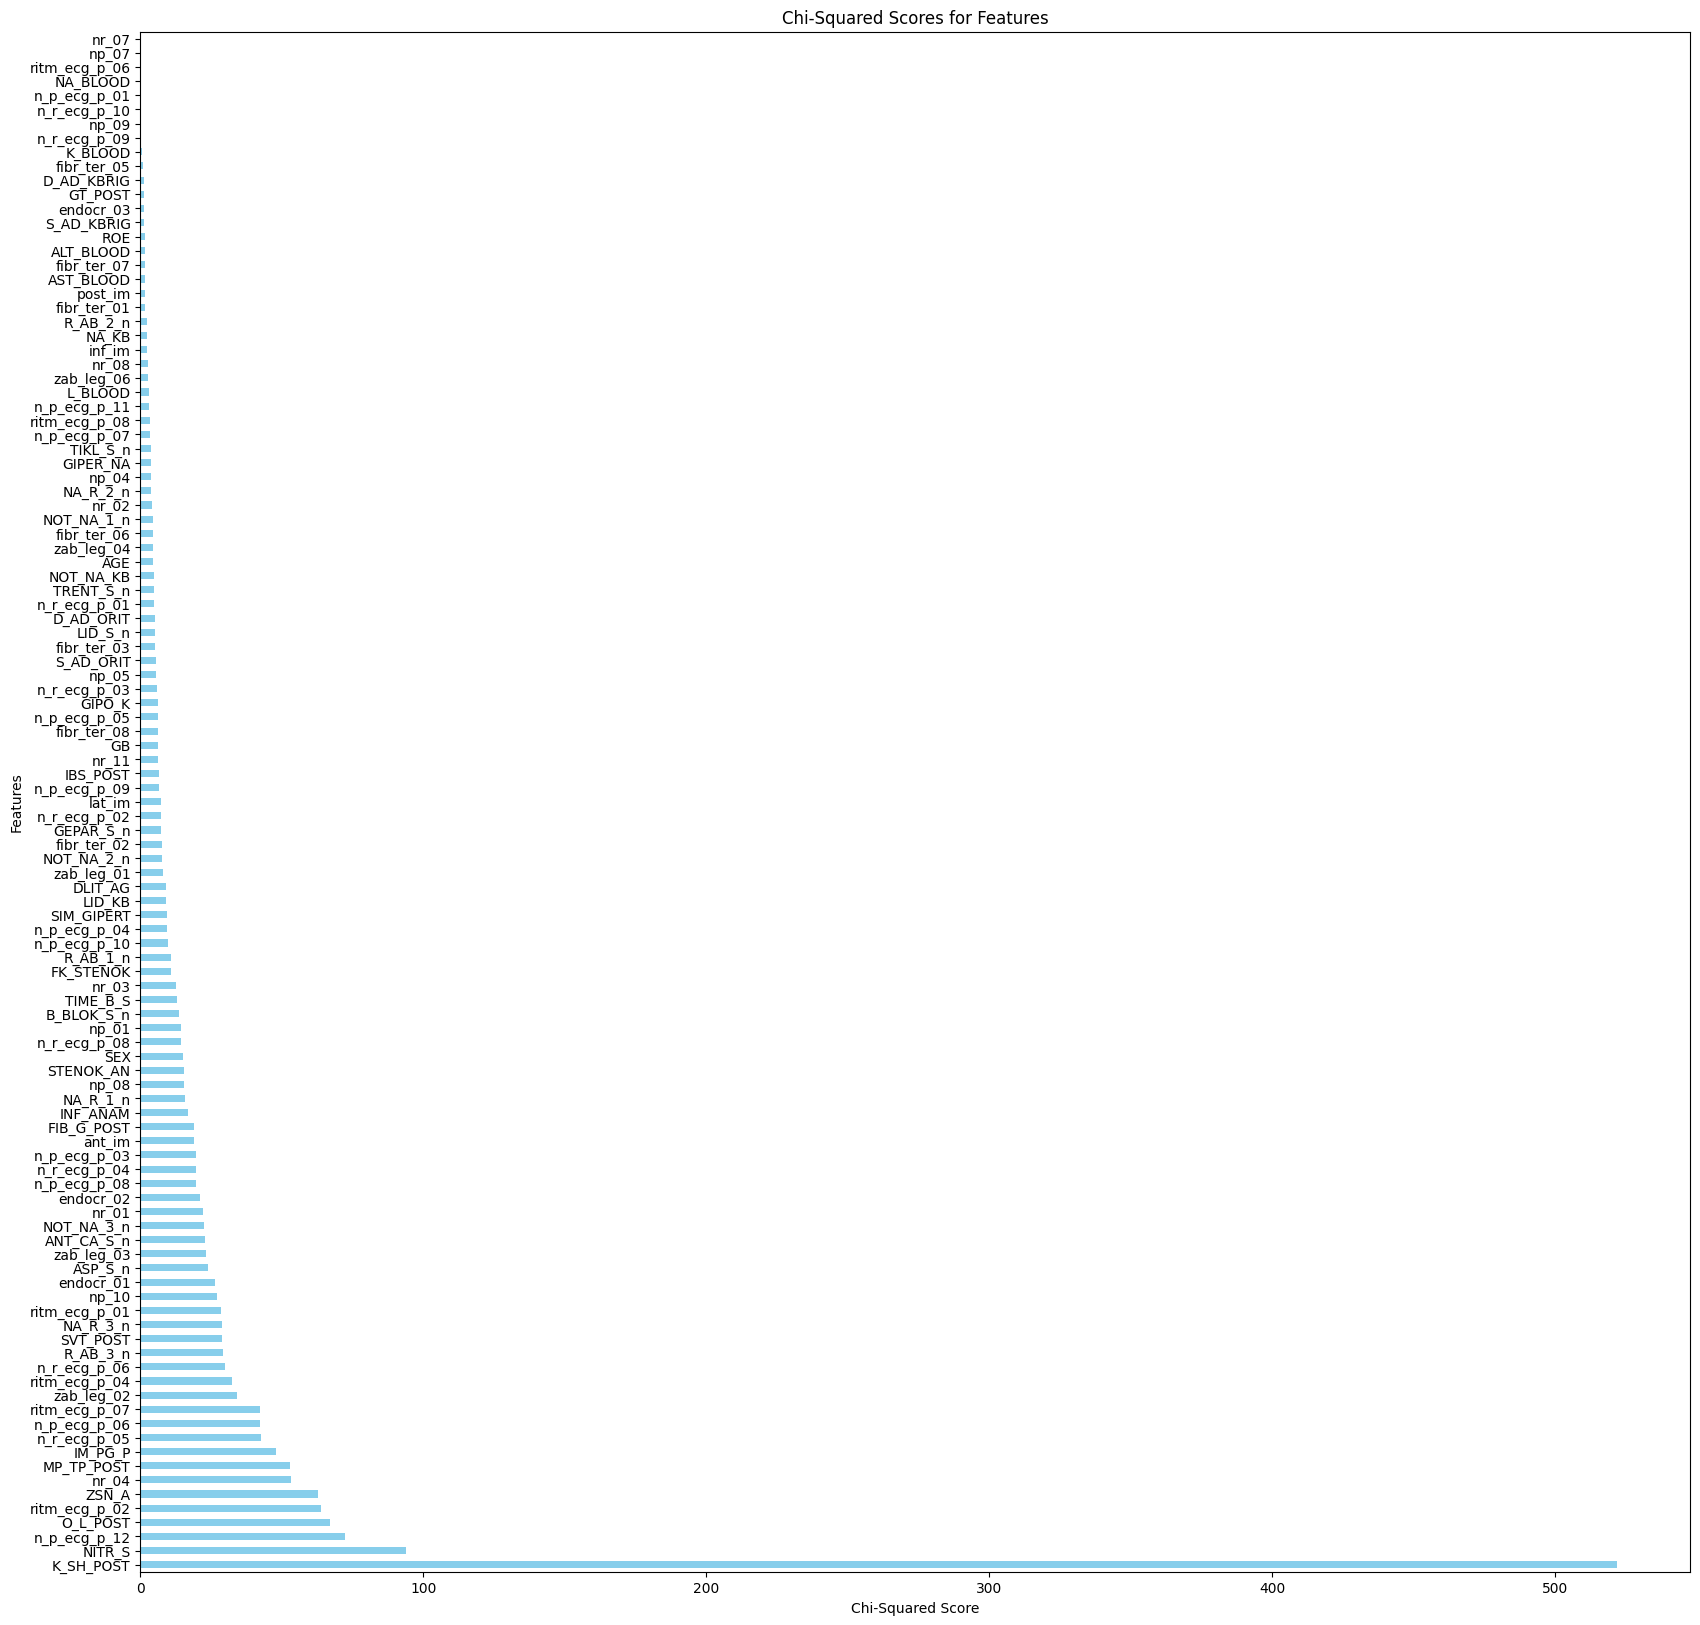

In [ ]:




# Assuming 'target_column_name' is the name of the column in your y DataFrame that you want to use as the target variable
y_single_column = y['LET_IS'] # Select the target column


# Feature extraction using Chi-squared
test = SelectKBest(score_func=chi2, k=4)  # k=4 selects the top 4 features
fit = test.fit(X_norm, y_single_column) # Use the single-column target variable

# Get Chi-squared scores
chi2_scores = pd.Series(fit.scores_, index=X_norm.columns)

# Sort the scores for better visualization
chi2_scores = chi2_scores.sort_values(ascending=False)

# Plot the scores
plt.figure(figsize=(20, 20))
chi2_scores.plot(kind='barh', color='skyblue')
plt.title('Chi-Squared Scores for Features')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Features')
plt.show()

In [ ]:


# Assuming 'LET_IS' is the target column in your data
# Extract the target column as a 1D array
y_single_column = y['LET_IS'].values  # Select the target column and convert to a 1D array

# Fit Logistic Regression with L1 (Lasso) penalty
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X_norm, y_single_column) # Use the single-column target variable

# Select features with non-zero coefficients
model = SelectFromModel(logistic, prefit=True)

# Transform X1 to retain only the selected features
X_new = model.transform(X_norm)

# Get the mask of selected features (True for selected, False for dropped)
selected_mask = model.get_support()

# Filter the original columns based on the selected mask
selected_columns = X_norm.columns[selected_mask]

# Print the selected columns
print("Selected Features:", selected_columns)

# X_new now contains only the important features
print("Shape of X_new:", X_new.shape)

Selected Features: Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_03', 'nr_04', 'np_05',
       'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02',
       'zab_leg_03', 'S_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST',
       'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
       'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'ritm_ecg_p_04', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_p_ecg_p_03',
       'n_p_ecg_p_04', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_10',
       'n_p_ecg_p_12', 'fibr_ter_03', 'GIPO_K', 'K_BLOOD', 'ALT_BLOOD',
       'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n',
       'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n',
       'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n',
       'LID_S_n', '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
selected= ['AGE', 'ALT_BLOOD', 'DLIT_AG' ,'D_AD_ORIT', 'FK_STENOK' ,'GB', 'IBS_POST',
 'INF_ANAM','K_BLOOD' ,'K_SH_POST' ,'LID_KB', 'NITR_S' ,'O_L_POST', 'R_AB_3_n',
 'SEX' ,'SIM_GIPERT', 'STENOK_AN', 'S_AD_ORIT' ,'ZSN_A', 'n_p_ecg_p_12', 'nr_11']

In [ ]:
df = pd.concat([X_norm[selected], y], axis=1)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between features selected and targets')
plt.show()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
X_norm[selected]

AGE  ALT_BLOOD   DLIT_AG  D_AD_ORIT  FK_STENOK        GB  IBS_POST  \
0     0.772727   0.117845  1.000000   0.526316       0.25  1.000000       1.0   
1     0.439394   0.117845  0.000000   0.473684       0.00  0.000000       0.0   
2     0.393939   0.090909  0.285714   0.526316       0.00  0.666667       1.0   
3     0.636364   0.242424  0.428571   0.368421       0.00  0.666667       1.0   
4     0.515152   0.141414  1.000000   0.473684       0.00  1.000000       1.0   
...        ...        ...       ...        ...        ...       ...       ...   
1695  0.772727   0.343434  1.000000   0.368421       0.50  0.666667       0.5   
1696  0.666667   0.117845  1.000000   0.000000       0.50  0.666667       0.5   
1697  0.439394   0.067340  0.000000   0.263158       0.50  0.000000       1.0   
1698  0.803030   0.141414  1.000000   0.368421       0.50  0.666667       0.5   
1699  0.560606   0.117845  0.428571   0.000000       0.50  0.666667       0.5   

      INF_ANAM   K_BLOOD  K_SH_POST  ...  NITR_S  O_L_POST  R_AB_3_n  SEX  \
0     0.666667  0.406780        0.0  ...     0.0       0.0  0.333333  1.0   
1     0.333333  0.203390        0.0  ...     0.0       0.0  0.000000  1.0   
2     0.000000  0.288136        0.0  ...     0.0       0.0  0.000000  1.0   
3     0.000000  0.271186        0.0  ...     0.0       0.0  0.333333  0.0   
4     0.000000  0.203390        0.0  ...     0.0       0.0  0.000000  1.0   
...        ...       ...        ...  ...     ...       ...       ...  ...   
1695  0.000000  0.237288        0.0  ...     0.0       0.0  0.000000  0.0   
1696  0.000000  0.305085        1.0  ...     0.0       0.0  0.000000  0.0   
1697  1.000000  0.305085        0.0  ...     1.0       0.0  0.000000  1.0   
1698  0.666667  0.135593        0.0  ...     1.0       0.0  0.000000  0.0   
1699  0.666667  0.305085        1.0  ...     1.0       0.0  0.000000  1.0   

      SIM_GIPERT  STENOK_AN  S_AD_ORIT  ZSN_A  n_p_ecg_p_12  nr_11  
0            0.0   0.166667   0.692308   0.00           0.0    0.0  
1            0.0   0.000000   0.461538   0.00           0.0    0.0  
2            0.0   0.000000   0.692308   0.00           0.0    0.0  
3            0.0   0.000000   0.461538   0.25           0.0    0.0  
4            0.0   0.000000   0.615385   0.00           0.0    0.0  
...          ...        ...        ...    ...           ...    ...  
1695         0.0   0.666667   0.423077   0.00           1.0    0.0  
1696         0.0   1.000000   0.192308   0.00           0.0    0.0  
1697         0.0   1.000000   0.269231   0.00           0.0    0.0  
1698         0.0   0.333333   0.423077   0.00           0.0    0.0  
1699         0.0   0.166667   0.000000   1.00           0.0    0.0  

[1700 rows x 21 columns]

###Correlation Coeficient

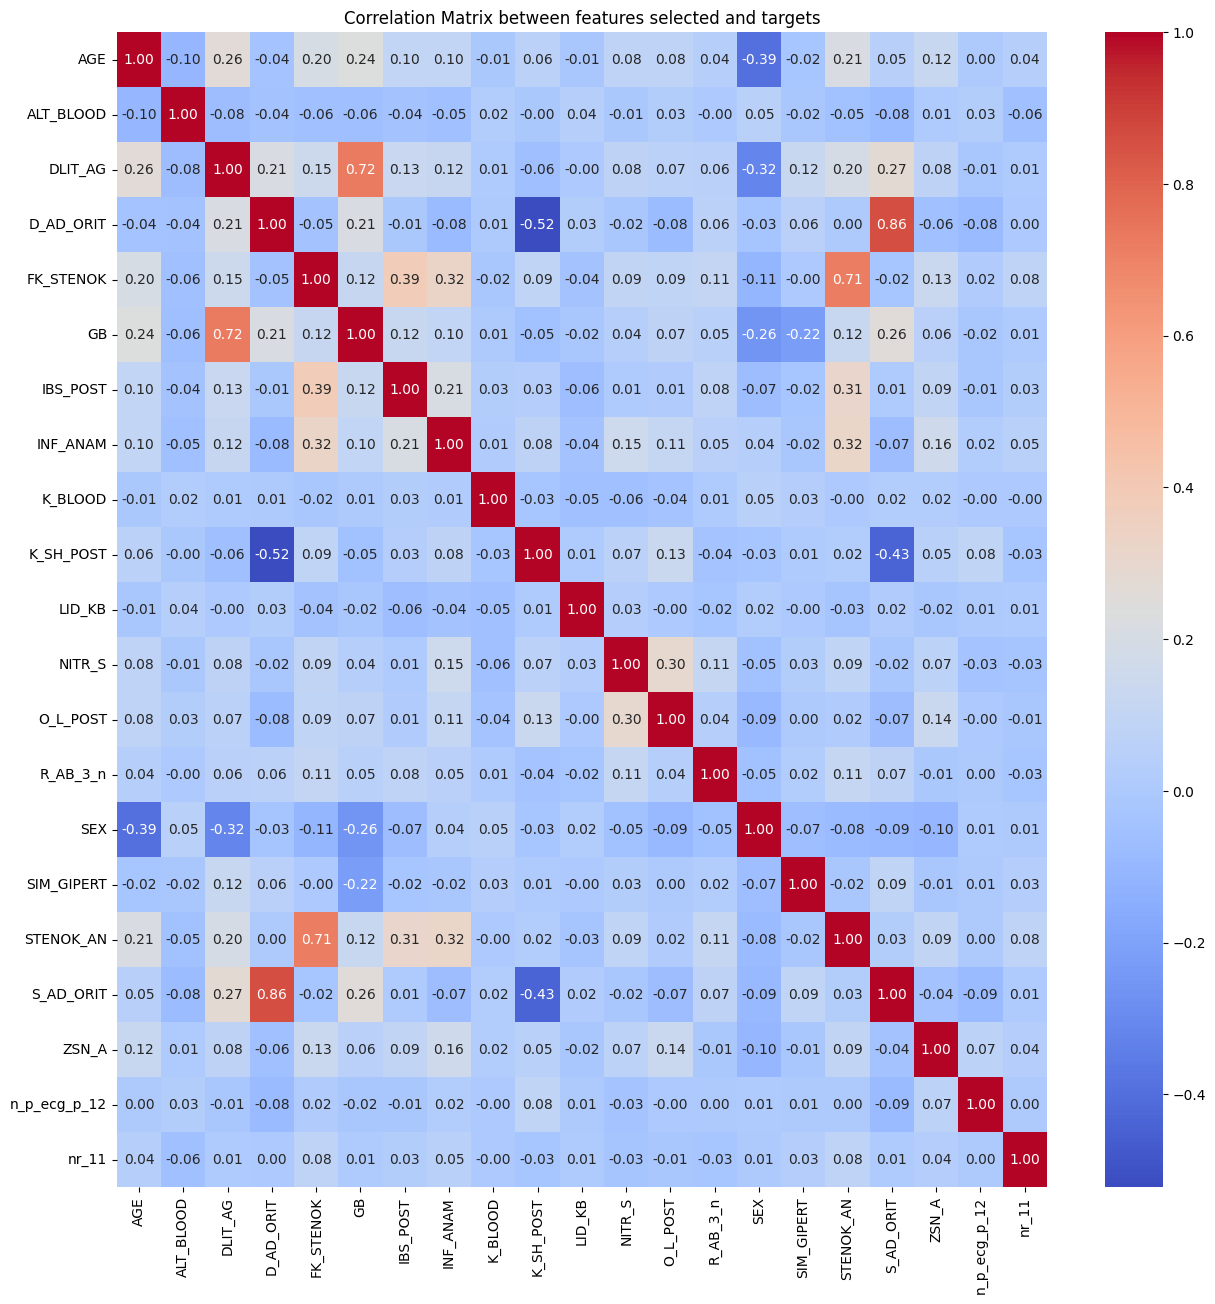

In [ ]:
df= X_norm[selected]
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between features selected and targets')
plt.show()

#### <font color='red'> <h3 align="center"> 6-3-Dimensionality reduction </font>





###PCA

In [ ]:

# Assuming X contains your features and is preprocessed (from the fetched dataset)
# Step 1: Standardization
sc = StandardScaler()
X_std = sc.fit_transform(X_Clean_filled)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit(X_std)

# Step 3: Access Eigenvectors (Principal Components) and Eigenvalues (Variance)
propvect = pca.components_  # Principal components (eigenvectors)
print("Principal Components (Eigenvectors):\n", propvect)

print("===================================================")
propvar = pca.explained_variance_  # Variance proportions (eigenvalues)
print("Variance Proportions (Eigenvalues):\n", propvar)

# Step 4: Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

In [ ]:
# Step 5: Cumulative explained variance
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [ ]:
# Step 6: Create the explained variance plot
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Step 7: Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, exp_var_pca, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Step 8: Calculating new axes (Principal Components)
pc1 = X_std.dot(propvect[:, 0])  # First principal component
pc2 = X_std.dot(propvect[:, 1])  # Second principal component

# Step 9: Correlation circle
def plot_correlation_circle(pc1, pc2, features):
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):  # Iterate over each feature
        x = np.corrcoef(pc1, X.iloc[:, i])[0, 1]  # Calculate correlation between PC1 and feature
        y = np.corrcoef(pc2, X.iloc[:, i])[0, 1]  # Calculate correlation between PC2 and feature
        ax.annotate("", xy=(x, y), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
        ax.annotate(features[i], (x+0.02, y+0.02), size=12)

    # Draw the correlation circle
    ax.set_title('Correlation Circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    # Draw a unit circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()

# Plot the Correlation Circle
plot_correlation_circle(pc1, pc2, X.columns)